In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data_path = "../data/train/"
test_data_path = "../data/test/"

train_data_files = ["AAPL", "BRK_B", "DVN","NVDA", "PCG", "ROST", "V", "VNQ"]
test_data_files = ["LOW", "TSLA"]

vis_path = "../visualizations/"

### Data Preprocessing
Converting currency amounts to floats, parsing dates, saving modifications.

In [36]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + ".csv", parse_dates=["Date"], index_col="Date")

	df[['Close/Last']] = df[['Close/Last']].replace('[\$,]','',regex=True).astype(float)
	df[['Open']] = df[['Open']].replace('[\$,]','',regex=True).astype(float)
	df[['High']] = df[['High']].replace('[\$,]','',regex=True).astype(float)
	df[['Low']] = df[['Low']].replace('[\$,]','',regex=True).astype(float)

	df["Return"] = df["Close/Last"] - df["Open"]
	df['open-close'] = df['Open'] - df['Close/Last'].shift(1)
	df['open-open'] = df['Open'] - df['Open'].shift(1)

	df.to_csv(train_data_path + f"{f}_clean.csv")

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + ".csv", parse_dates=["Date"], index_col="Date")

	df[['Close/Last']] = df[['Close/Last']].replace('[\$,]','',regex=True).astype(float)
	df[['Open']] = df[['Open']].replace('[\$,]','',regex=True).astype(float)
	df[['High']] = df[['High']].replace('[\$,]','',regex=True).astype(float)
	df[['Low']] = df[['Low']].replace('[\$,]','',regex=True).astype(float)

	df["Return"] = df["Close/Last"] - df["Open"]
	df['open-close'] = df['Open'] - df['Close/Last'].shift(1)
	df['open-open'] = df['Open'] - df['Open'].shift(1)

	df.to_csv(test_data_path + f"{f}_clean.csv")

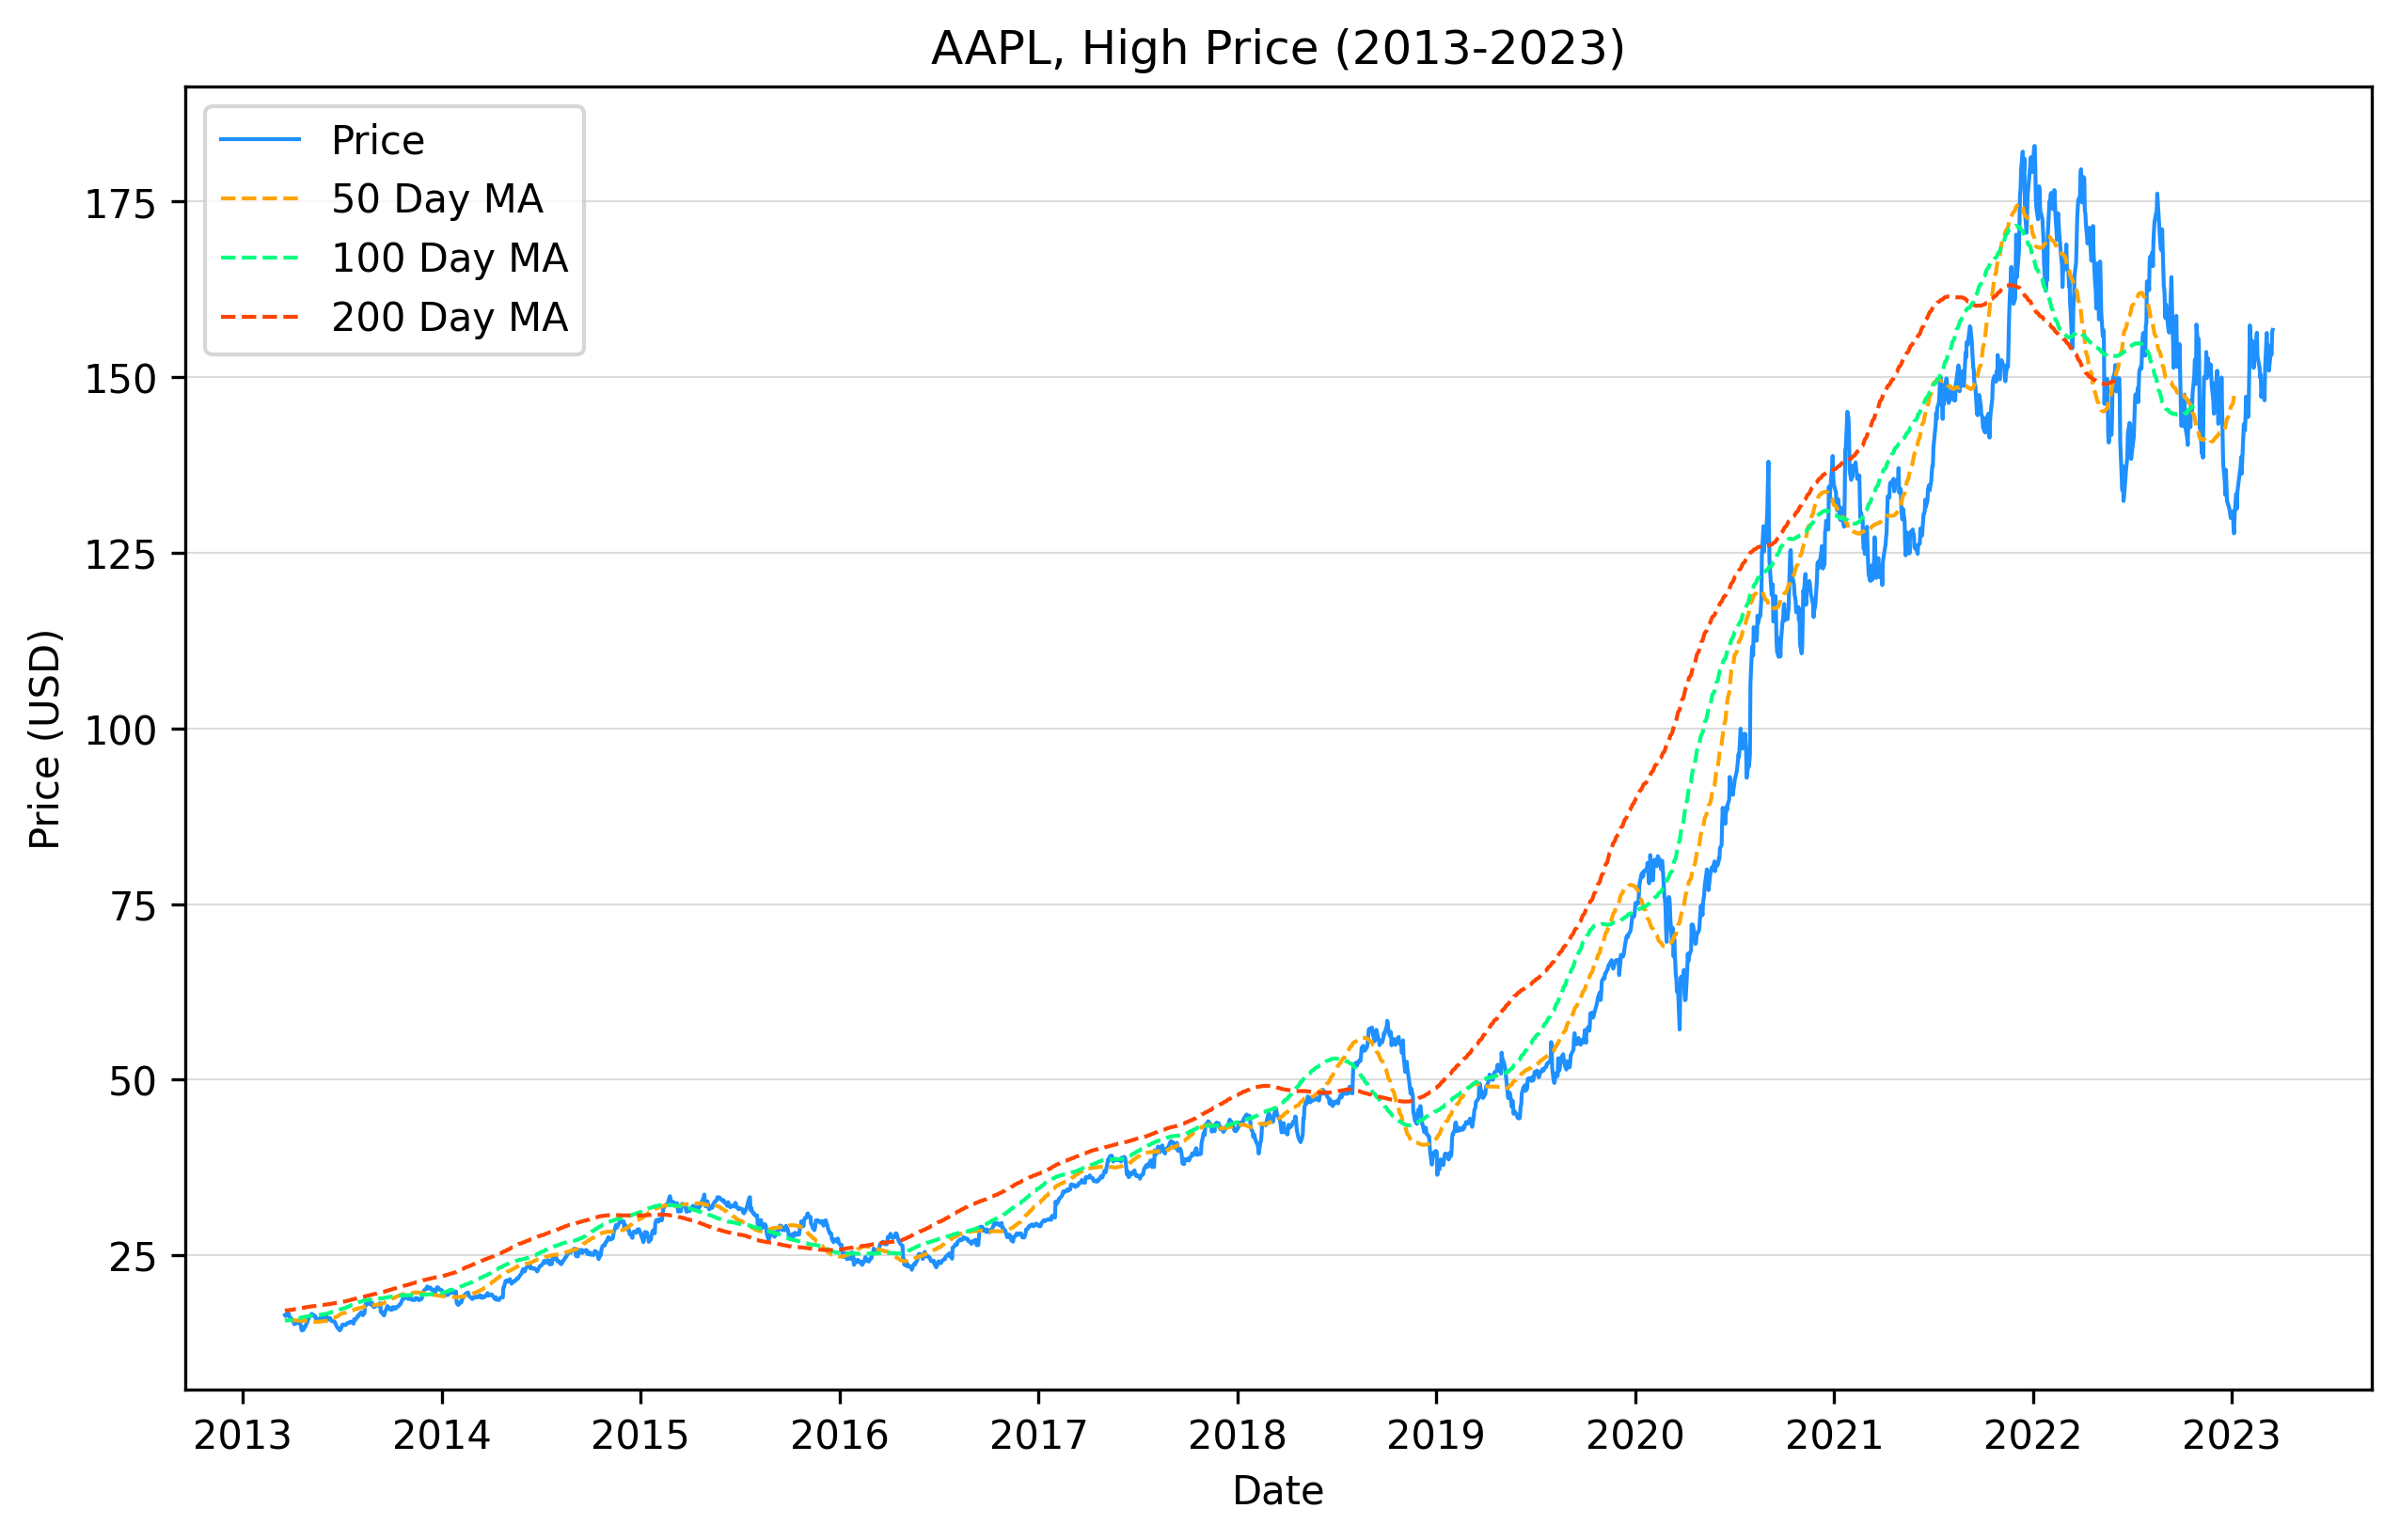

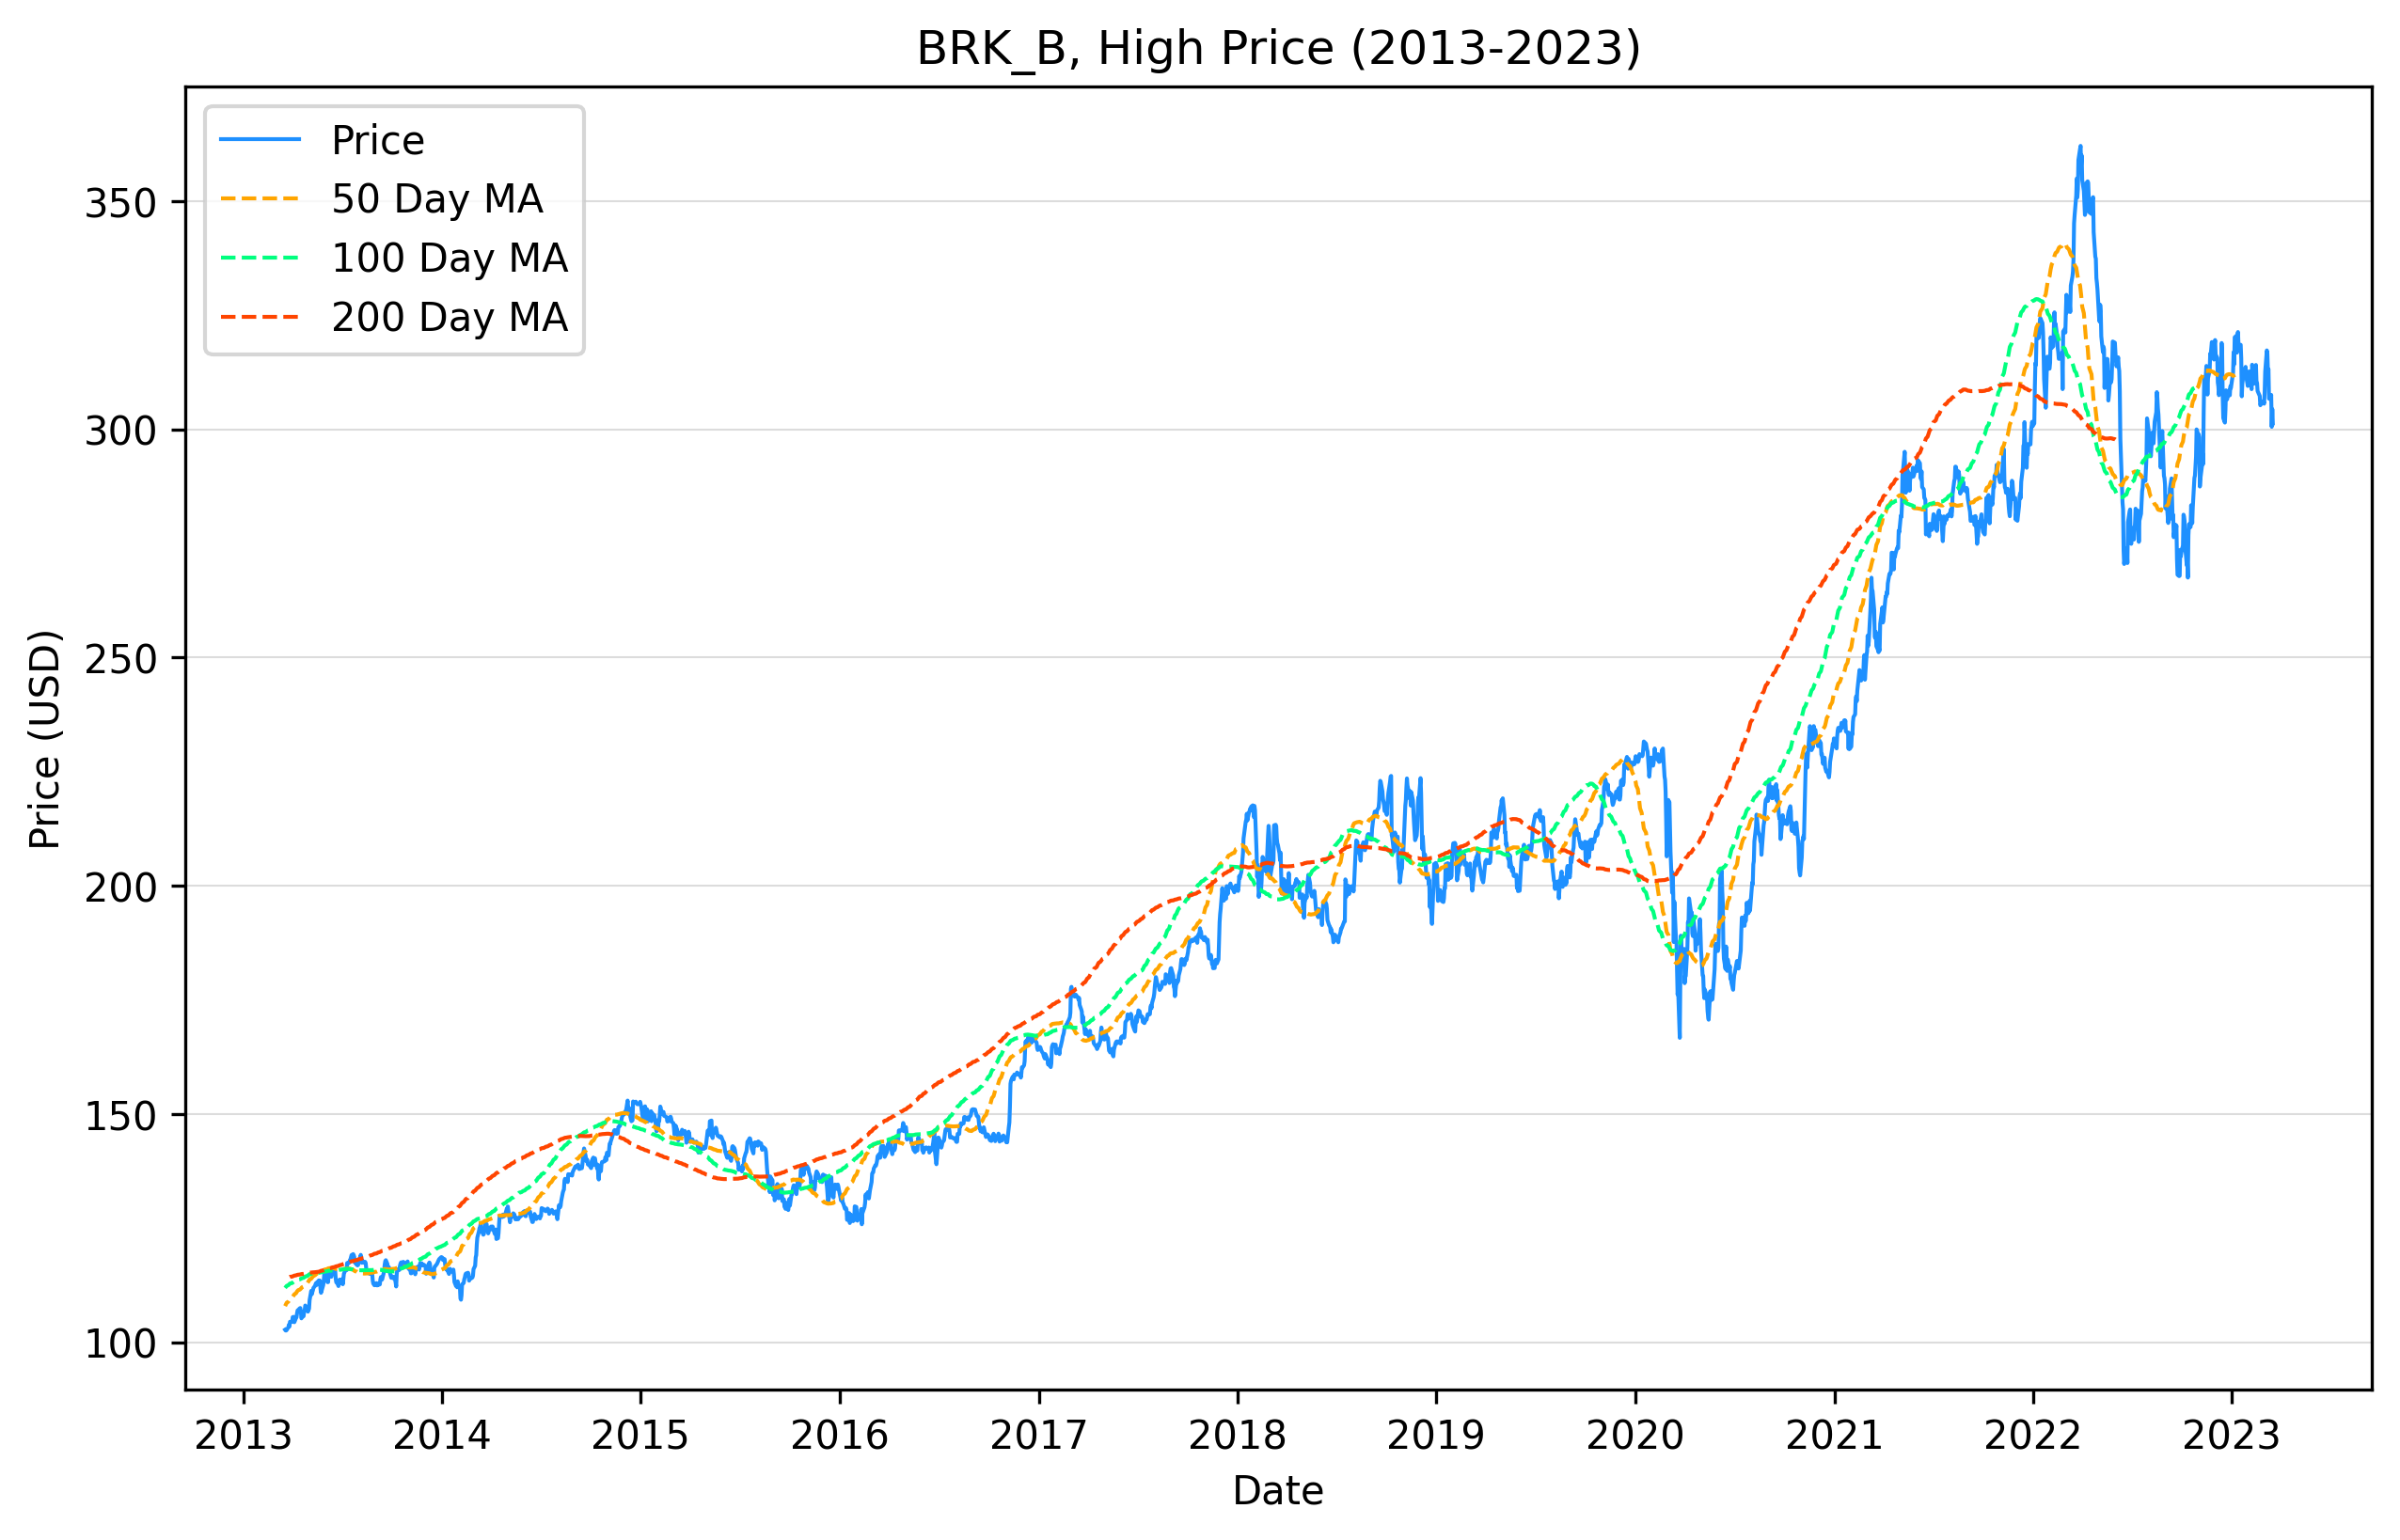

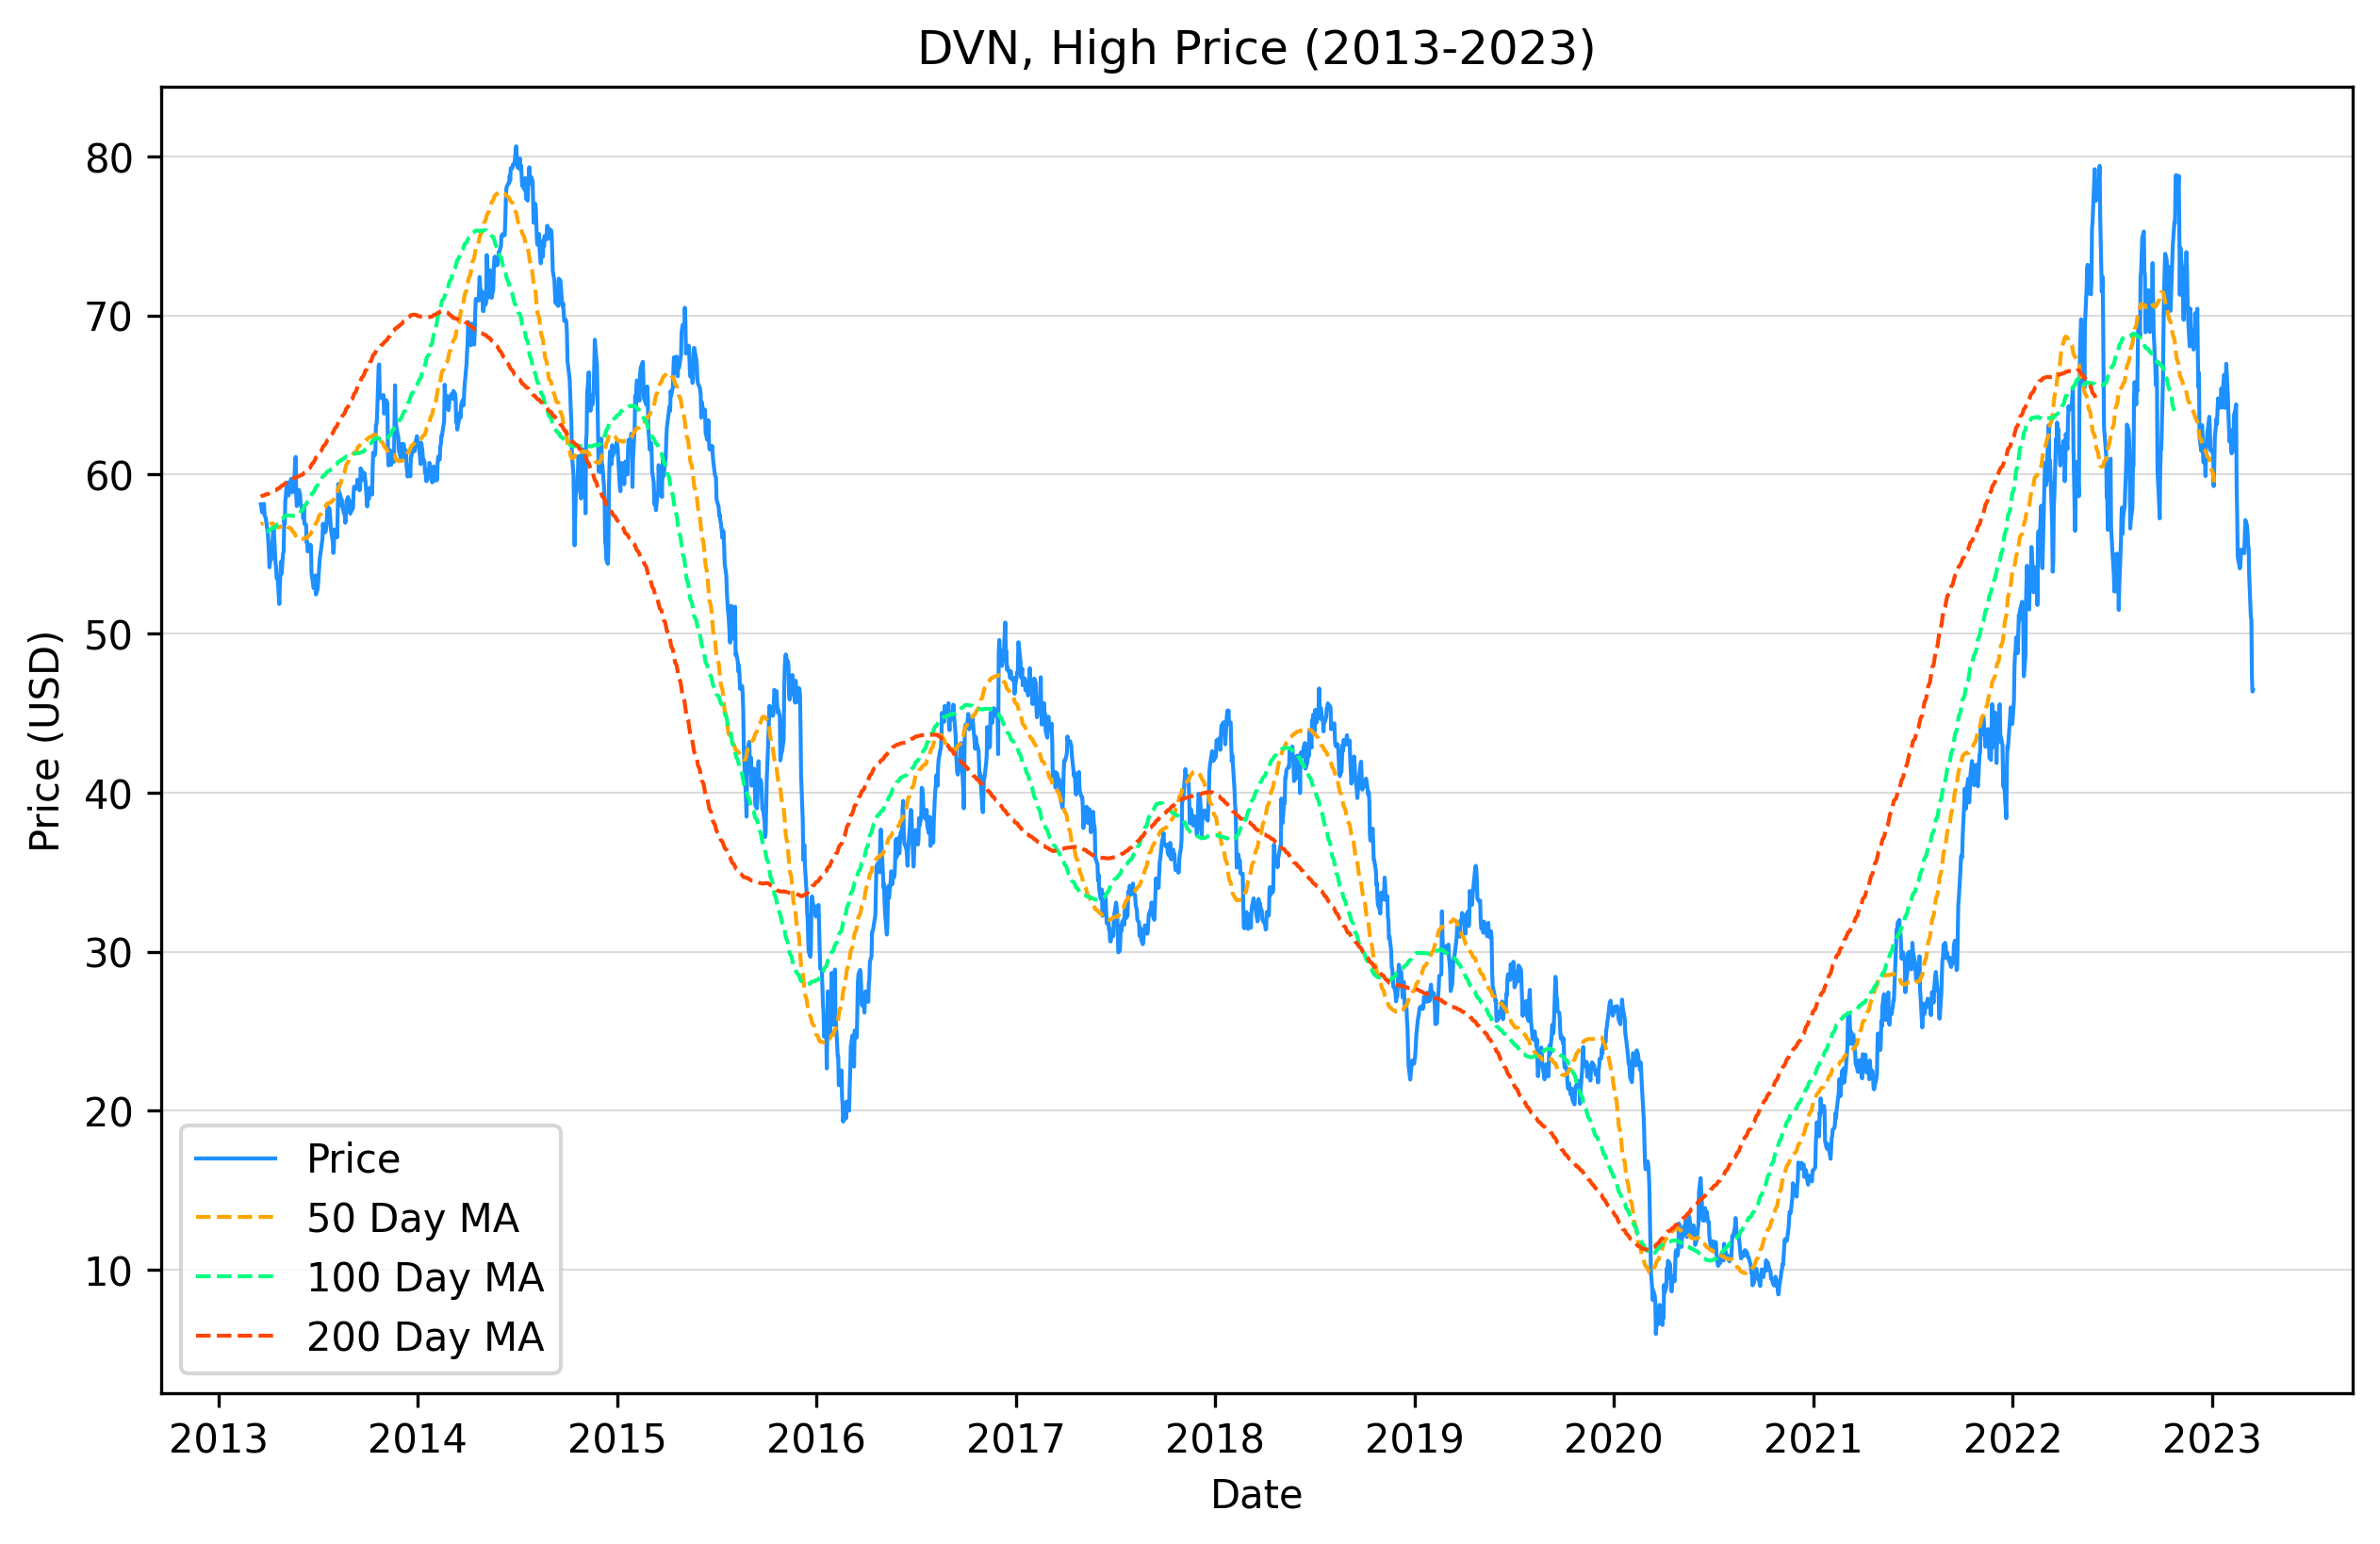

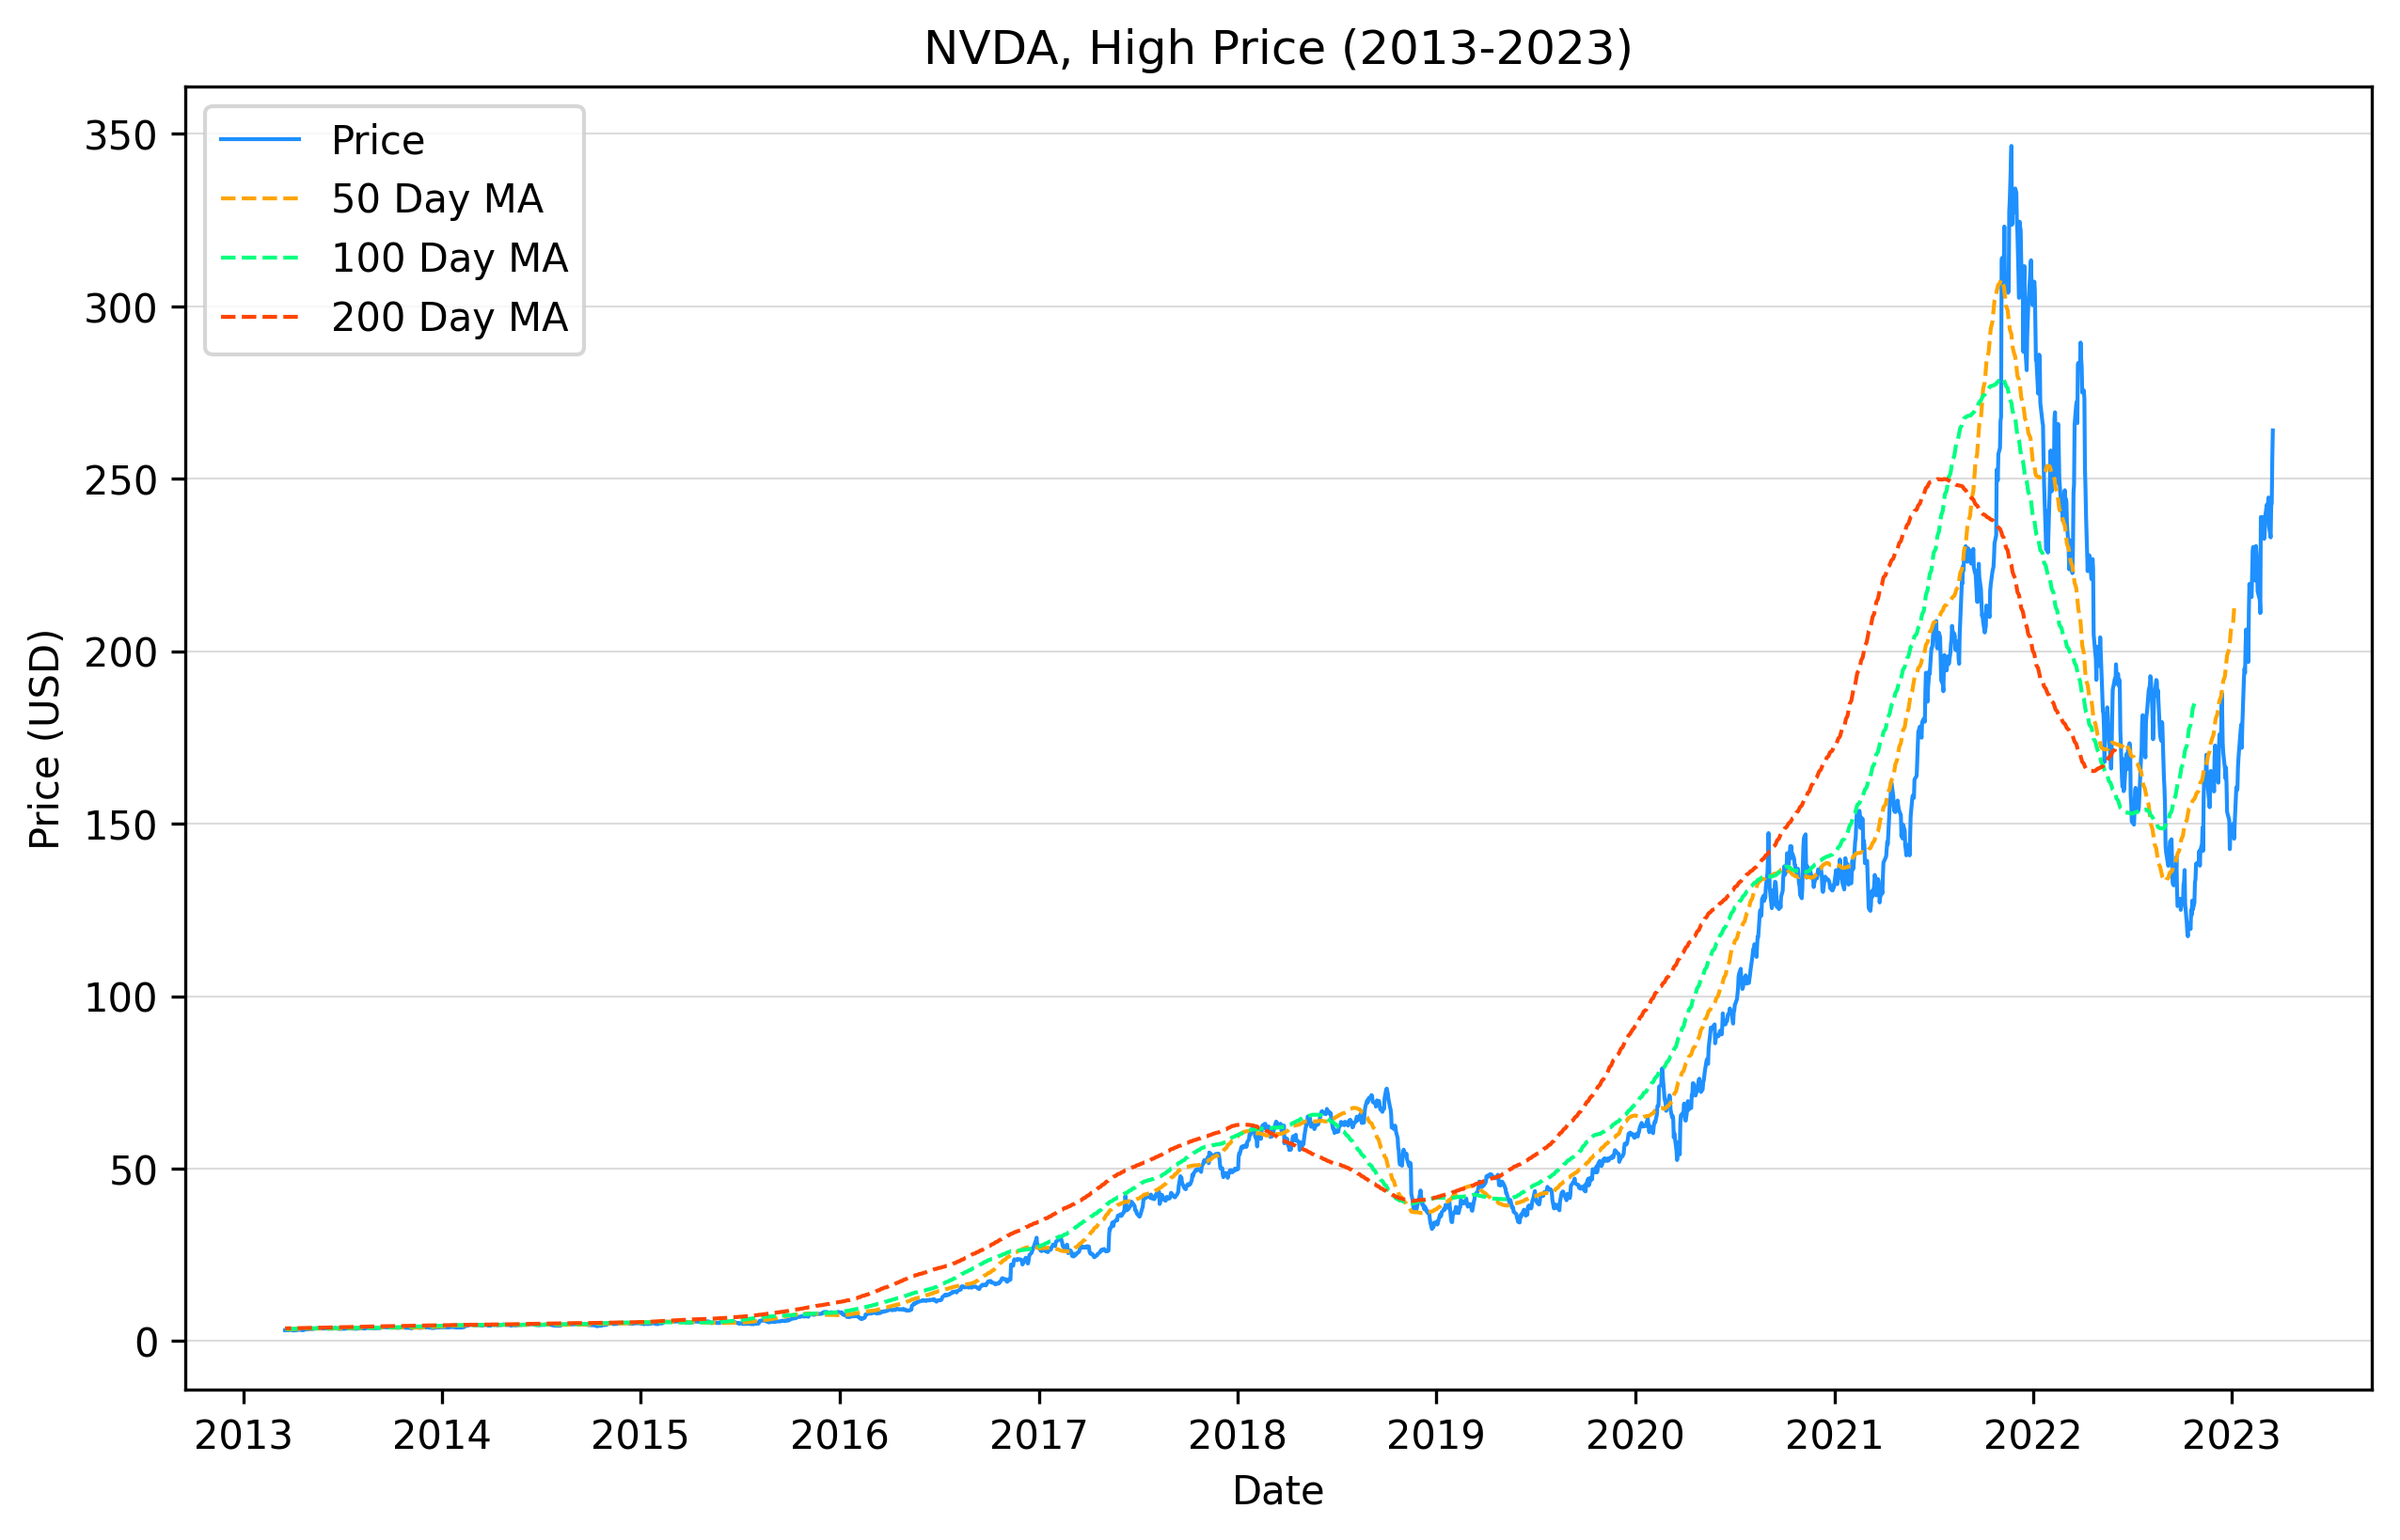

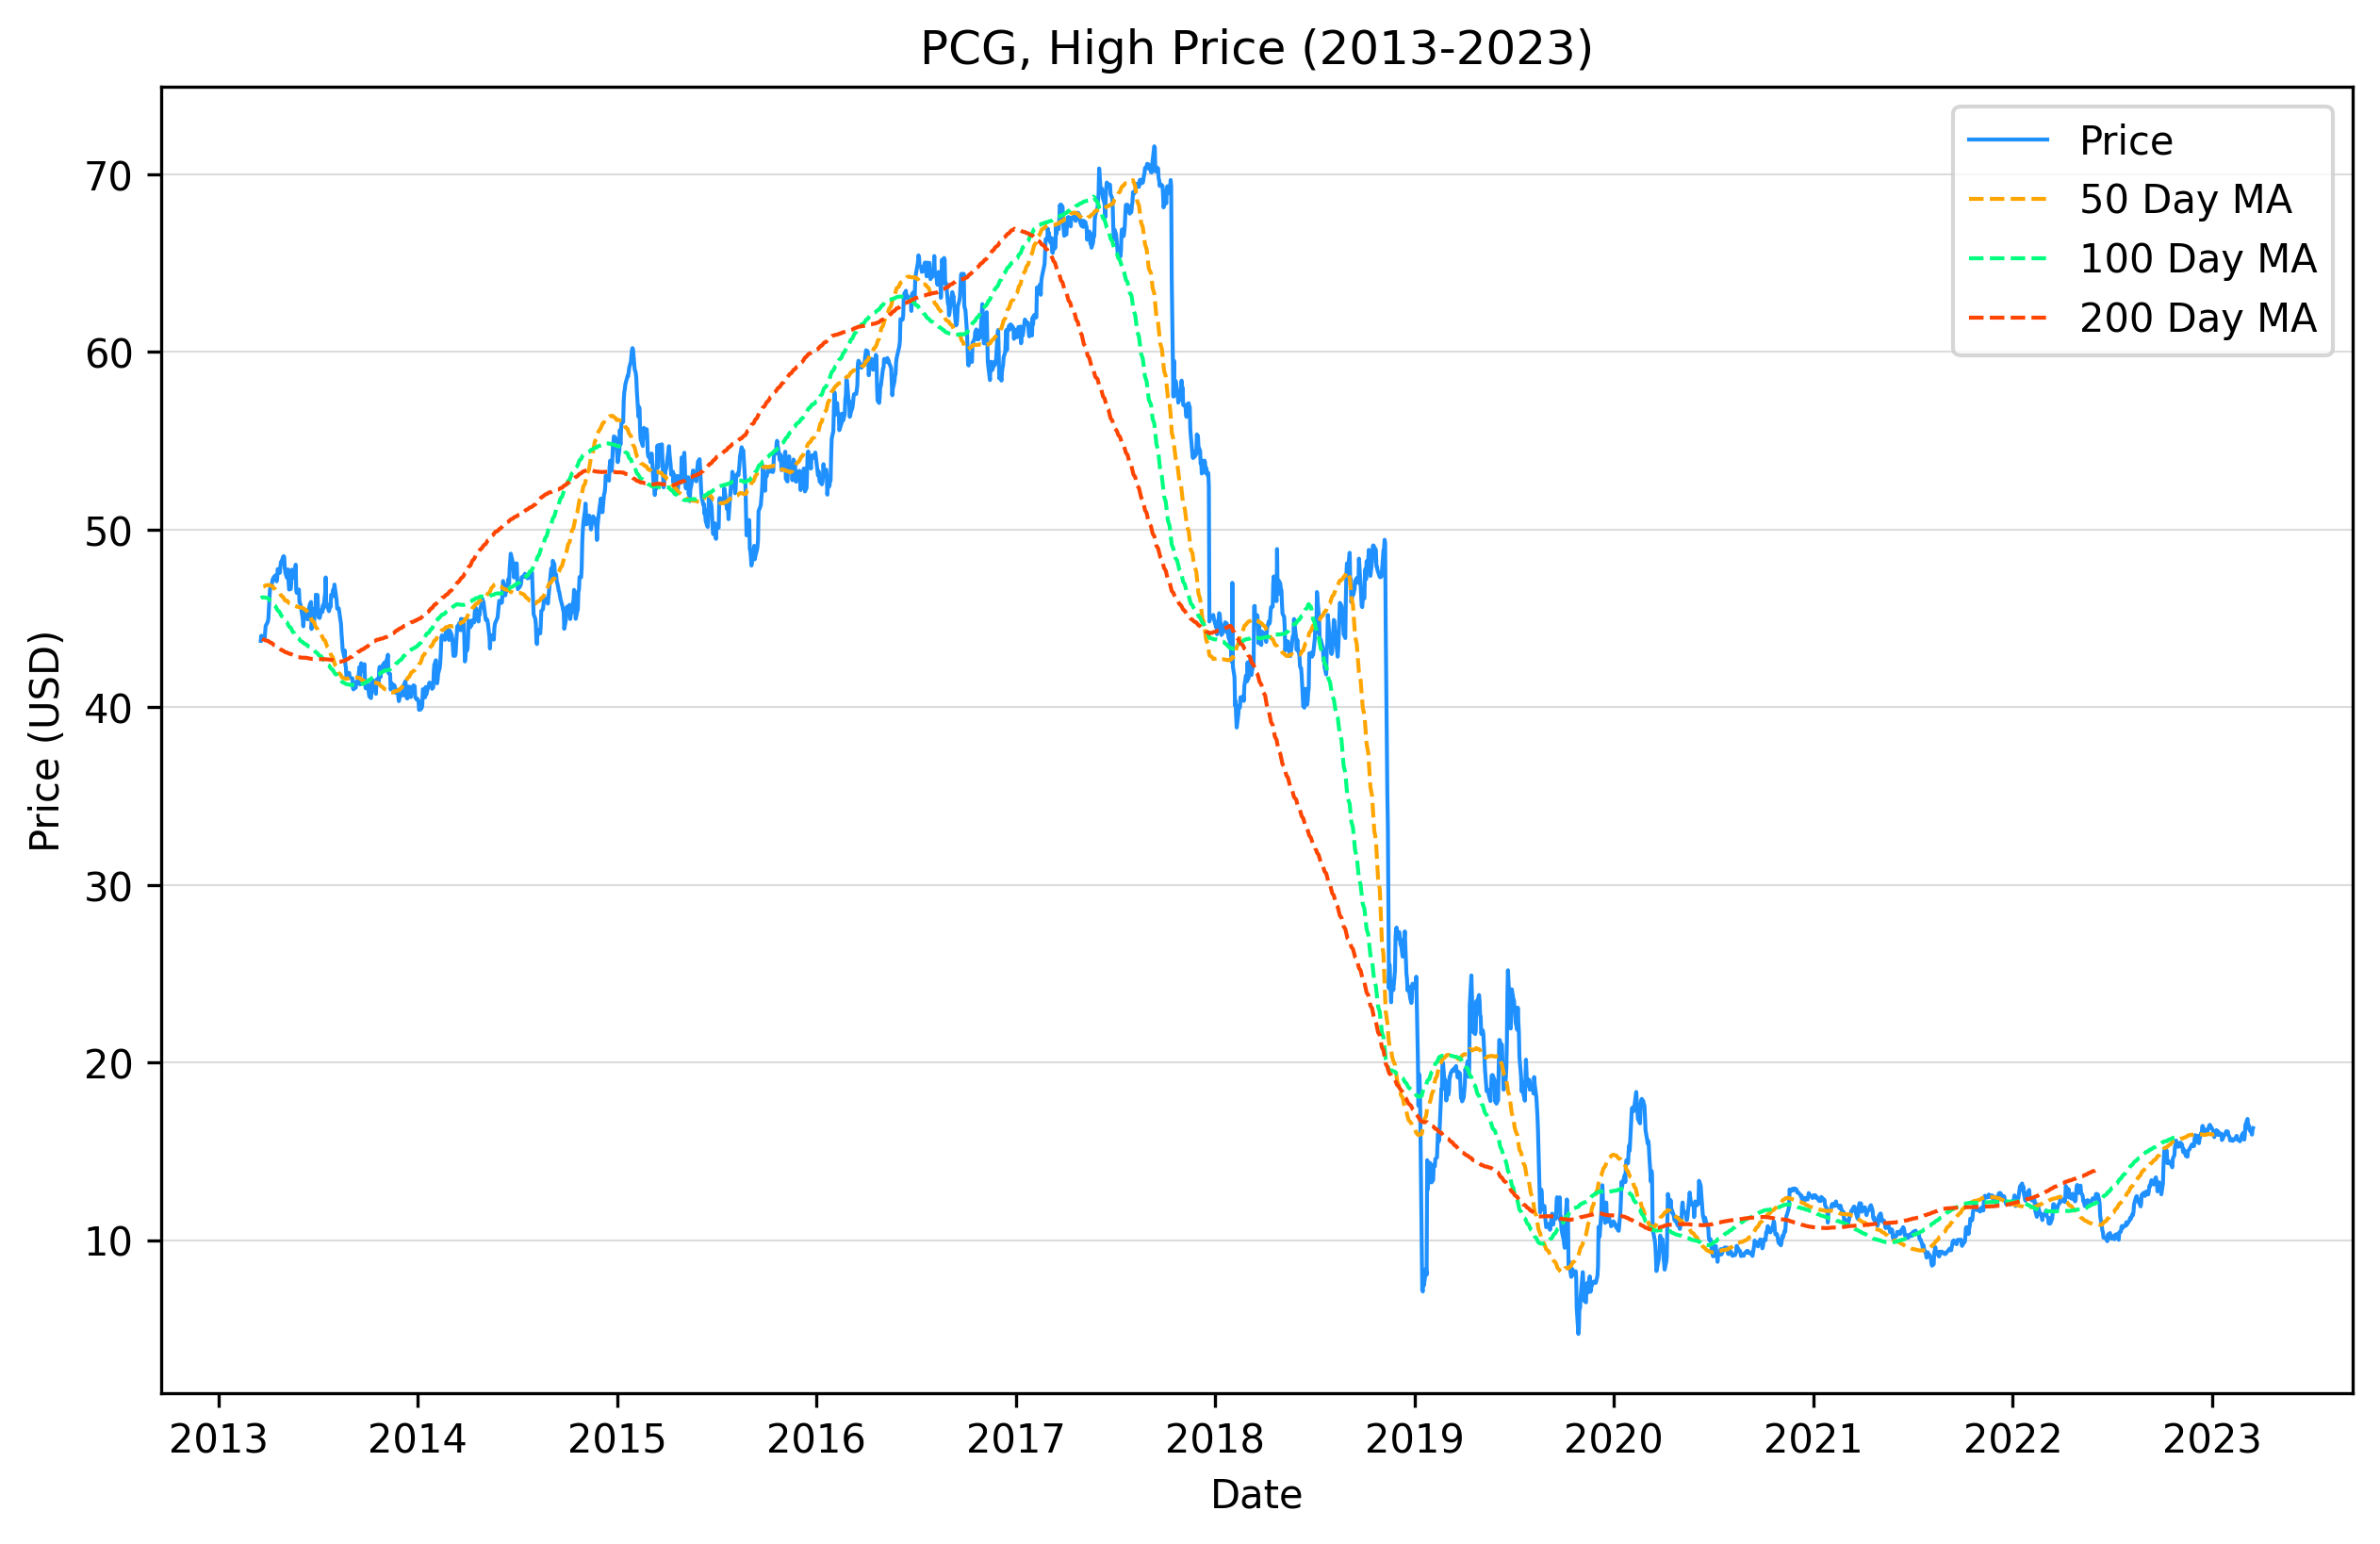

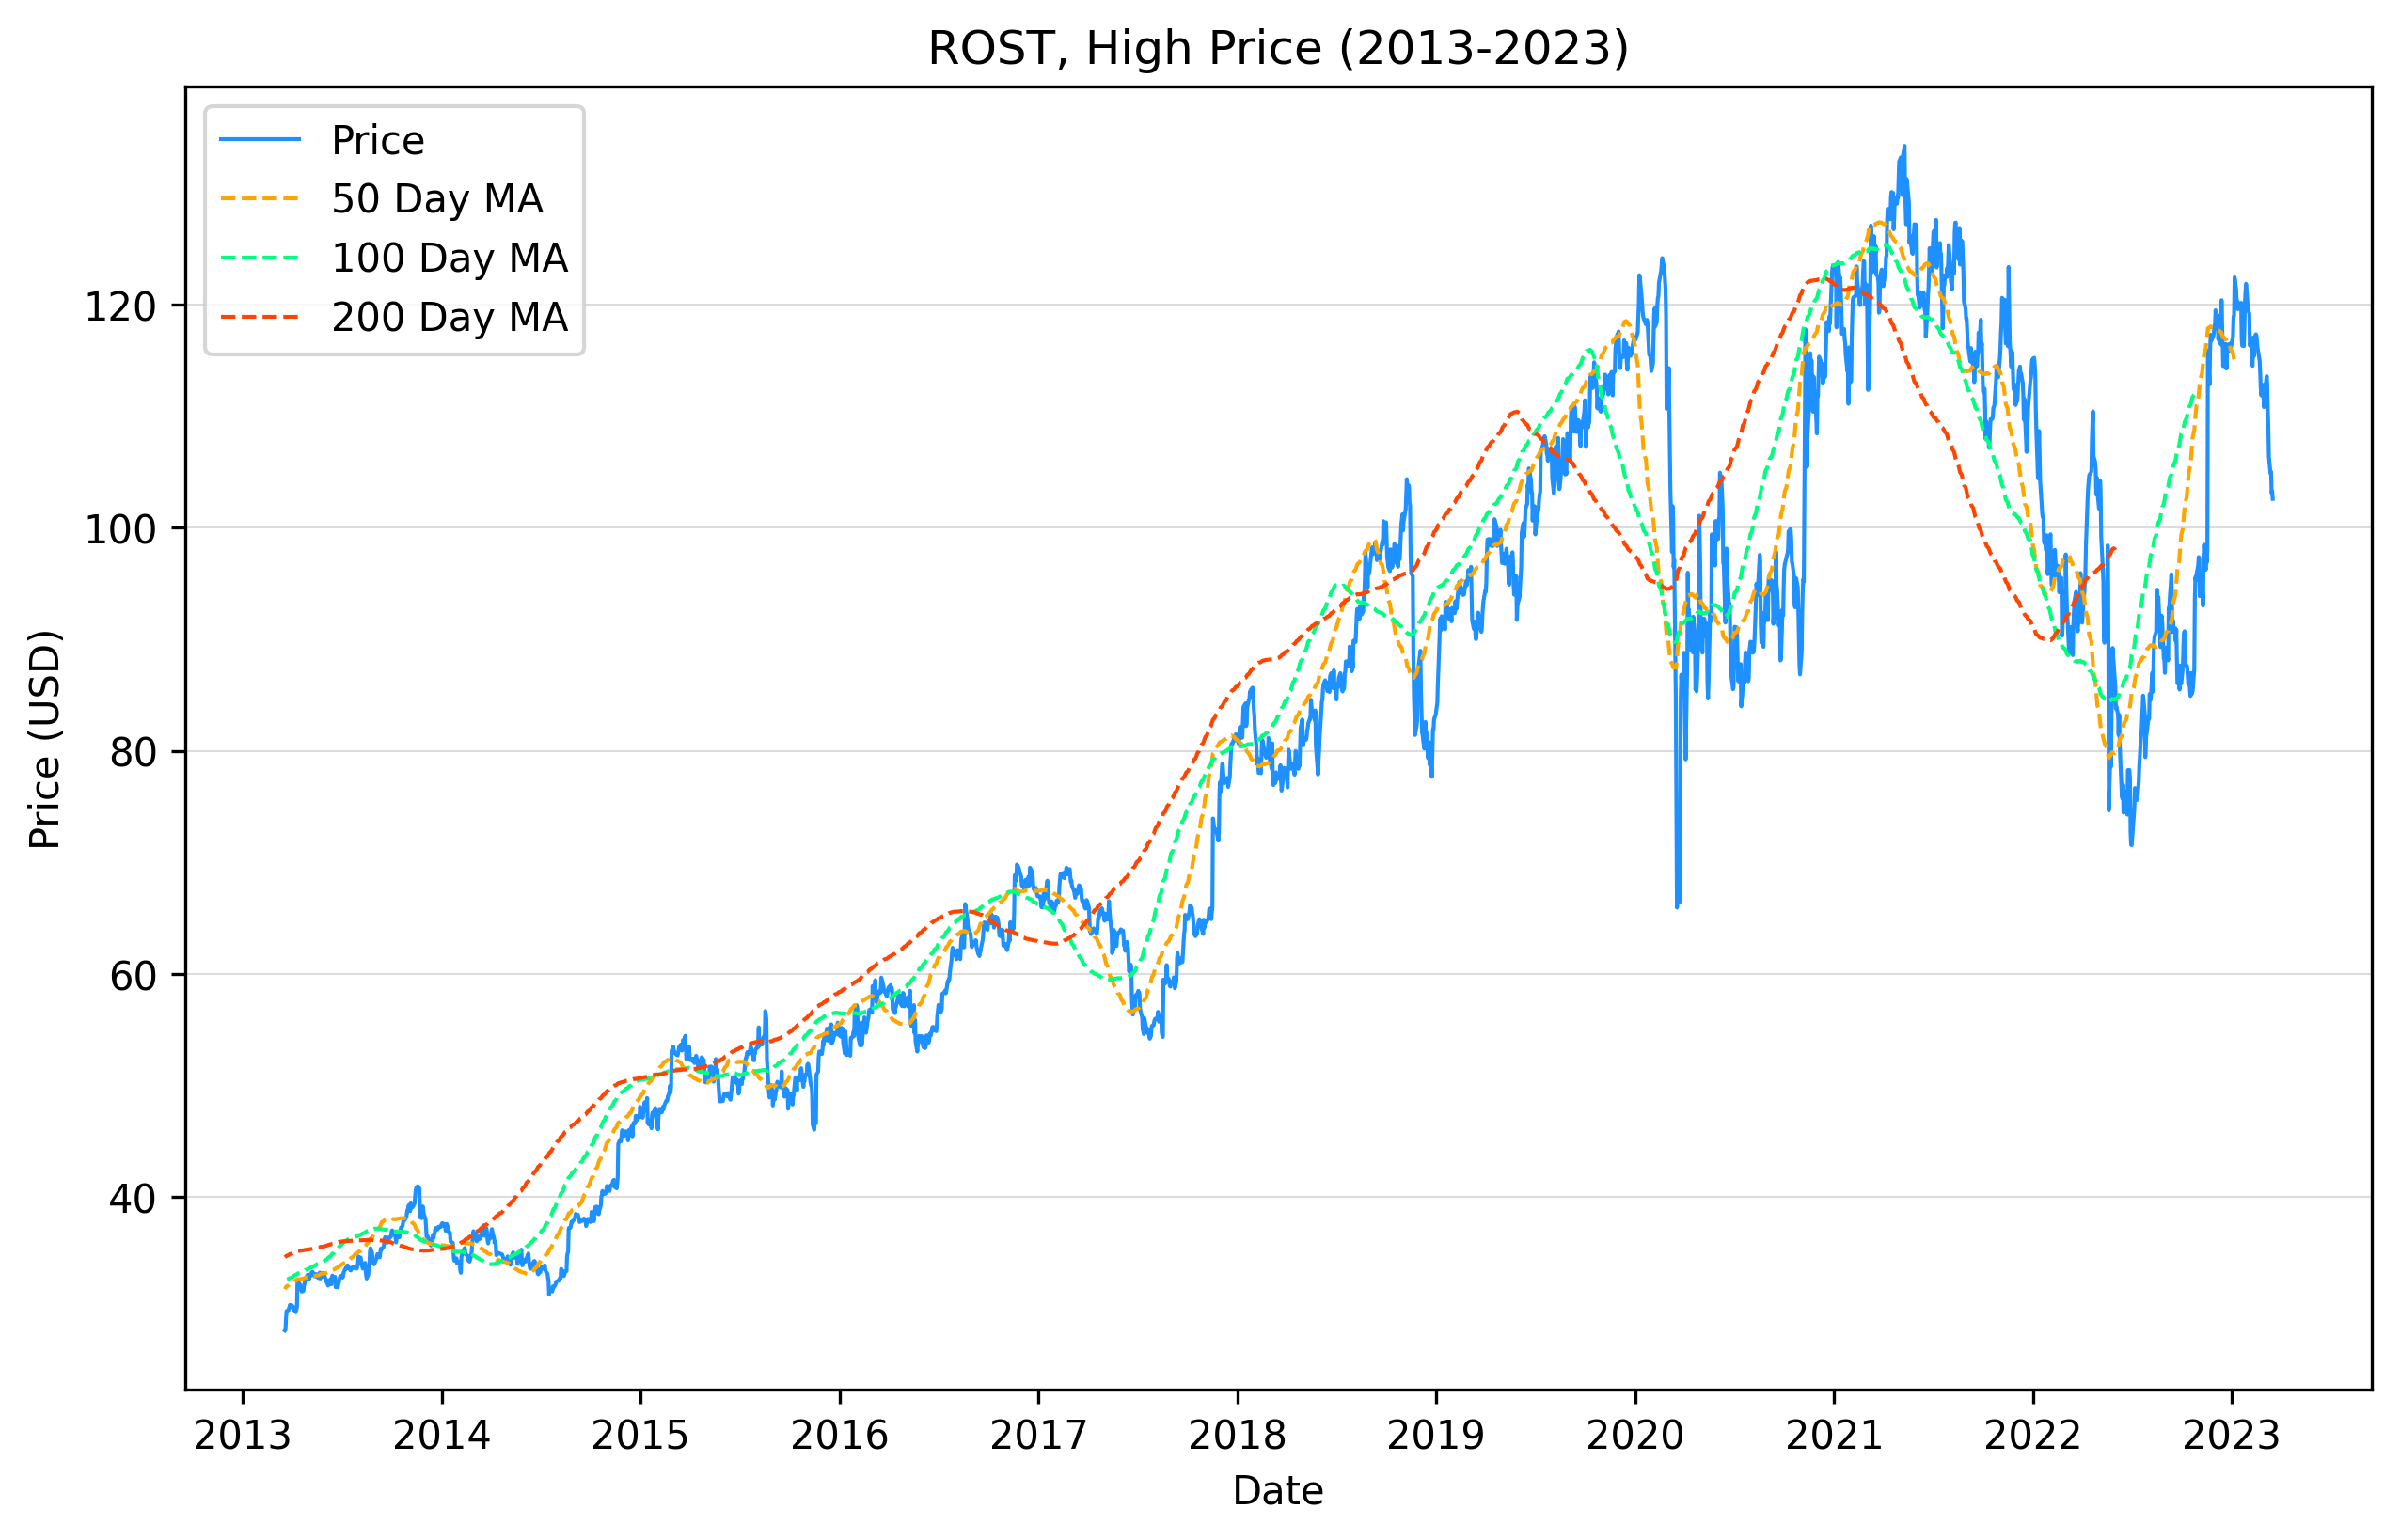

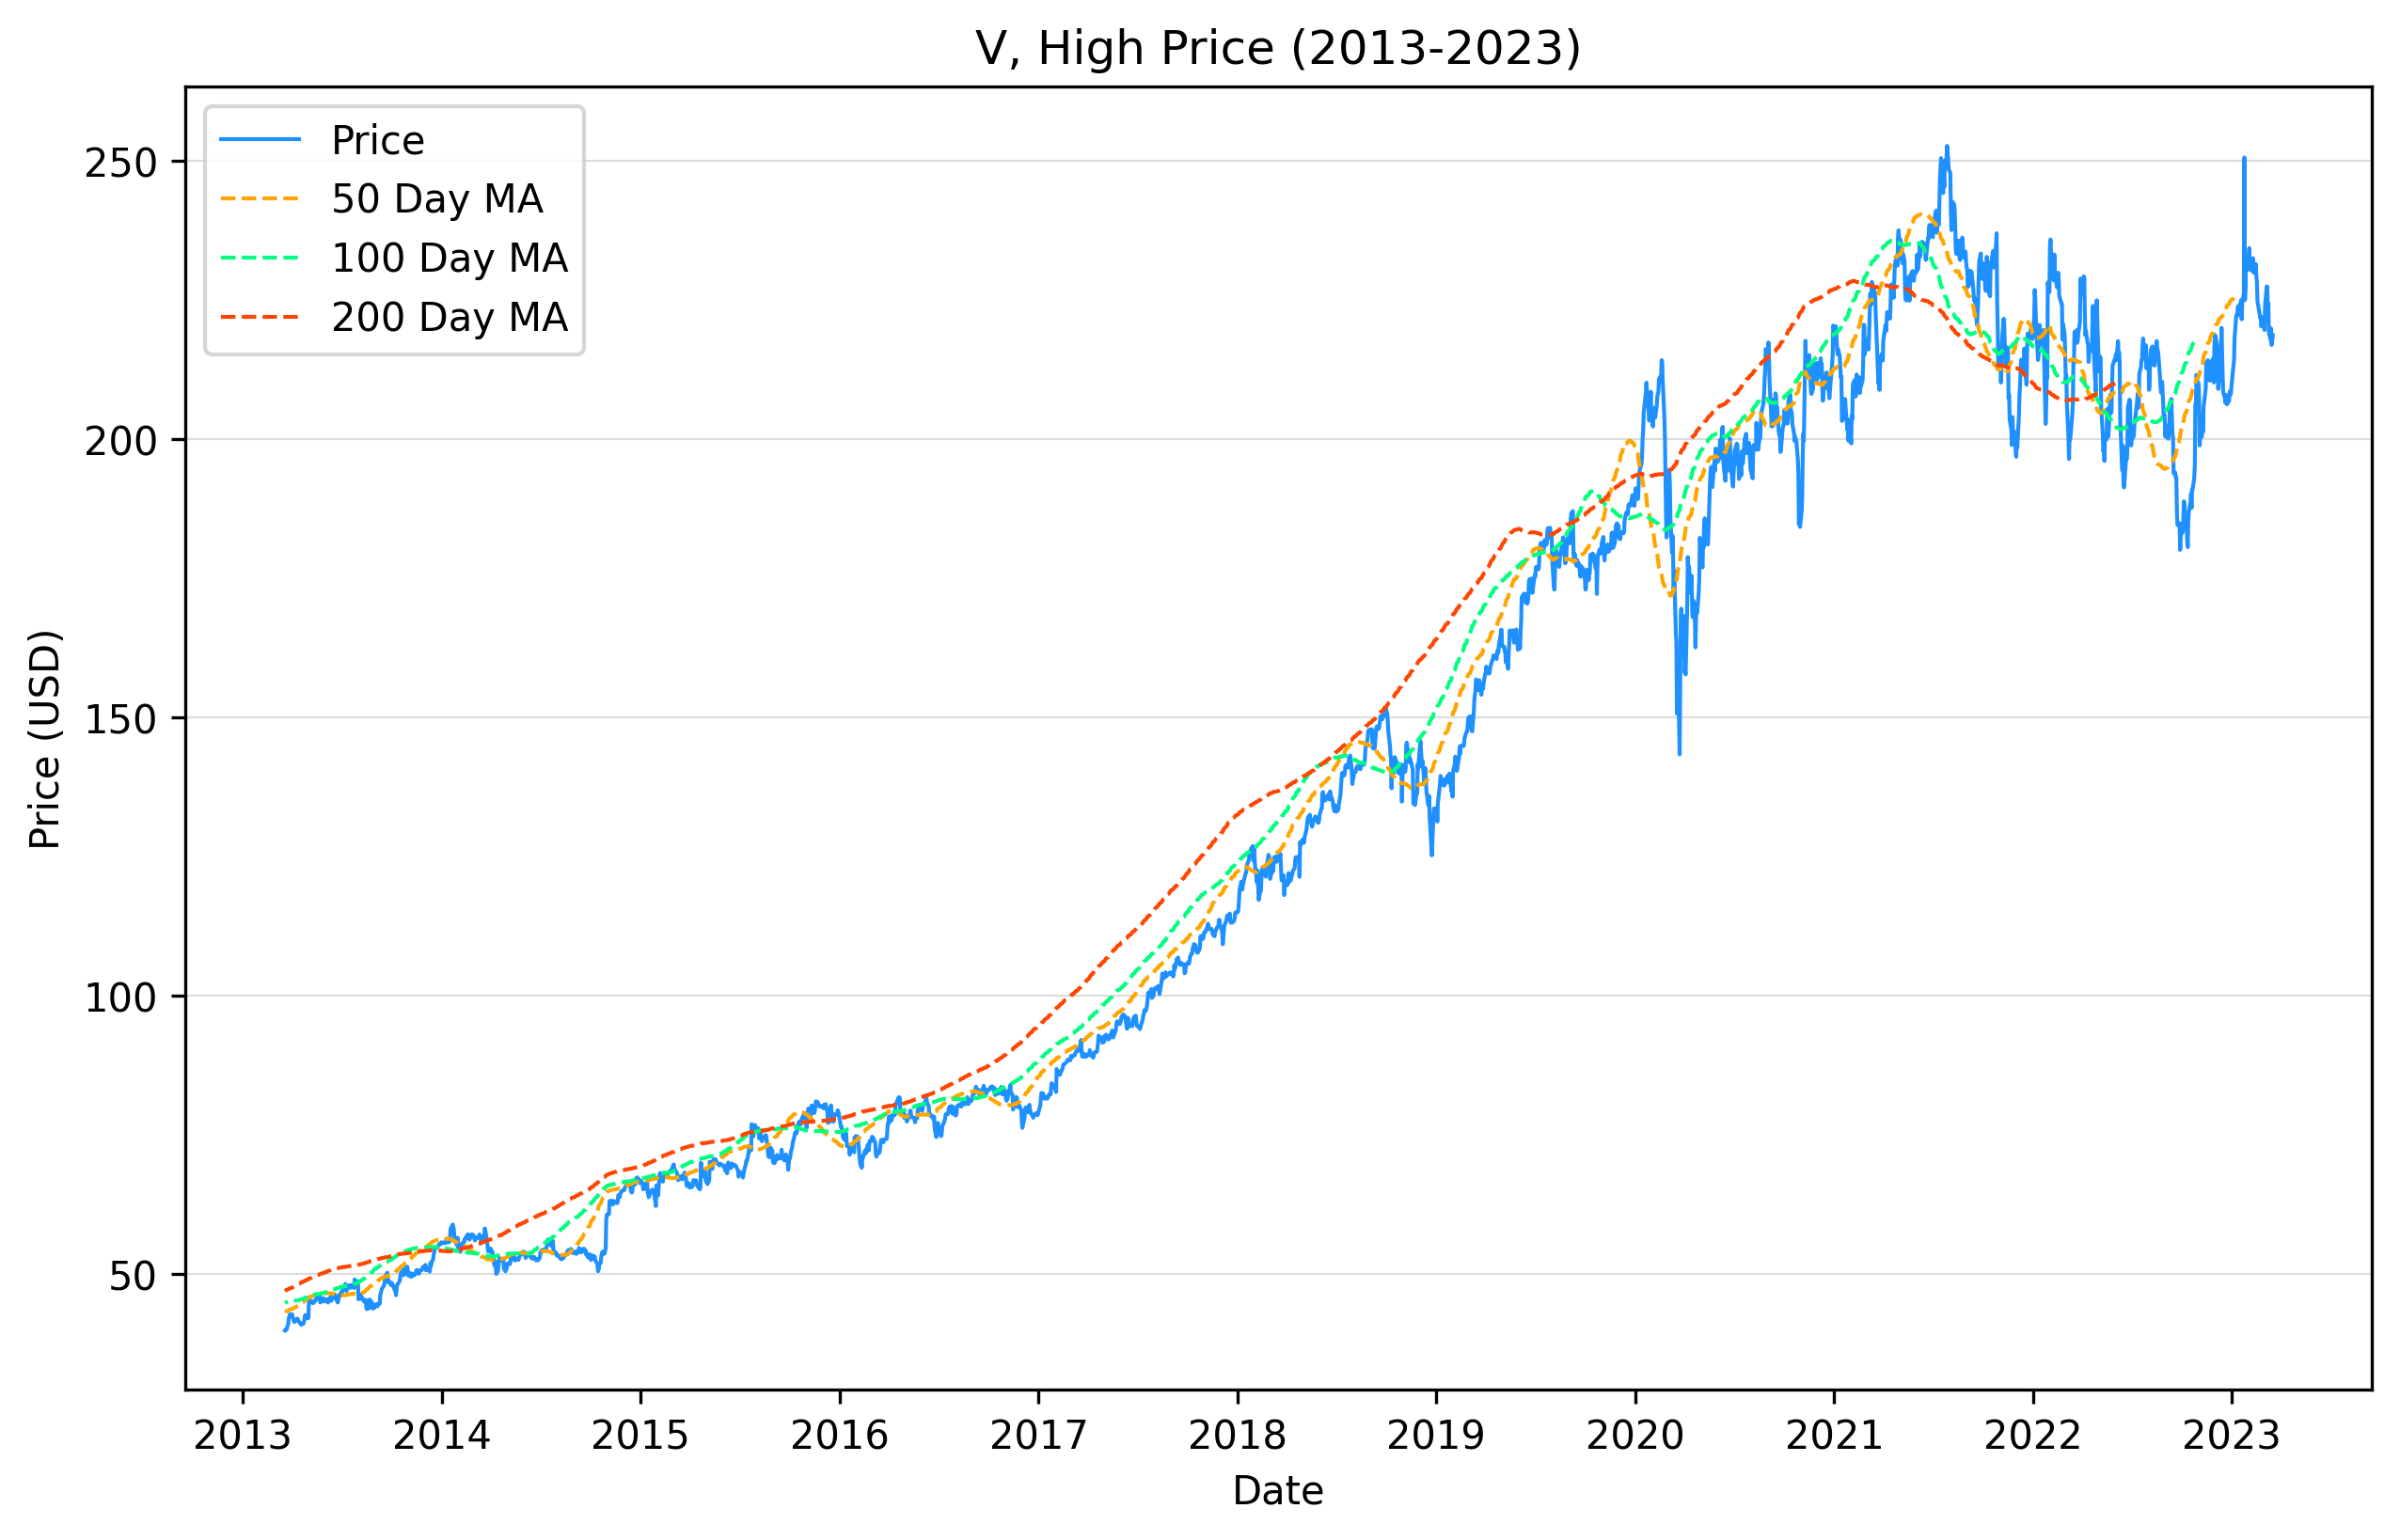

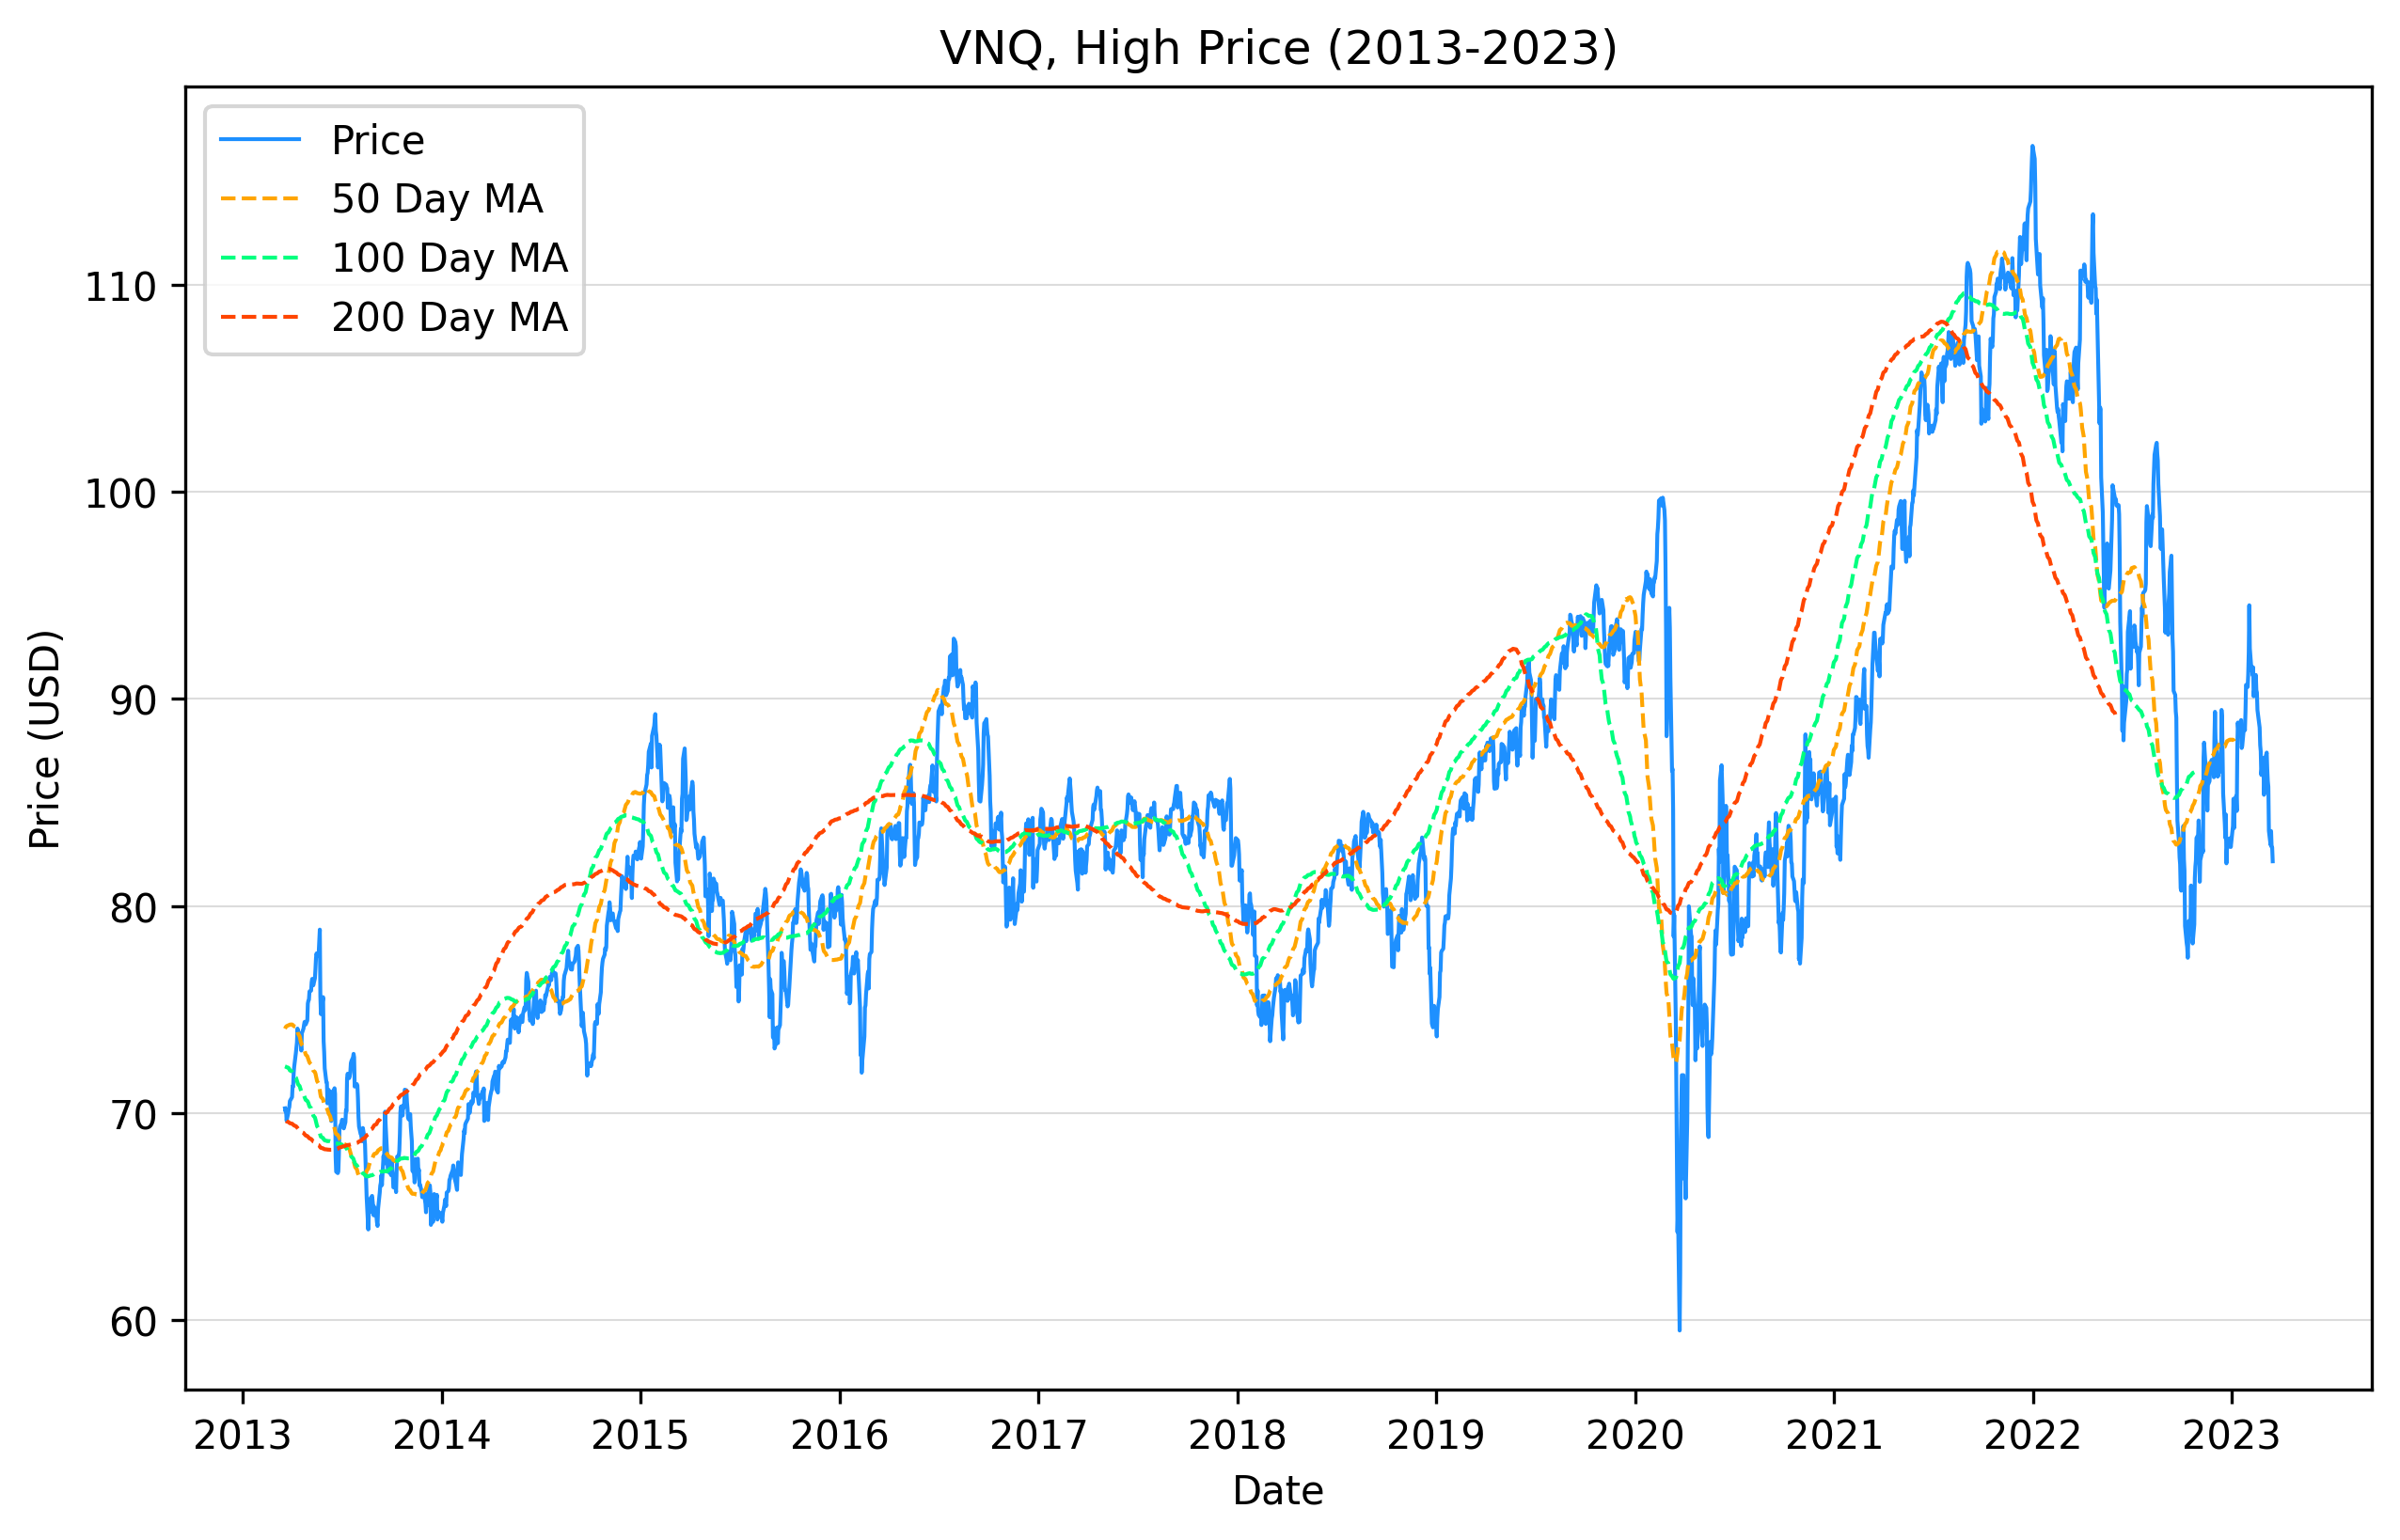

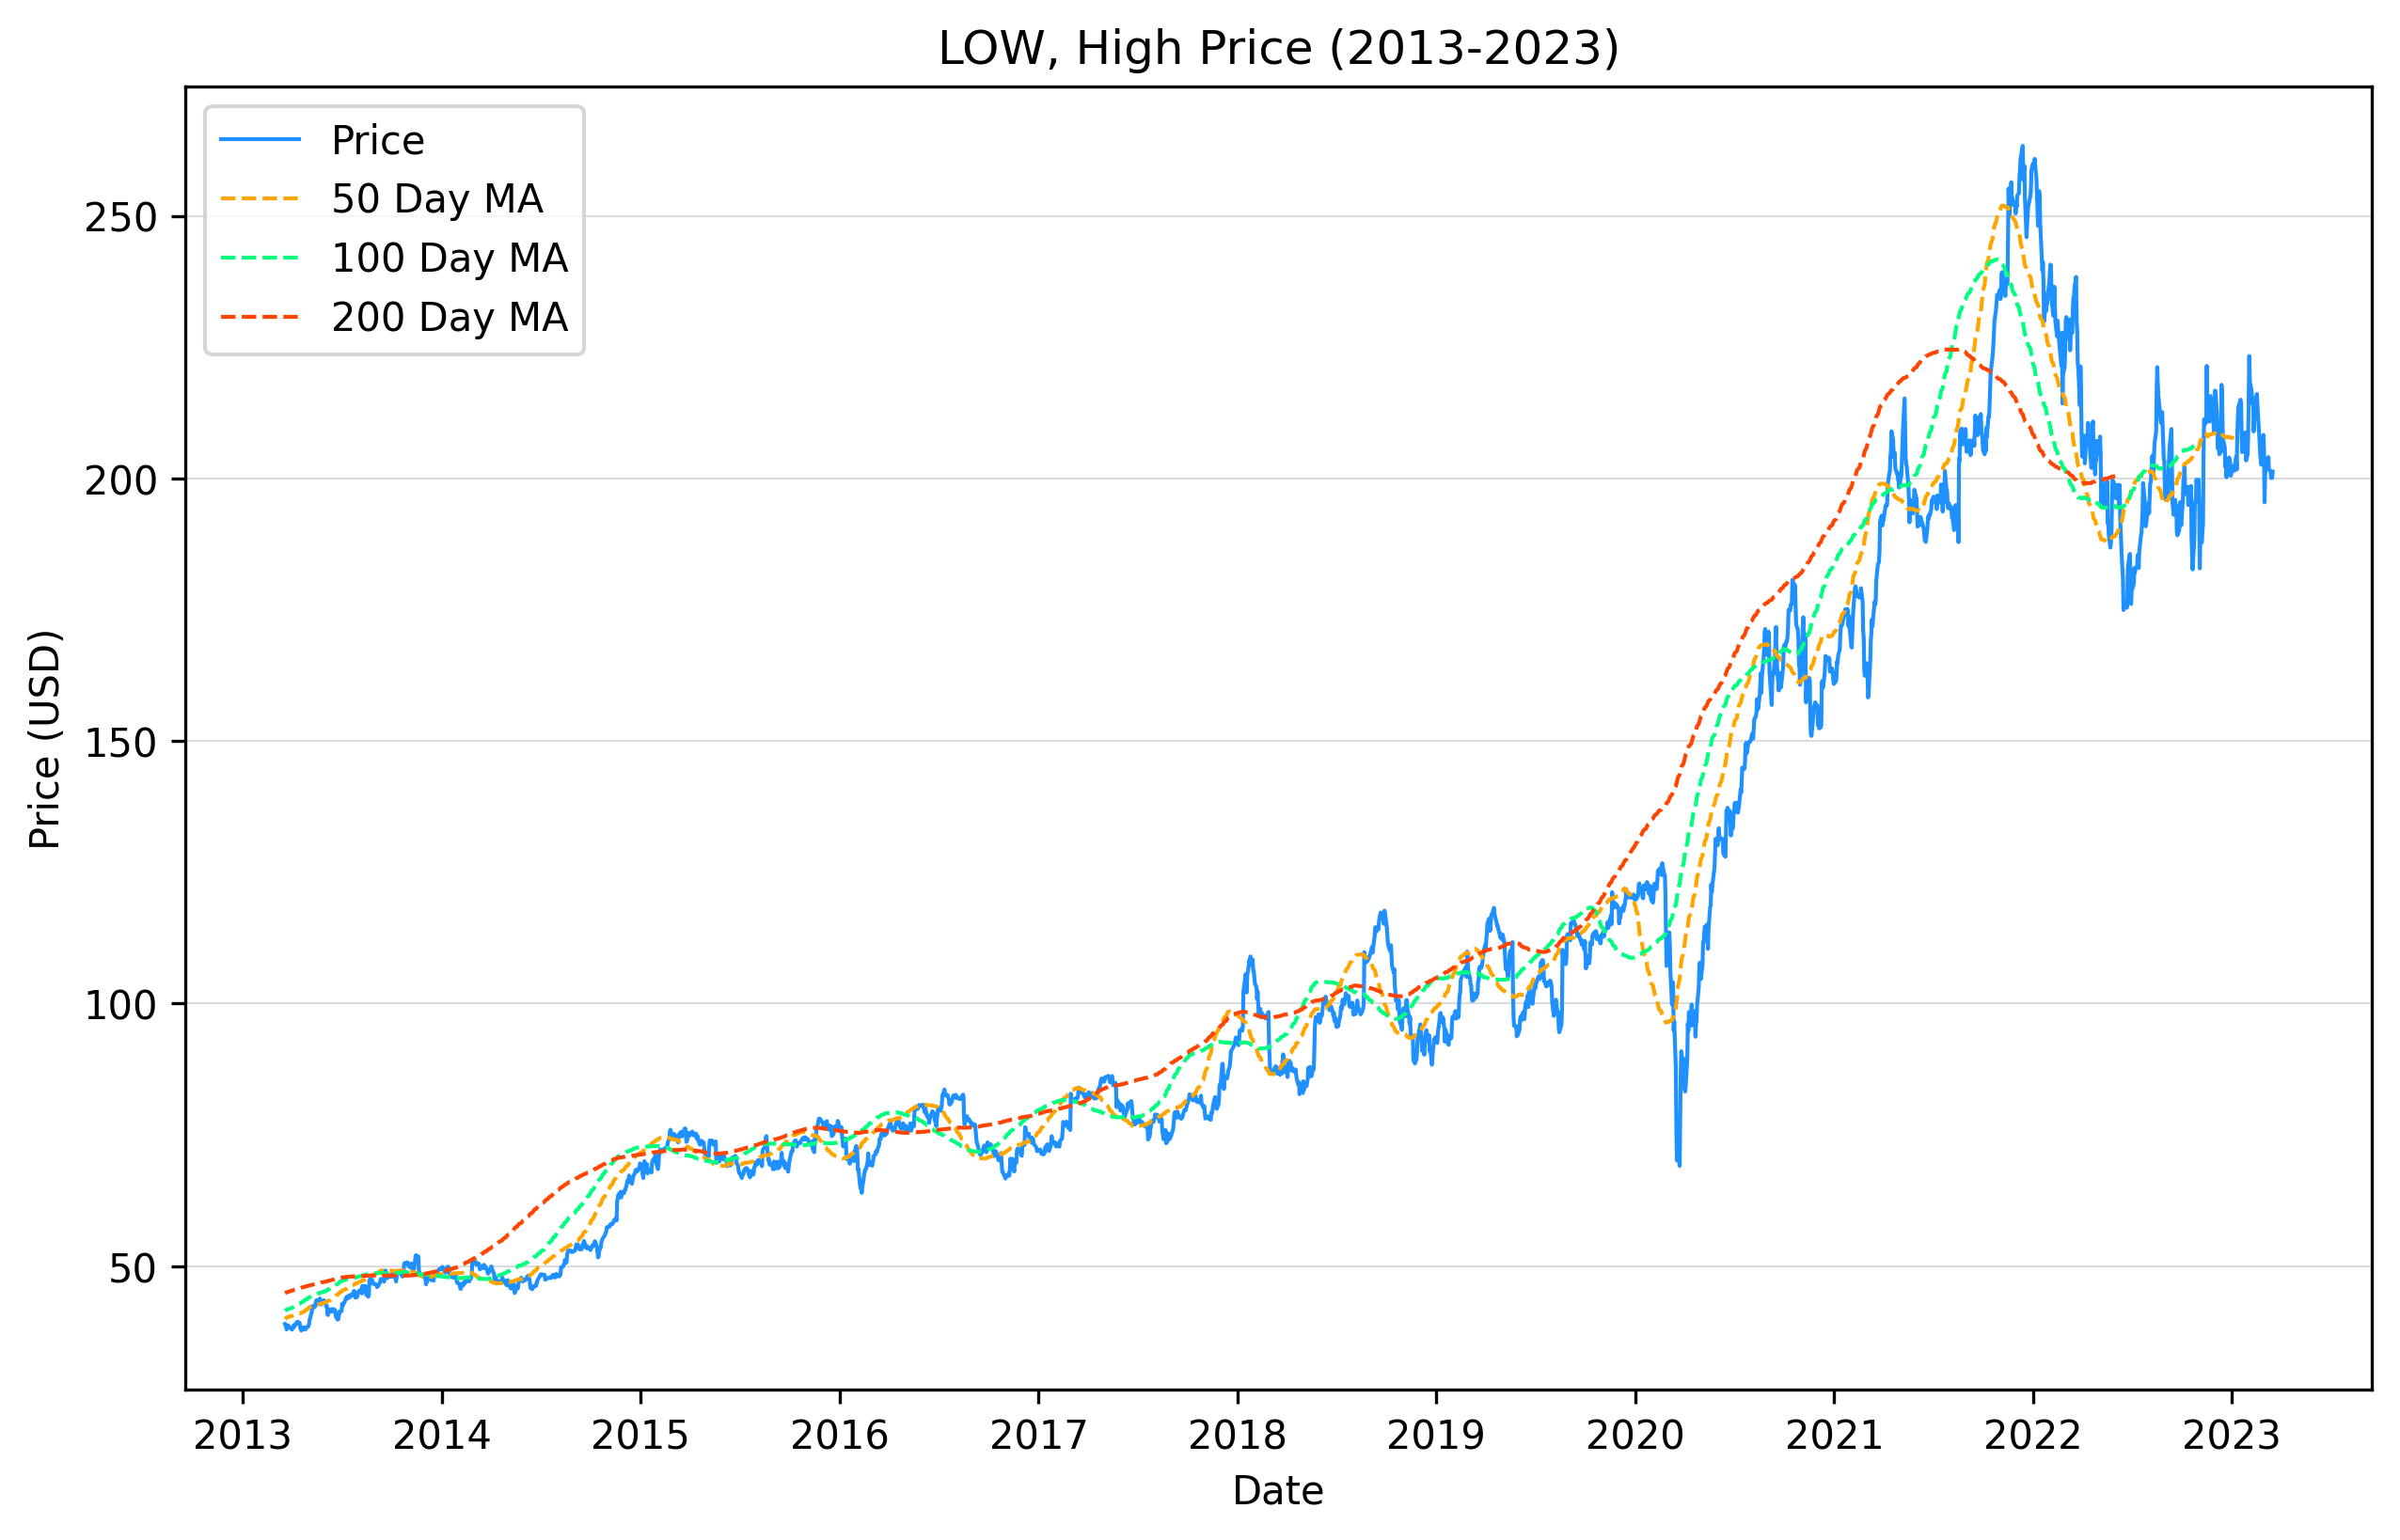

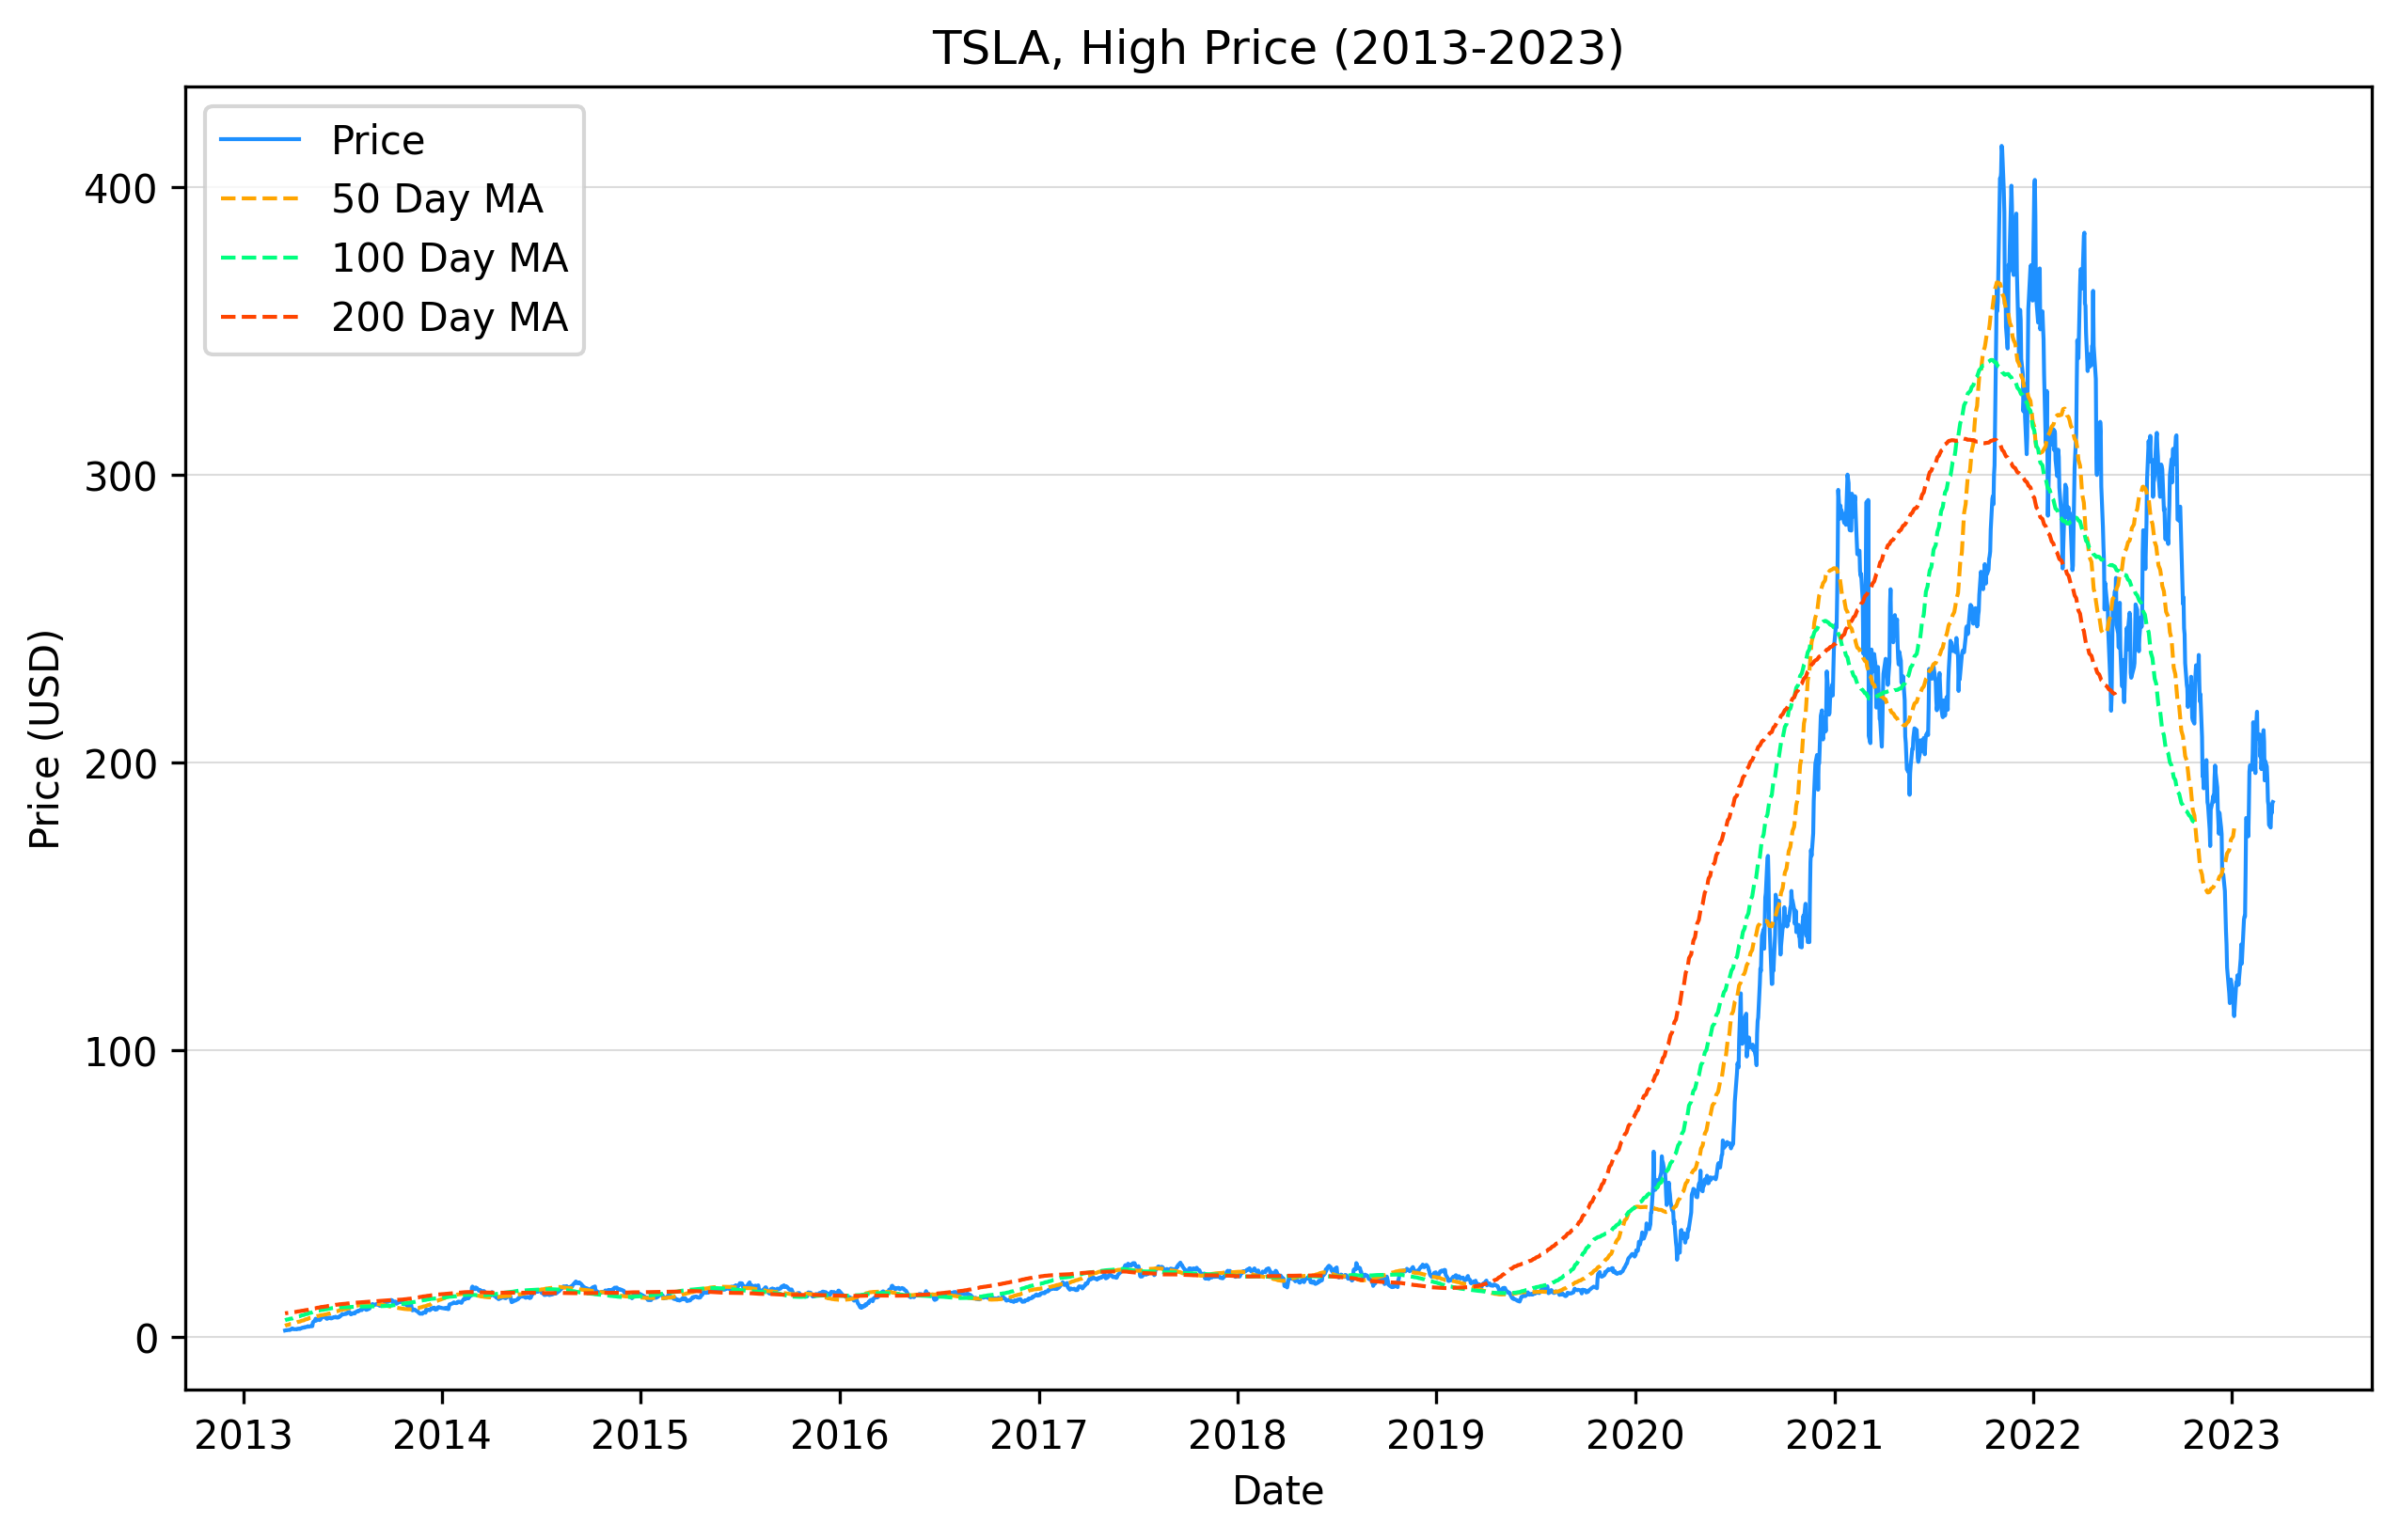

In [37]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	df["high_rolling_50"] = df["High"].rolling(50).mean()
	df["high_rolling_100"] = df["High"].rolling(100).mean()
	df["high_rolling_200"] = df["High"].rolling(200).mean()
	 
	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(df["High"], linewidth=1, color='dodgerblue', label="Price")
	plt.plot(df["high_rolling_50"], linewidth=1, label="50 Day MA", color='orange', ls='--')
	plt.plot(df["high_rolling_100"], linewidth=1, label="100 Day MA", color='springgreen', ls='--')
	plt.plot(df["high_rolling_200"], linewidth=1, label="200 Day MA", color='orangered', ls='--')

	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, High Price (2013-2023)")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}.svg", bbox_inches="tight", format='svg')

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	df["high_rolling_50"] = df["High"].rolling(50).mean()
	df["high_rolling_100"] = df["High"].rolling(100).mean()
	df["high_rolling_200"] = df["High"].rolling(200).mean()
	 
	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(df["High"], linewidth=1, color='dodgerblue', label="Price")
	plt.plot(df["high_rolling_50"], linewidth=1, label="50 Day MA", color='orange', ls='--')
	plt.plot(df["high_rolling_100"], linewidth=1, label="100 Day MA", color='springgreen', ls='--')
	plt.plot(df["high_rolling_200"], linewidth=1, label="200 Day MA", color='orangered', ls='--')

	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, High Price (2013-2023)")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}.svg", bbox_inches="tight", format='svg')

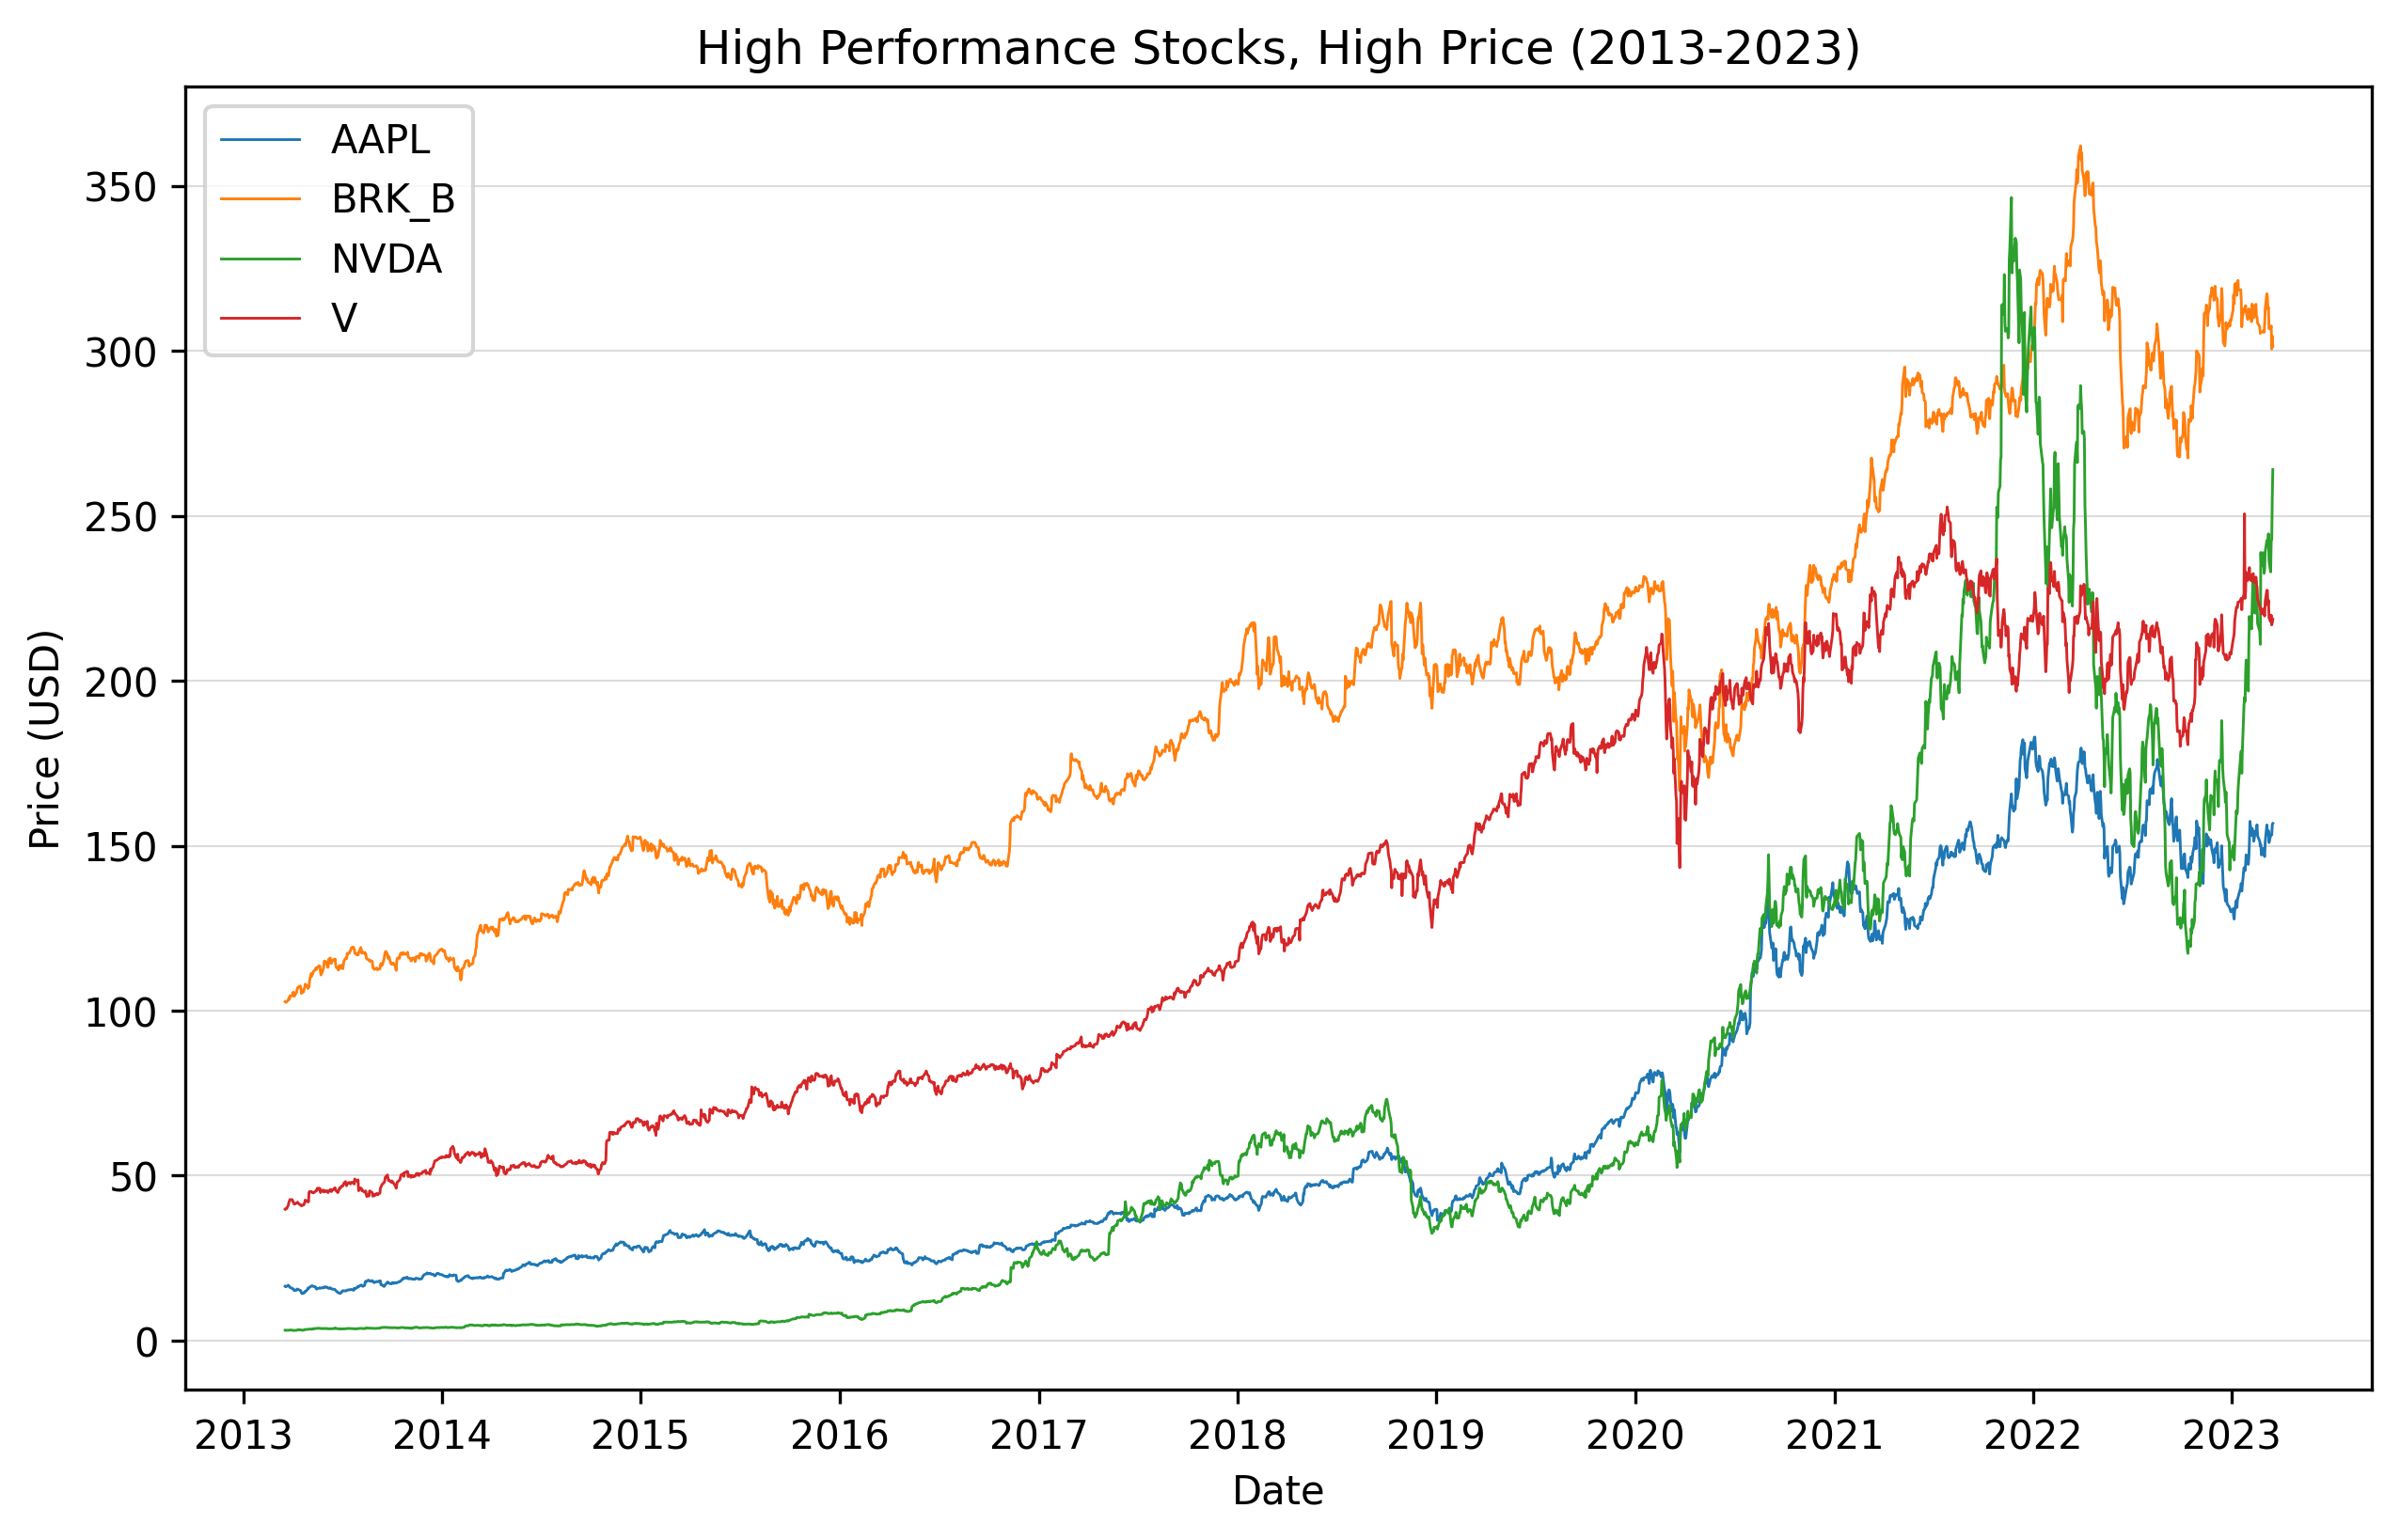

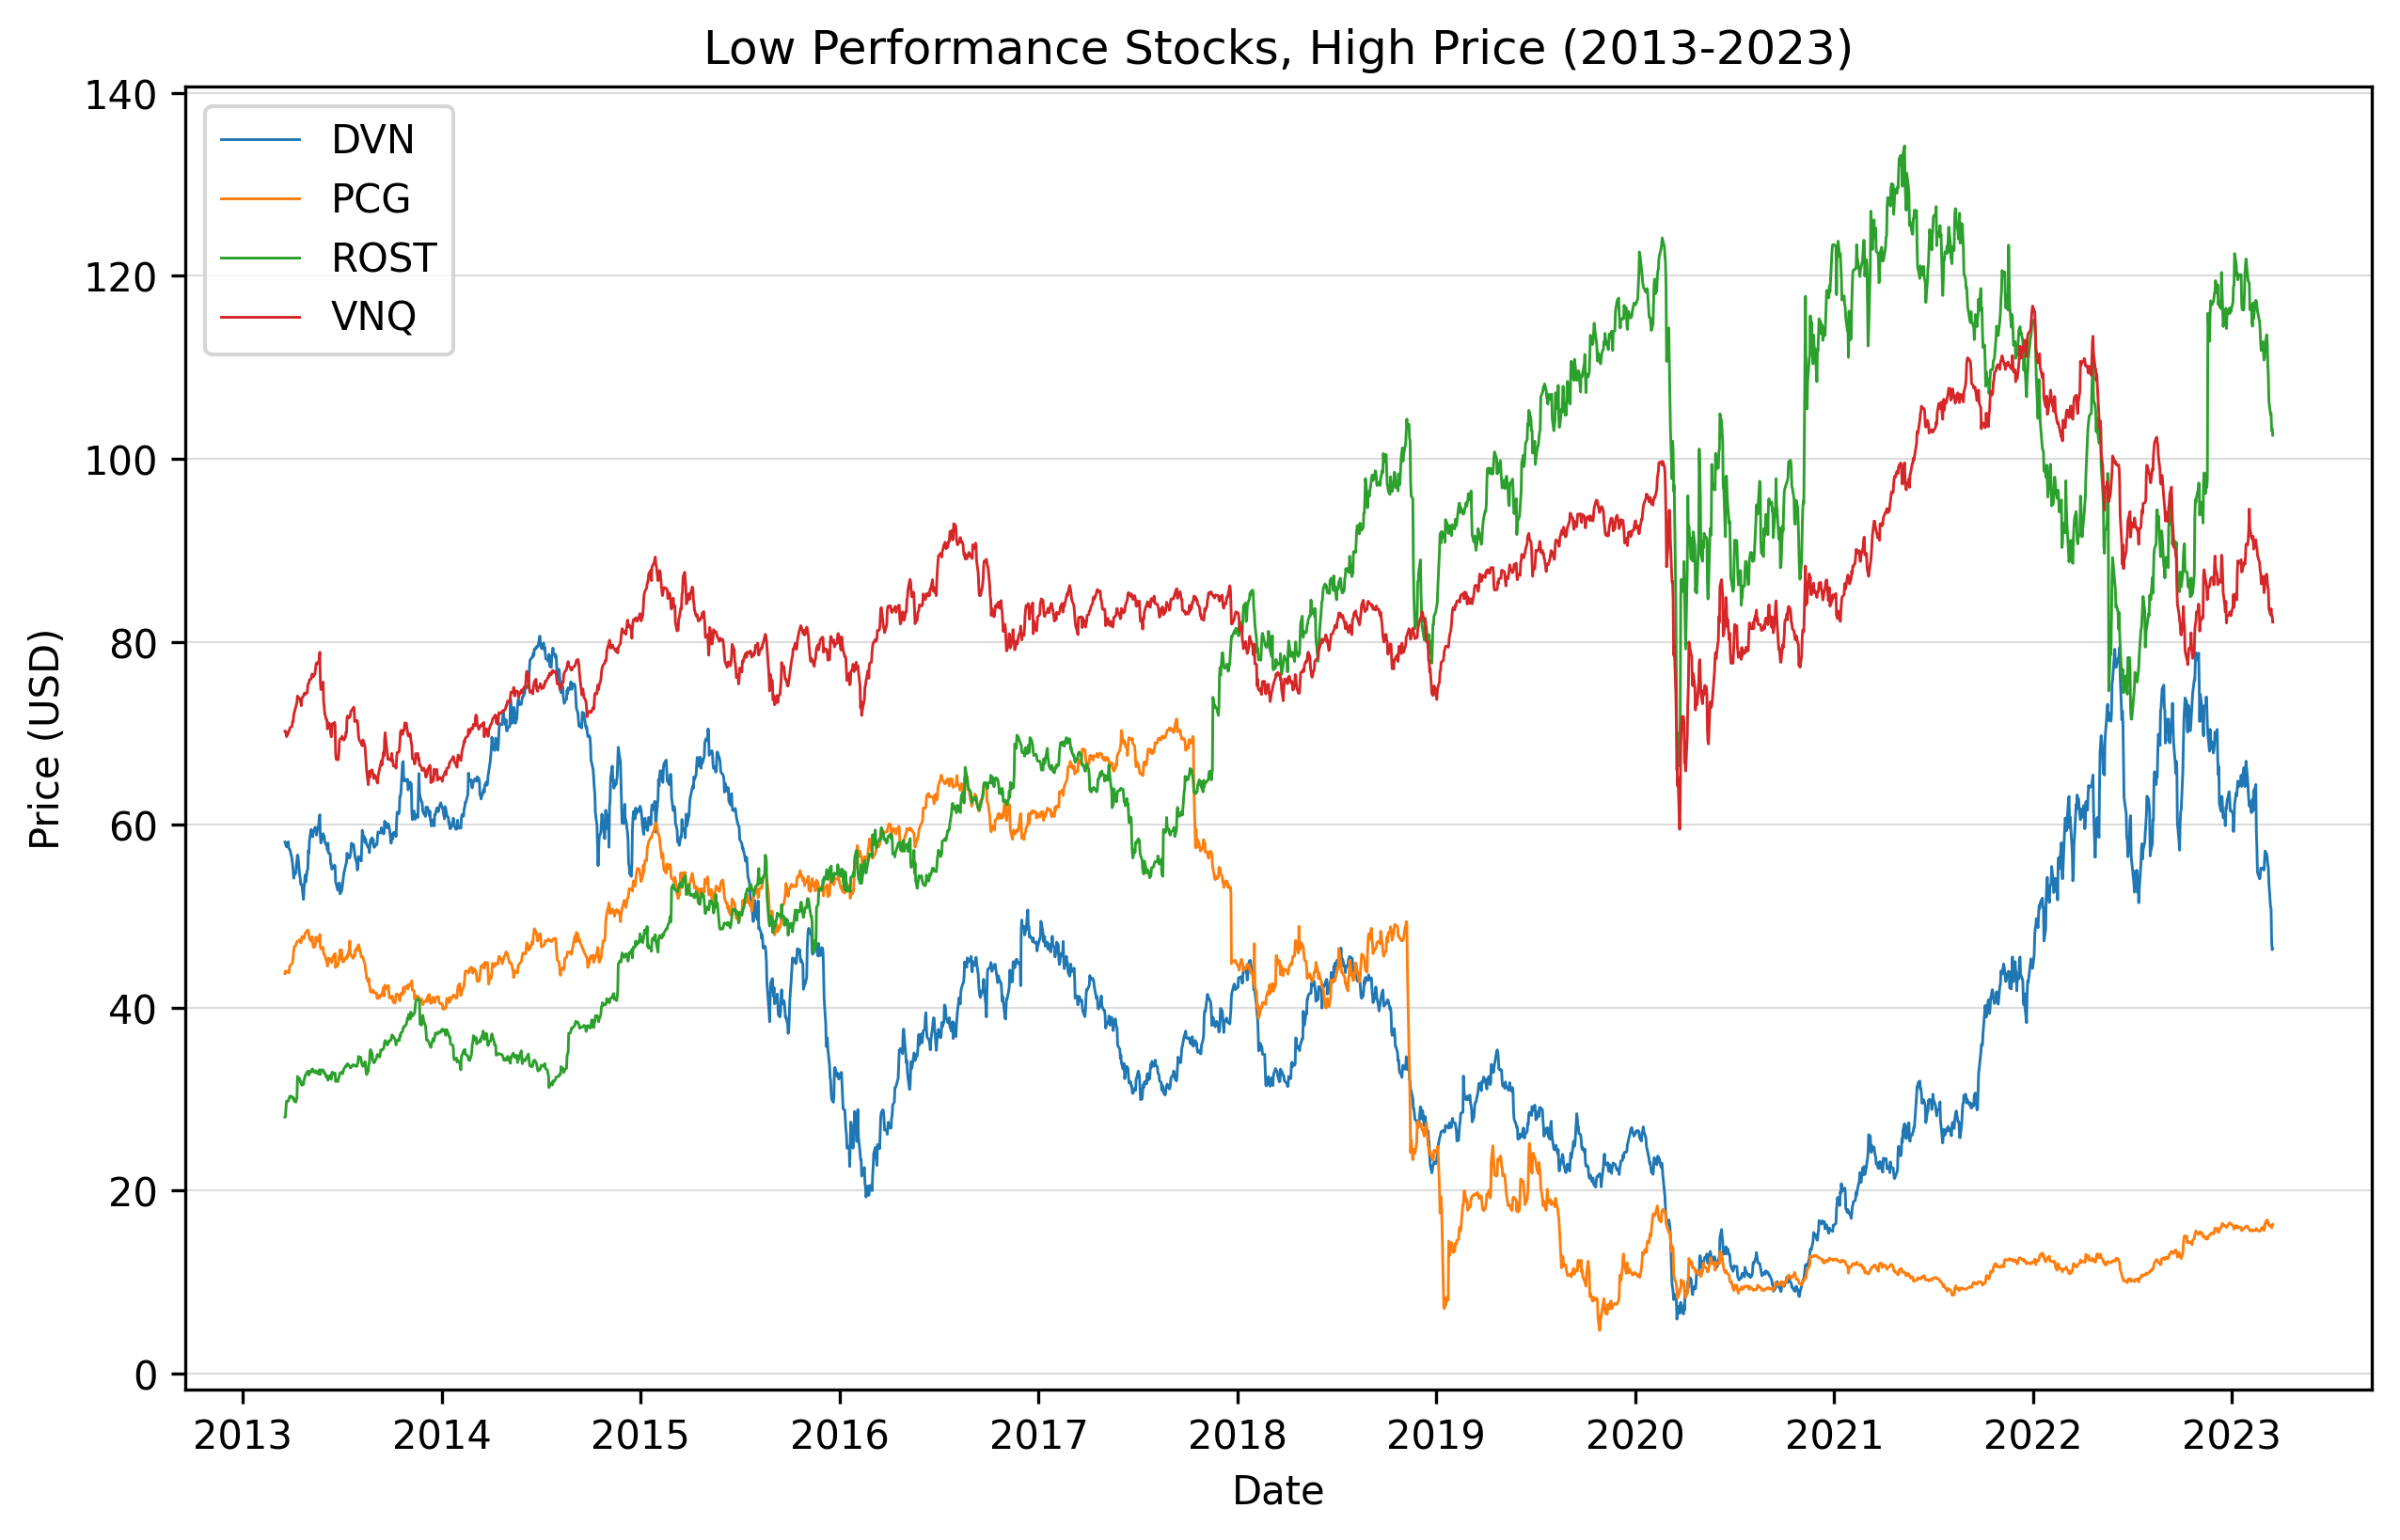

In [38]:
good = ["AAPL", "BRK_B", "NVDA", "V"]
bad = ["DVN", "PCG", "ROST", "VNQ"]

plt.figure(figsize=(10,6), dpi=300)

for f in good:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	
	plt.plot(df["High"], linewidth=0.7, label=f)

plt.title(f"High Performance Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"high_perf.svg", bbox_inches="tight", format='svg')


plt.figure(figsize=(10,6), dpi=300)

for f in bad:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	plt.plot(df["High"], linewidth=0.7, label=f)

plt.title(f"Low Performance Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"low_perf.svg", bbox_inches="tight", format='svg')

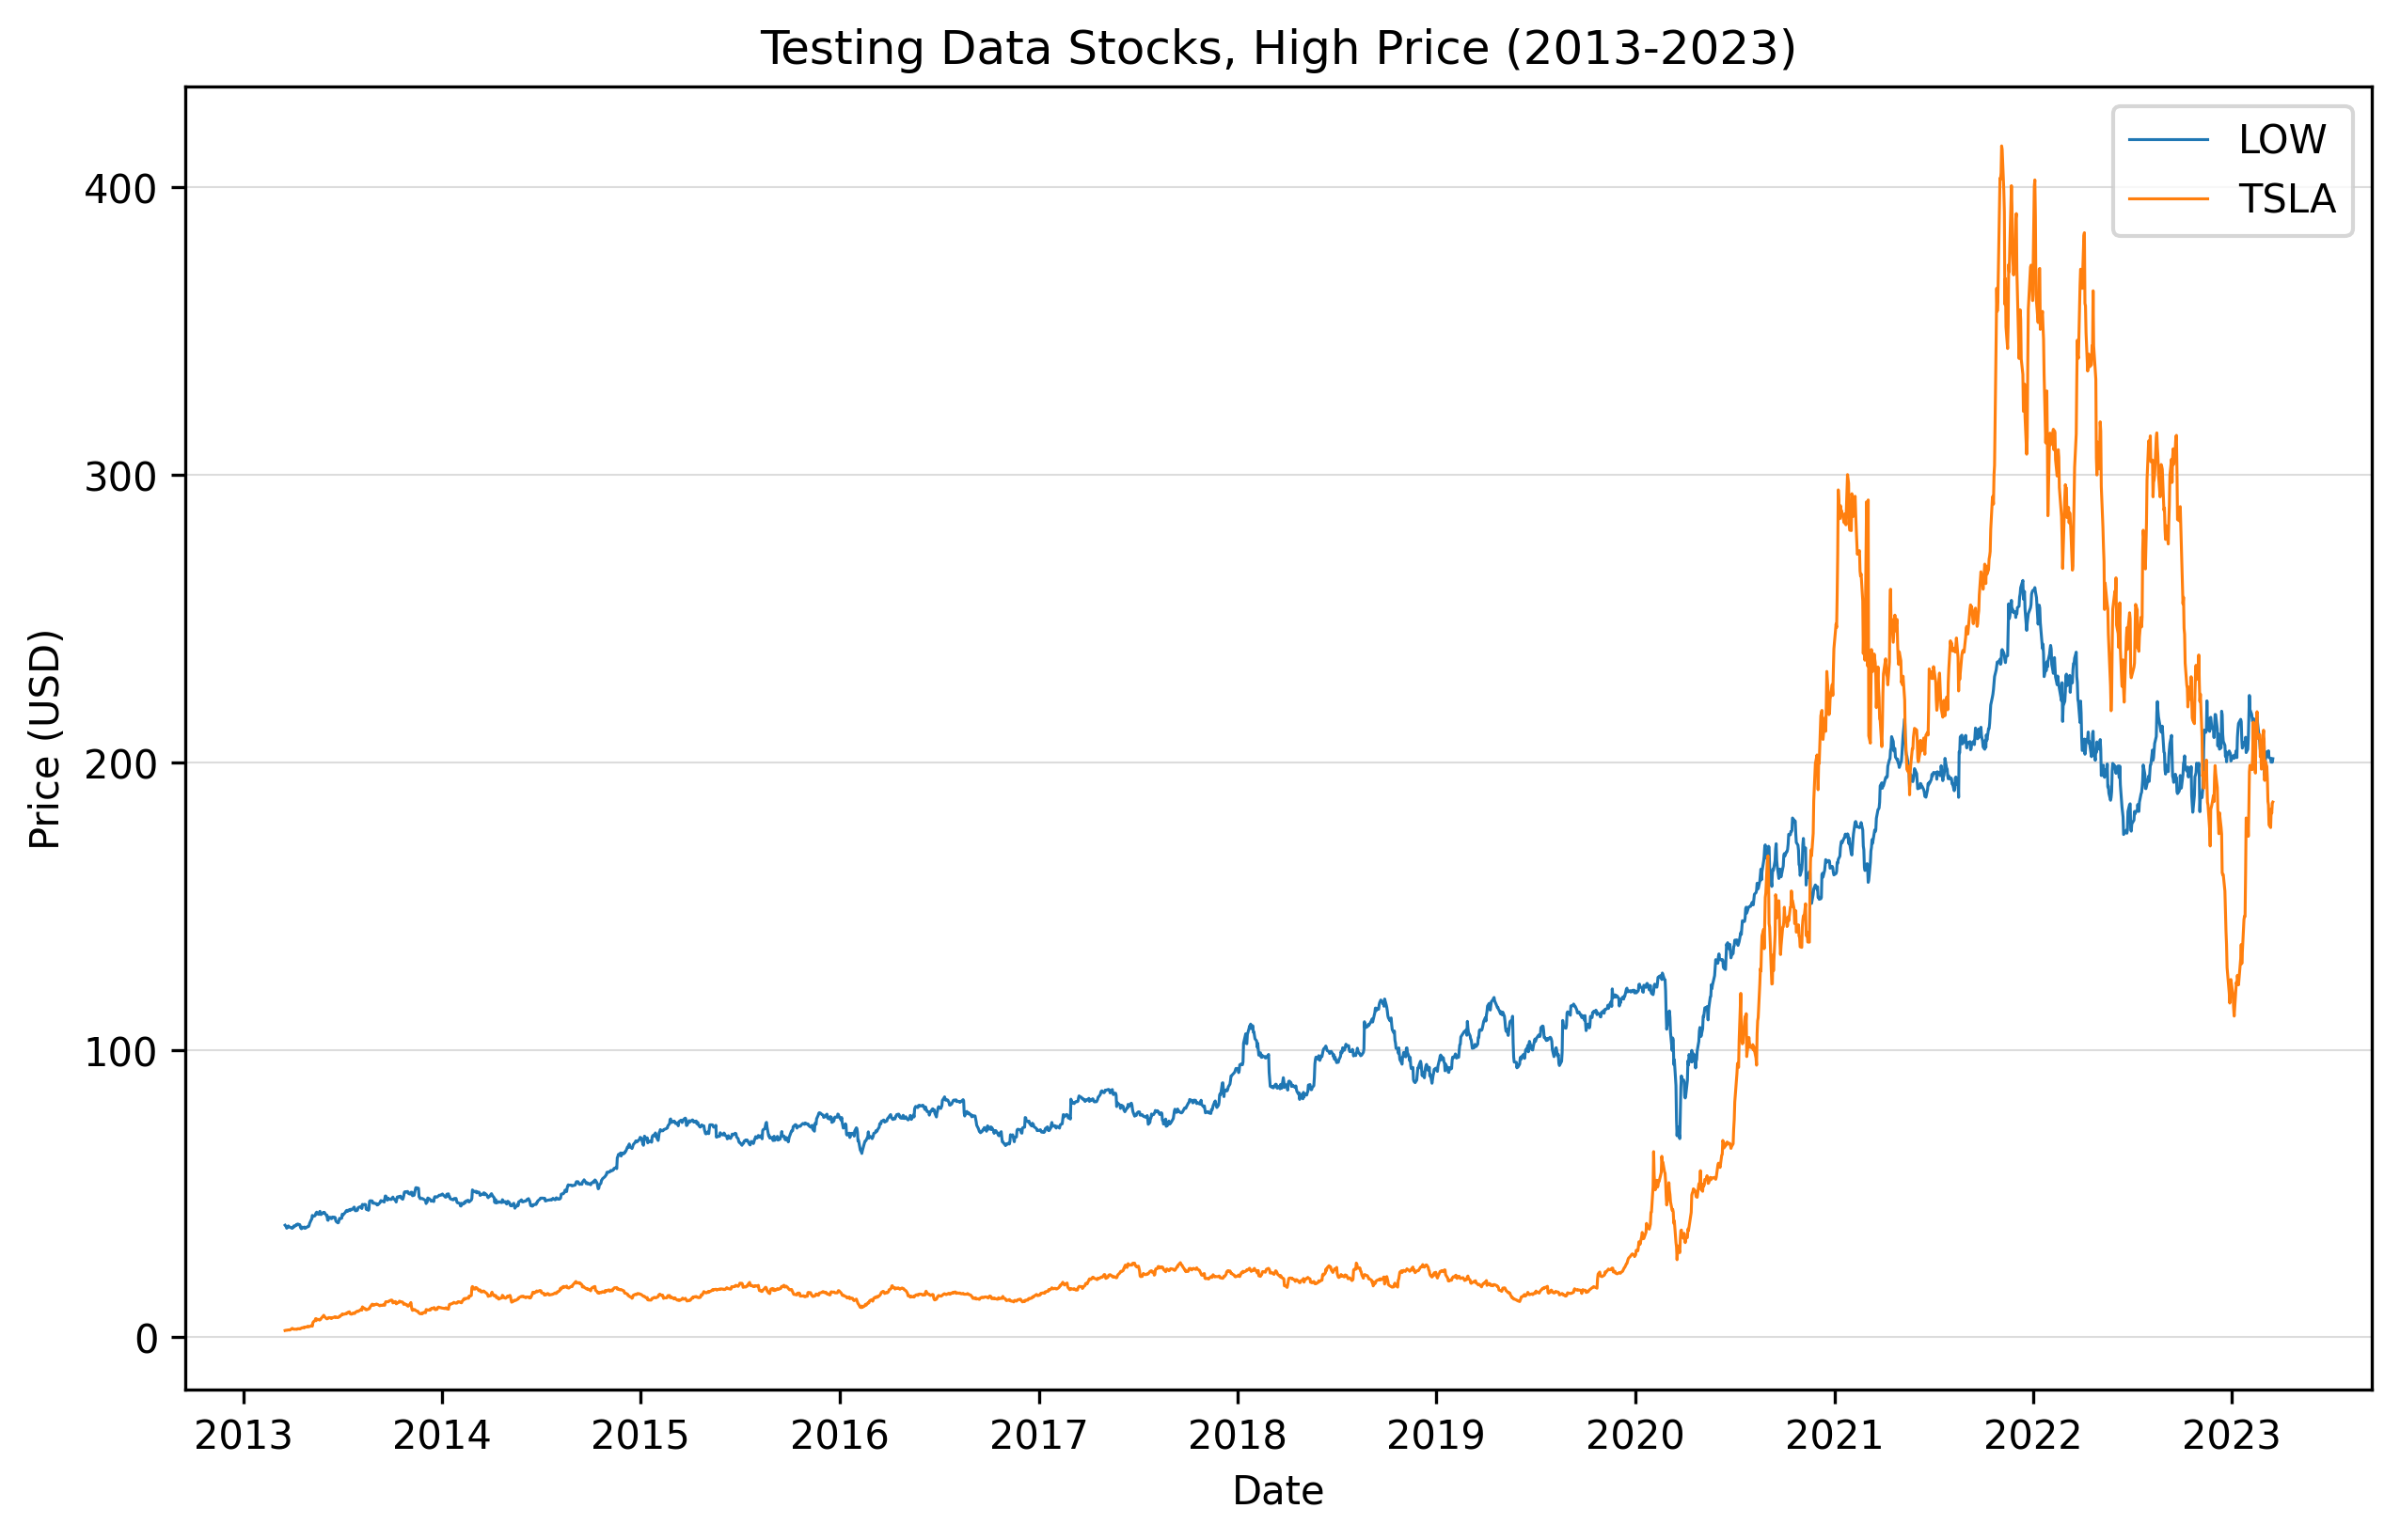

In [39]:
test_data = ["LOW", "TSLA"]

plt.figure(figsize=(10,6), dpi=300)

for f in test_data:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	plt.plot(df["High"], linewidth=0.75, label=f)

plt.title(f"Testing Data Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"test.svg", bbox_inches="tight", format='svg')

### Daily Returns

C:\Users\Robert\AppData\Local\Temp\ipykernel_24872\192191775.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Return"], bins=100, ax=ax)
C:\Users\Robert\AppData\Local\Temp\ipykernel_24872\192191775.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Return"], bins=100, ax=ax)
C:\Use

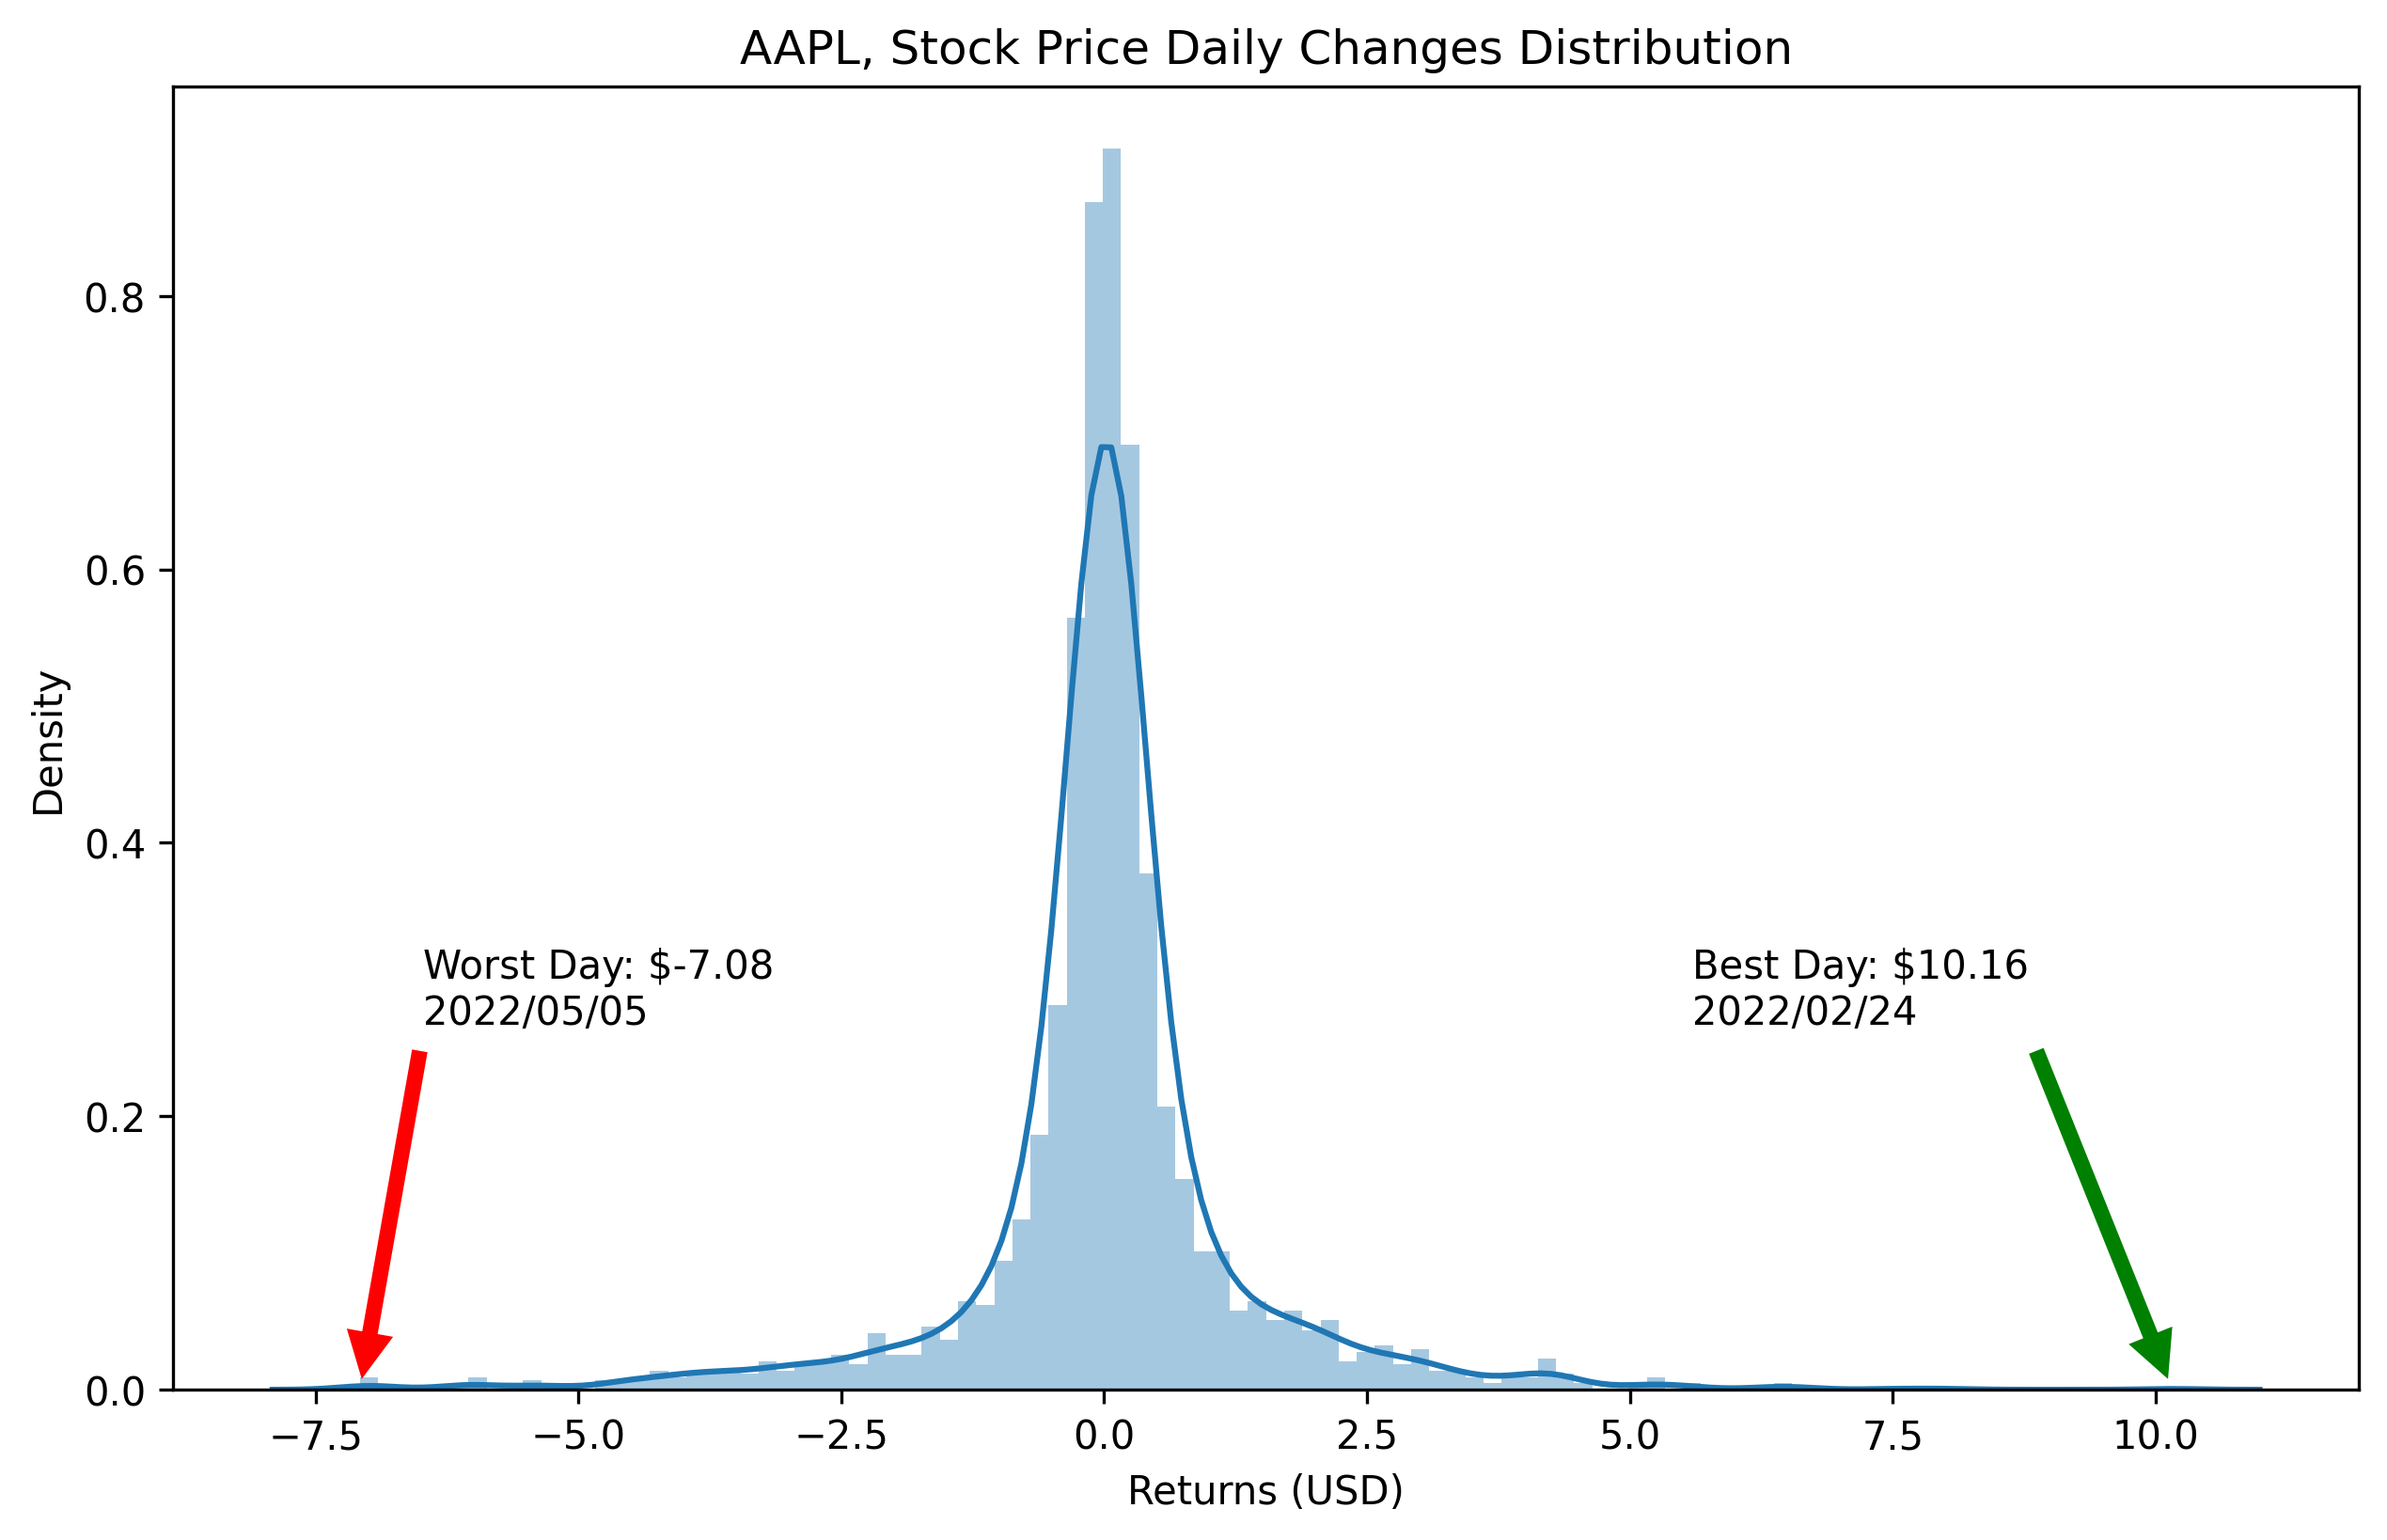

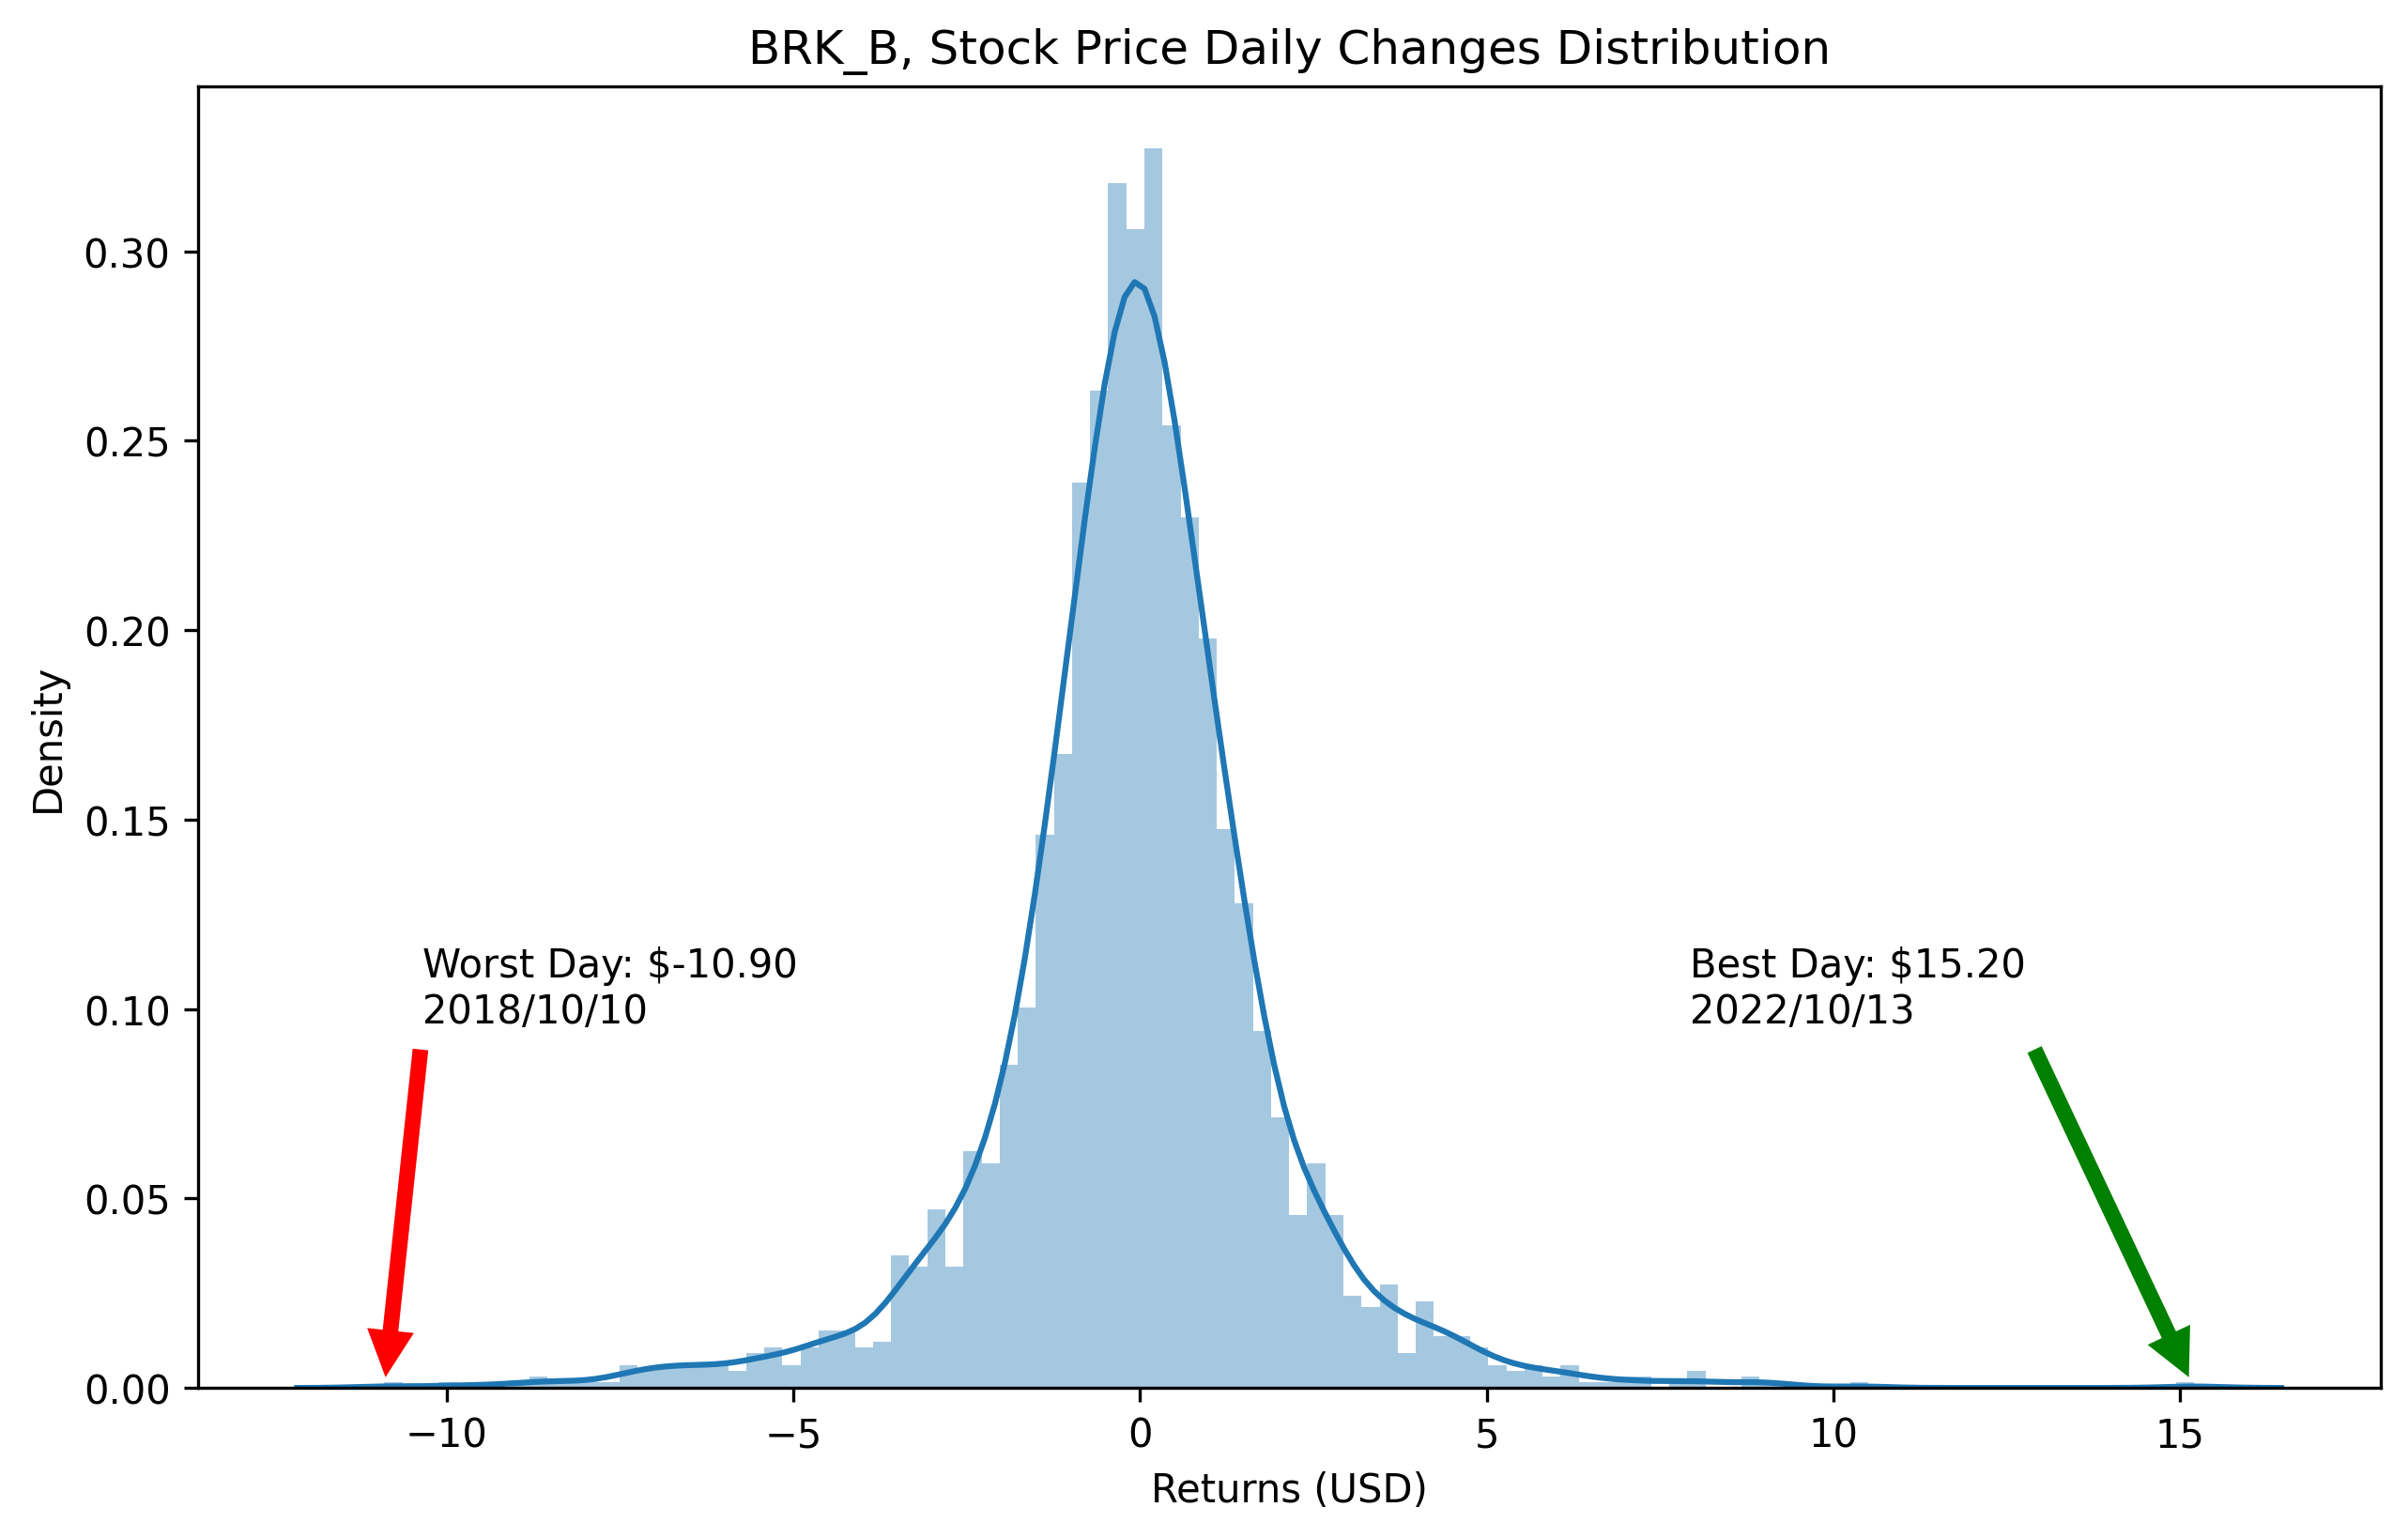

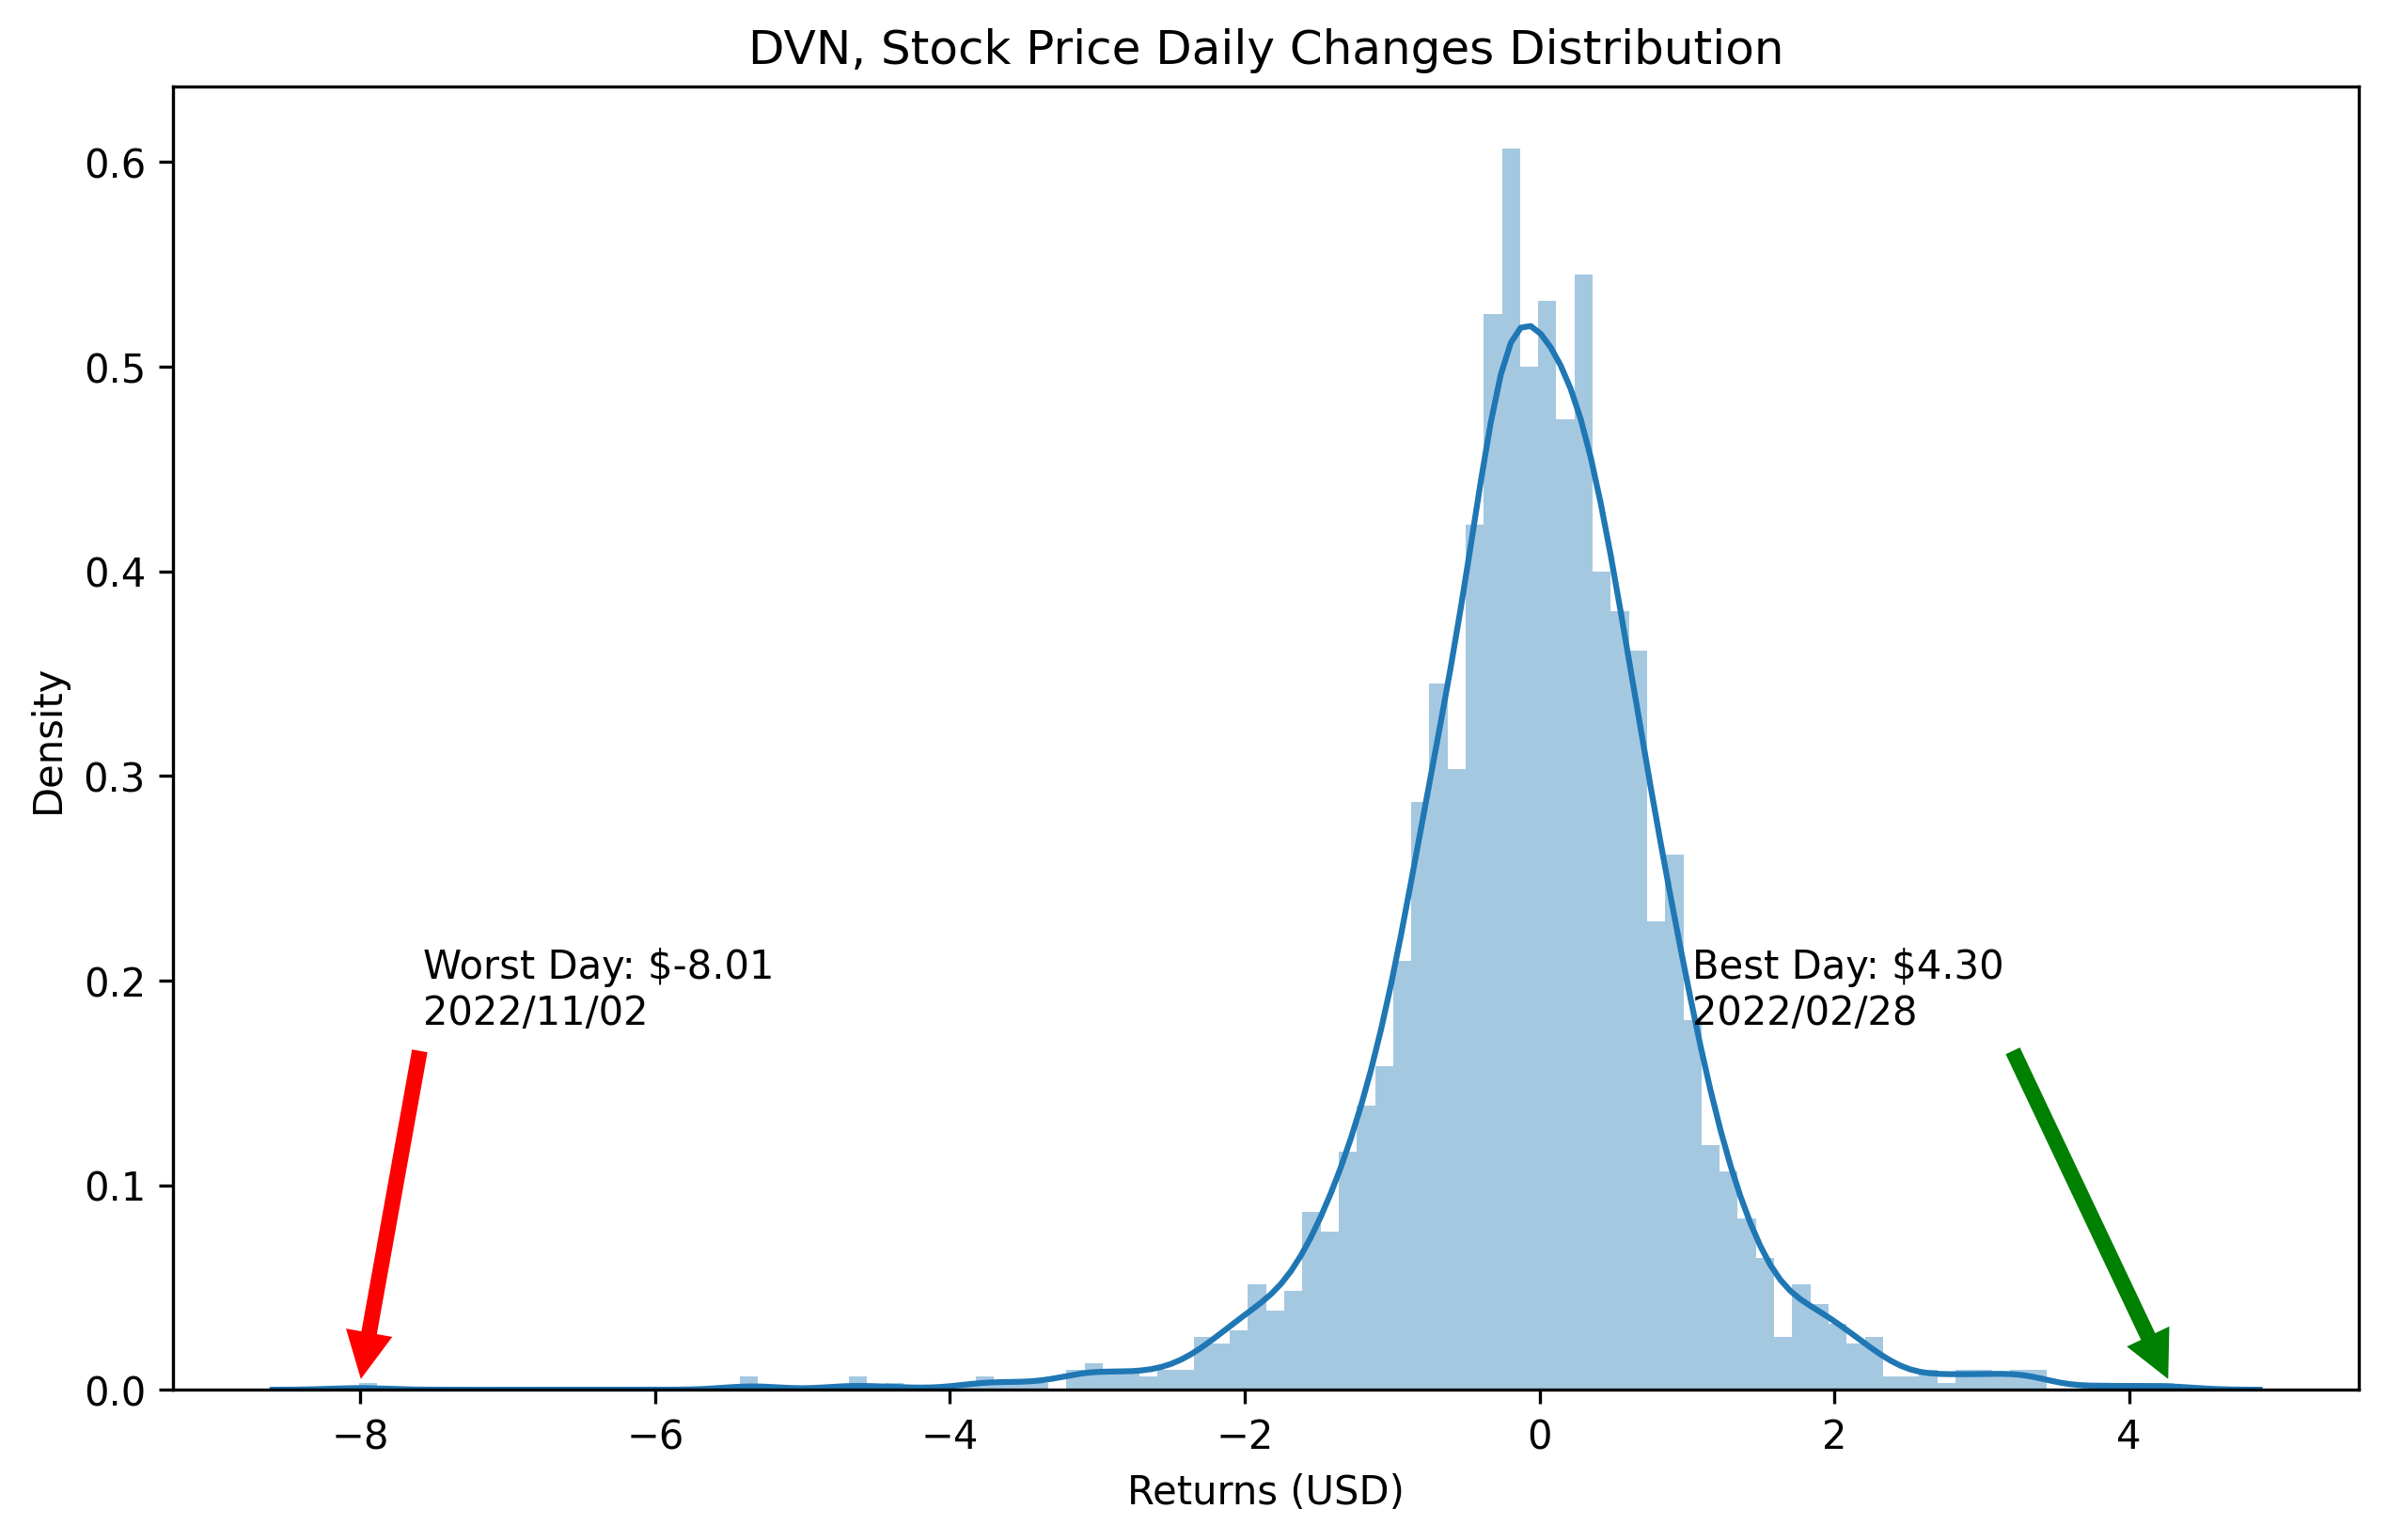

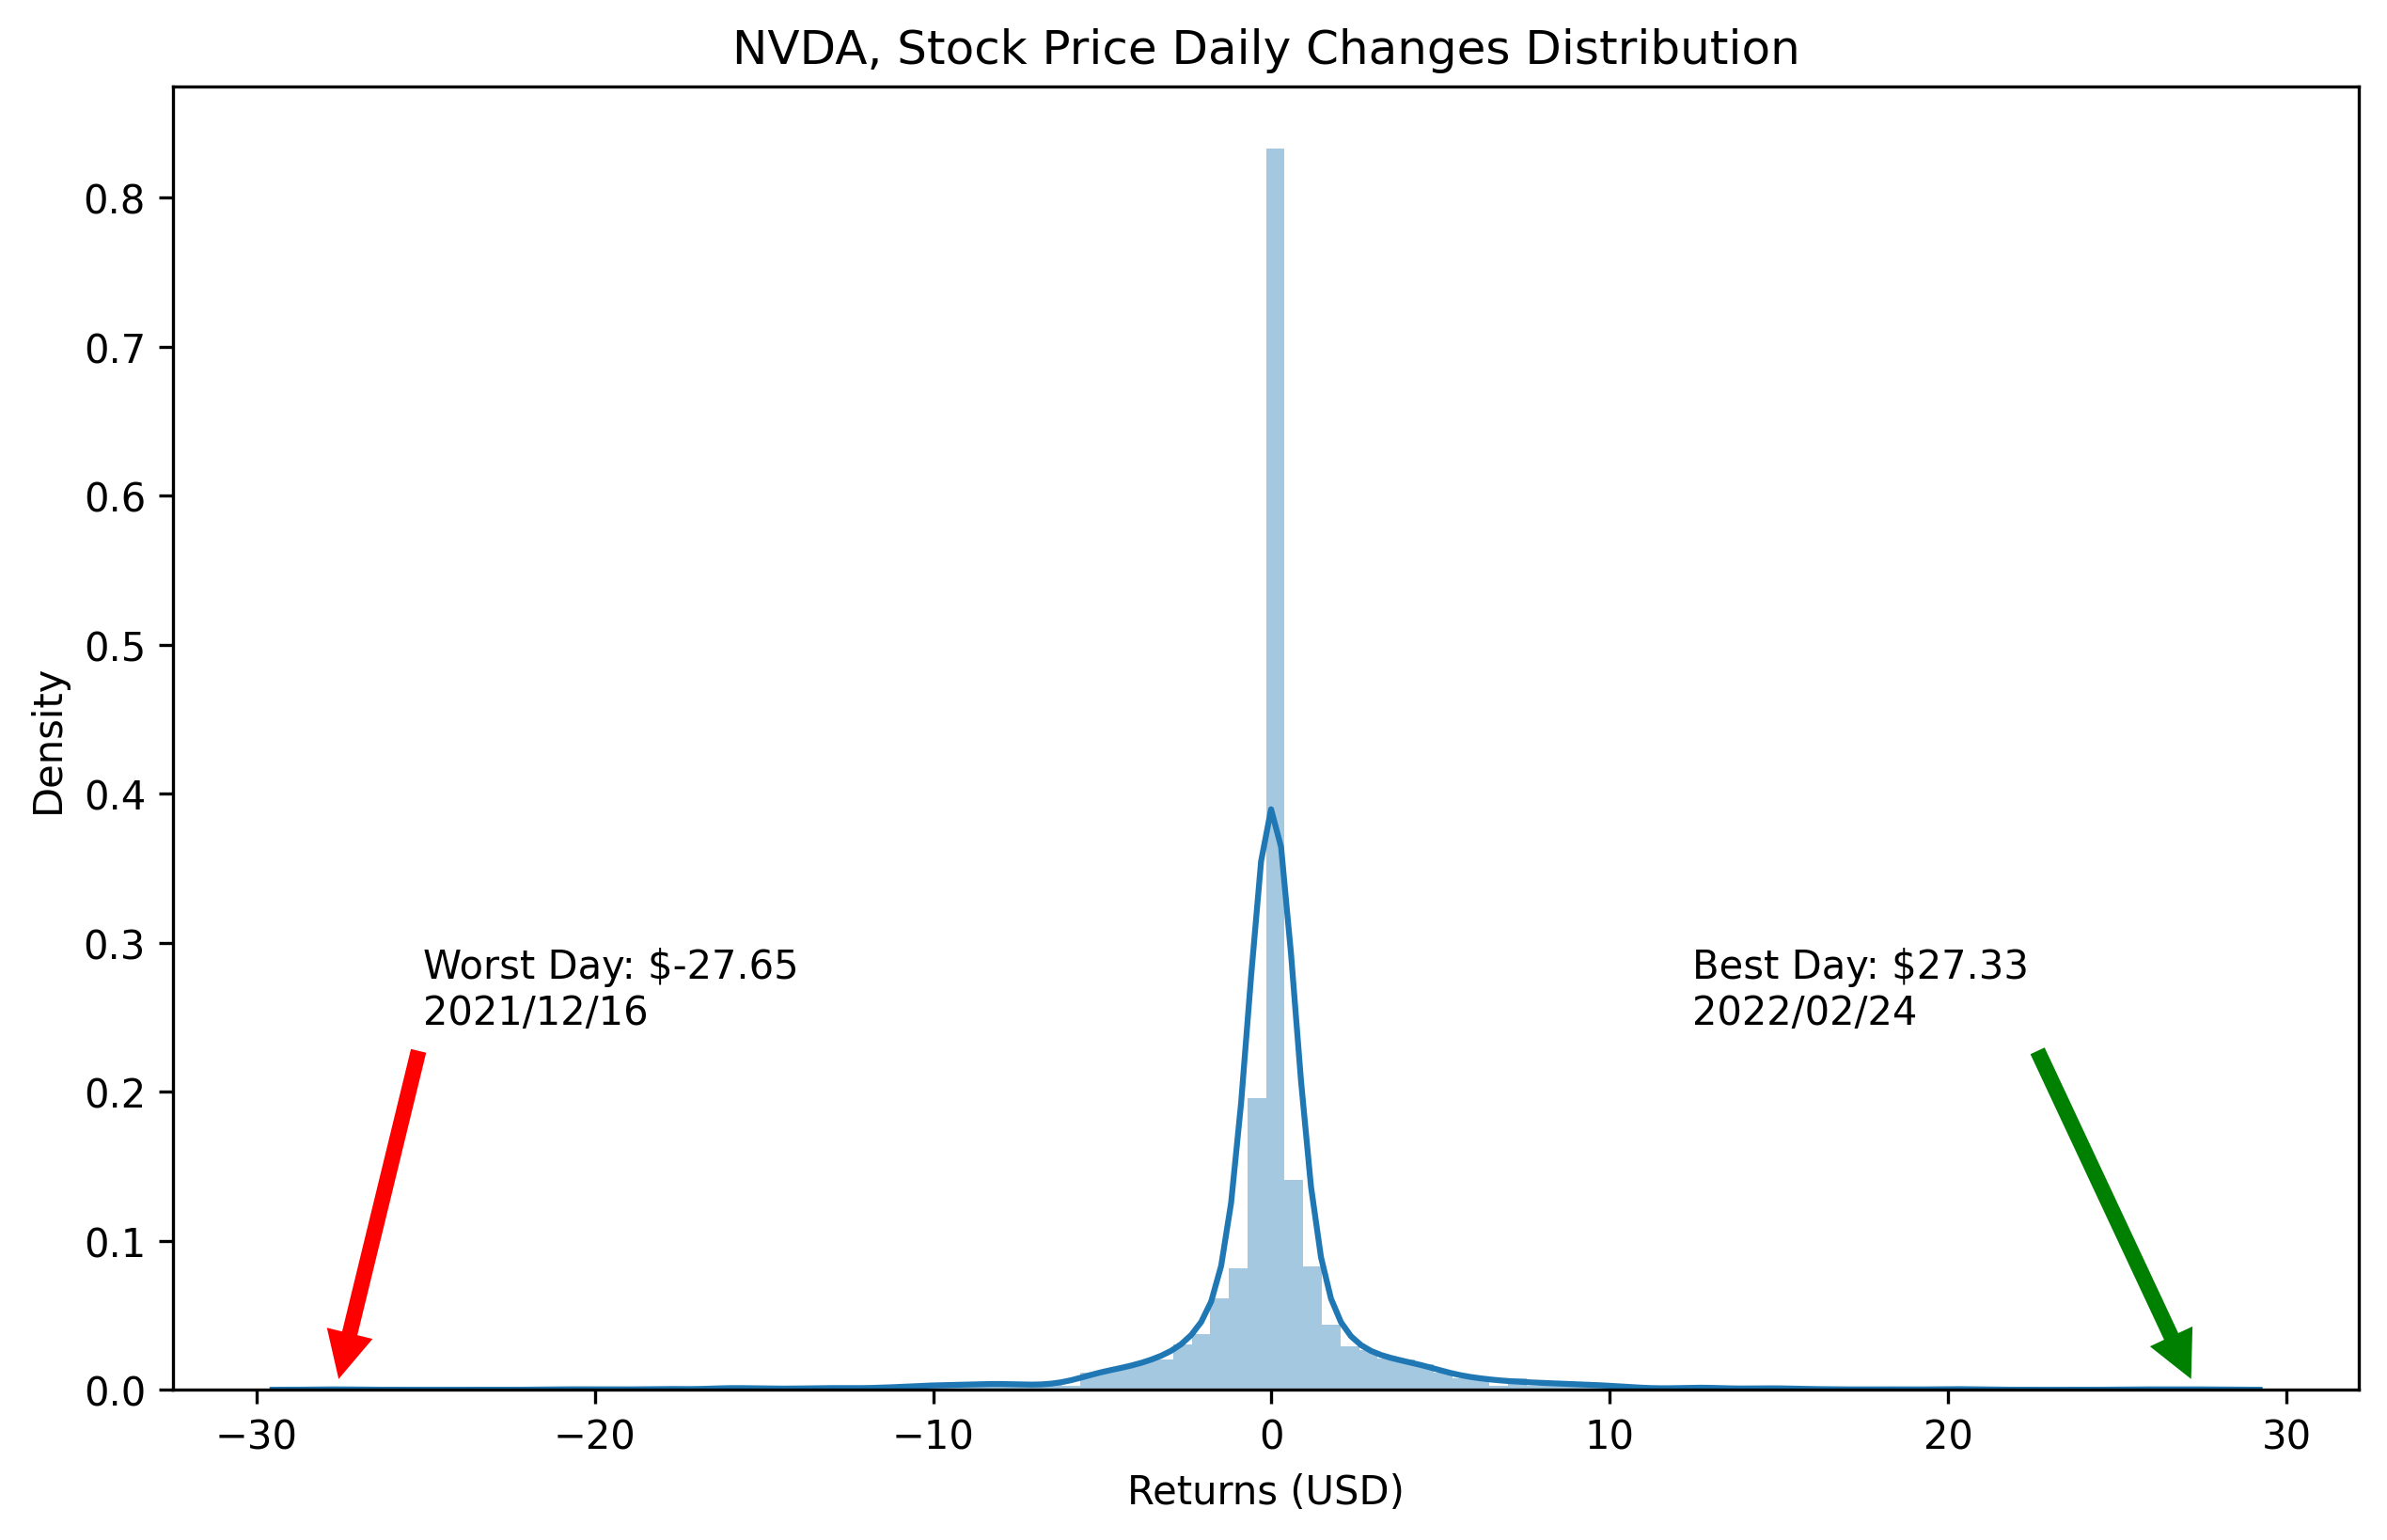

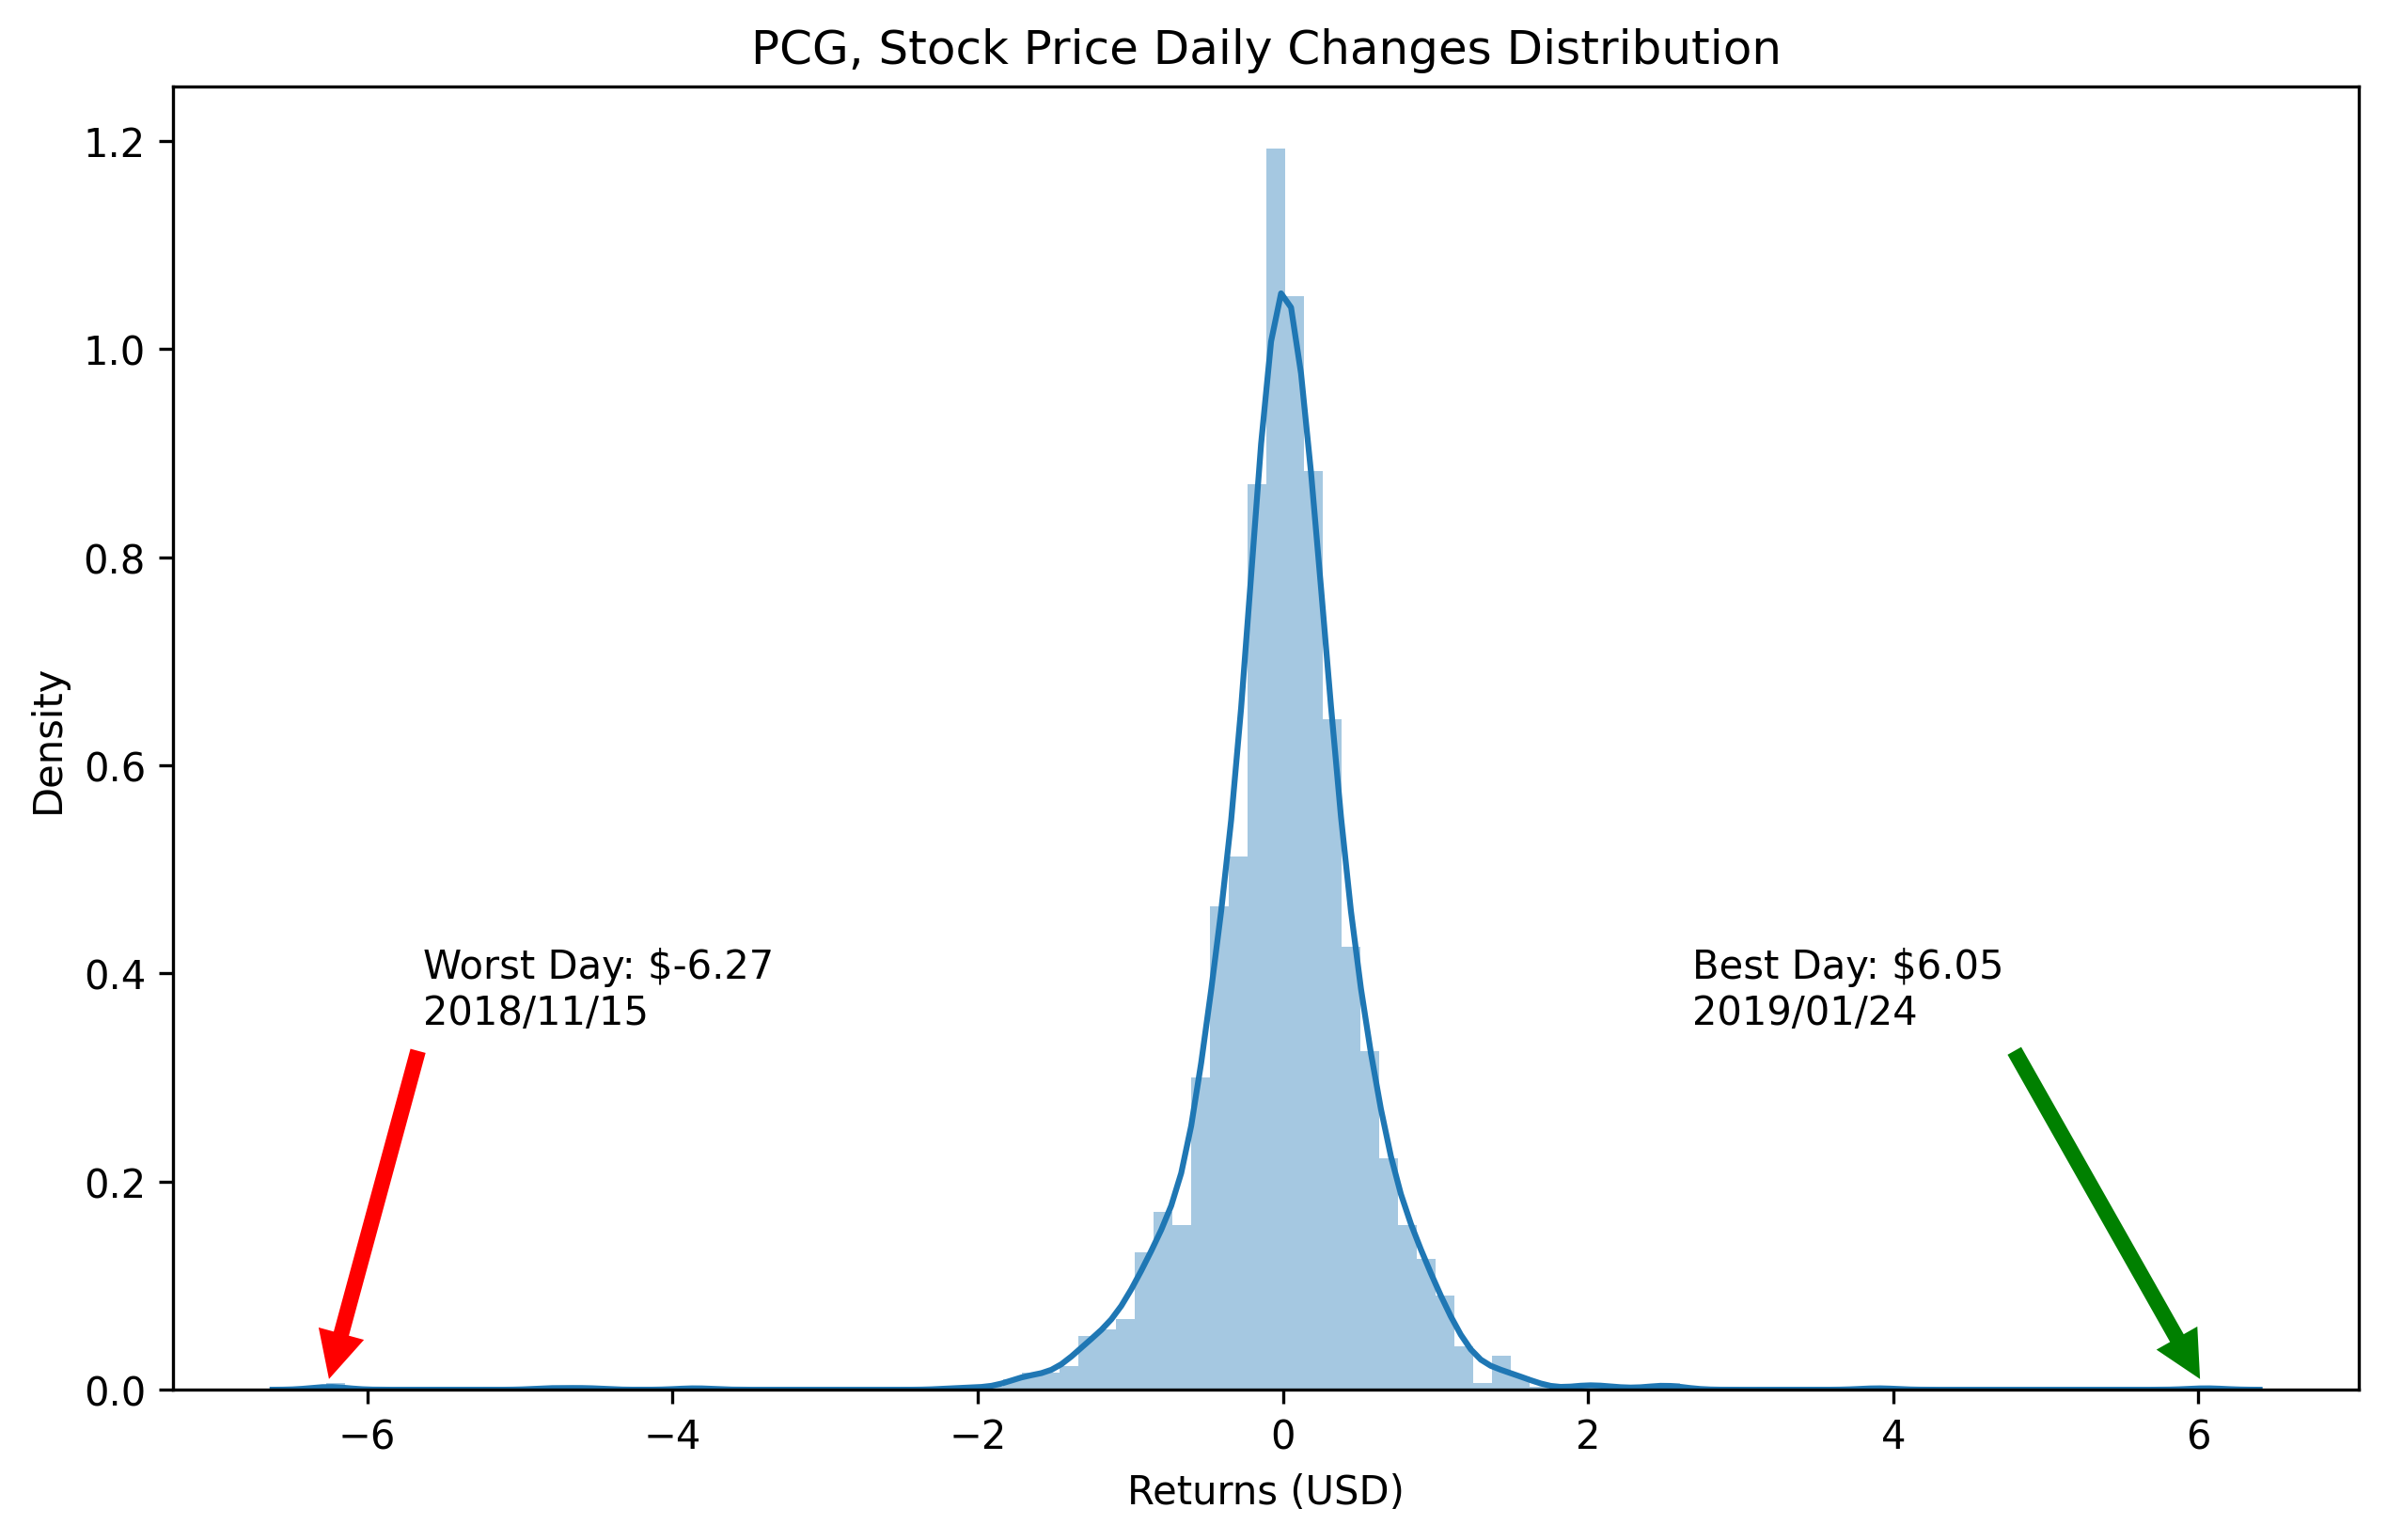

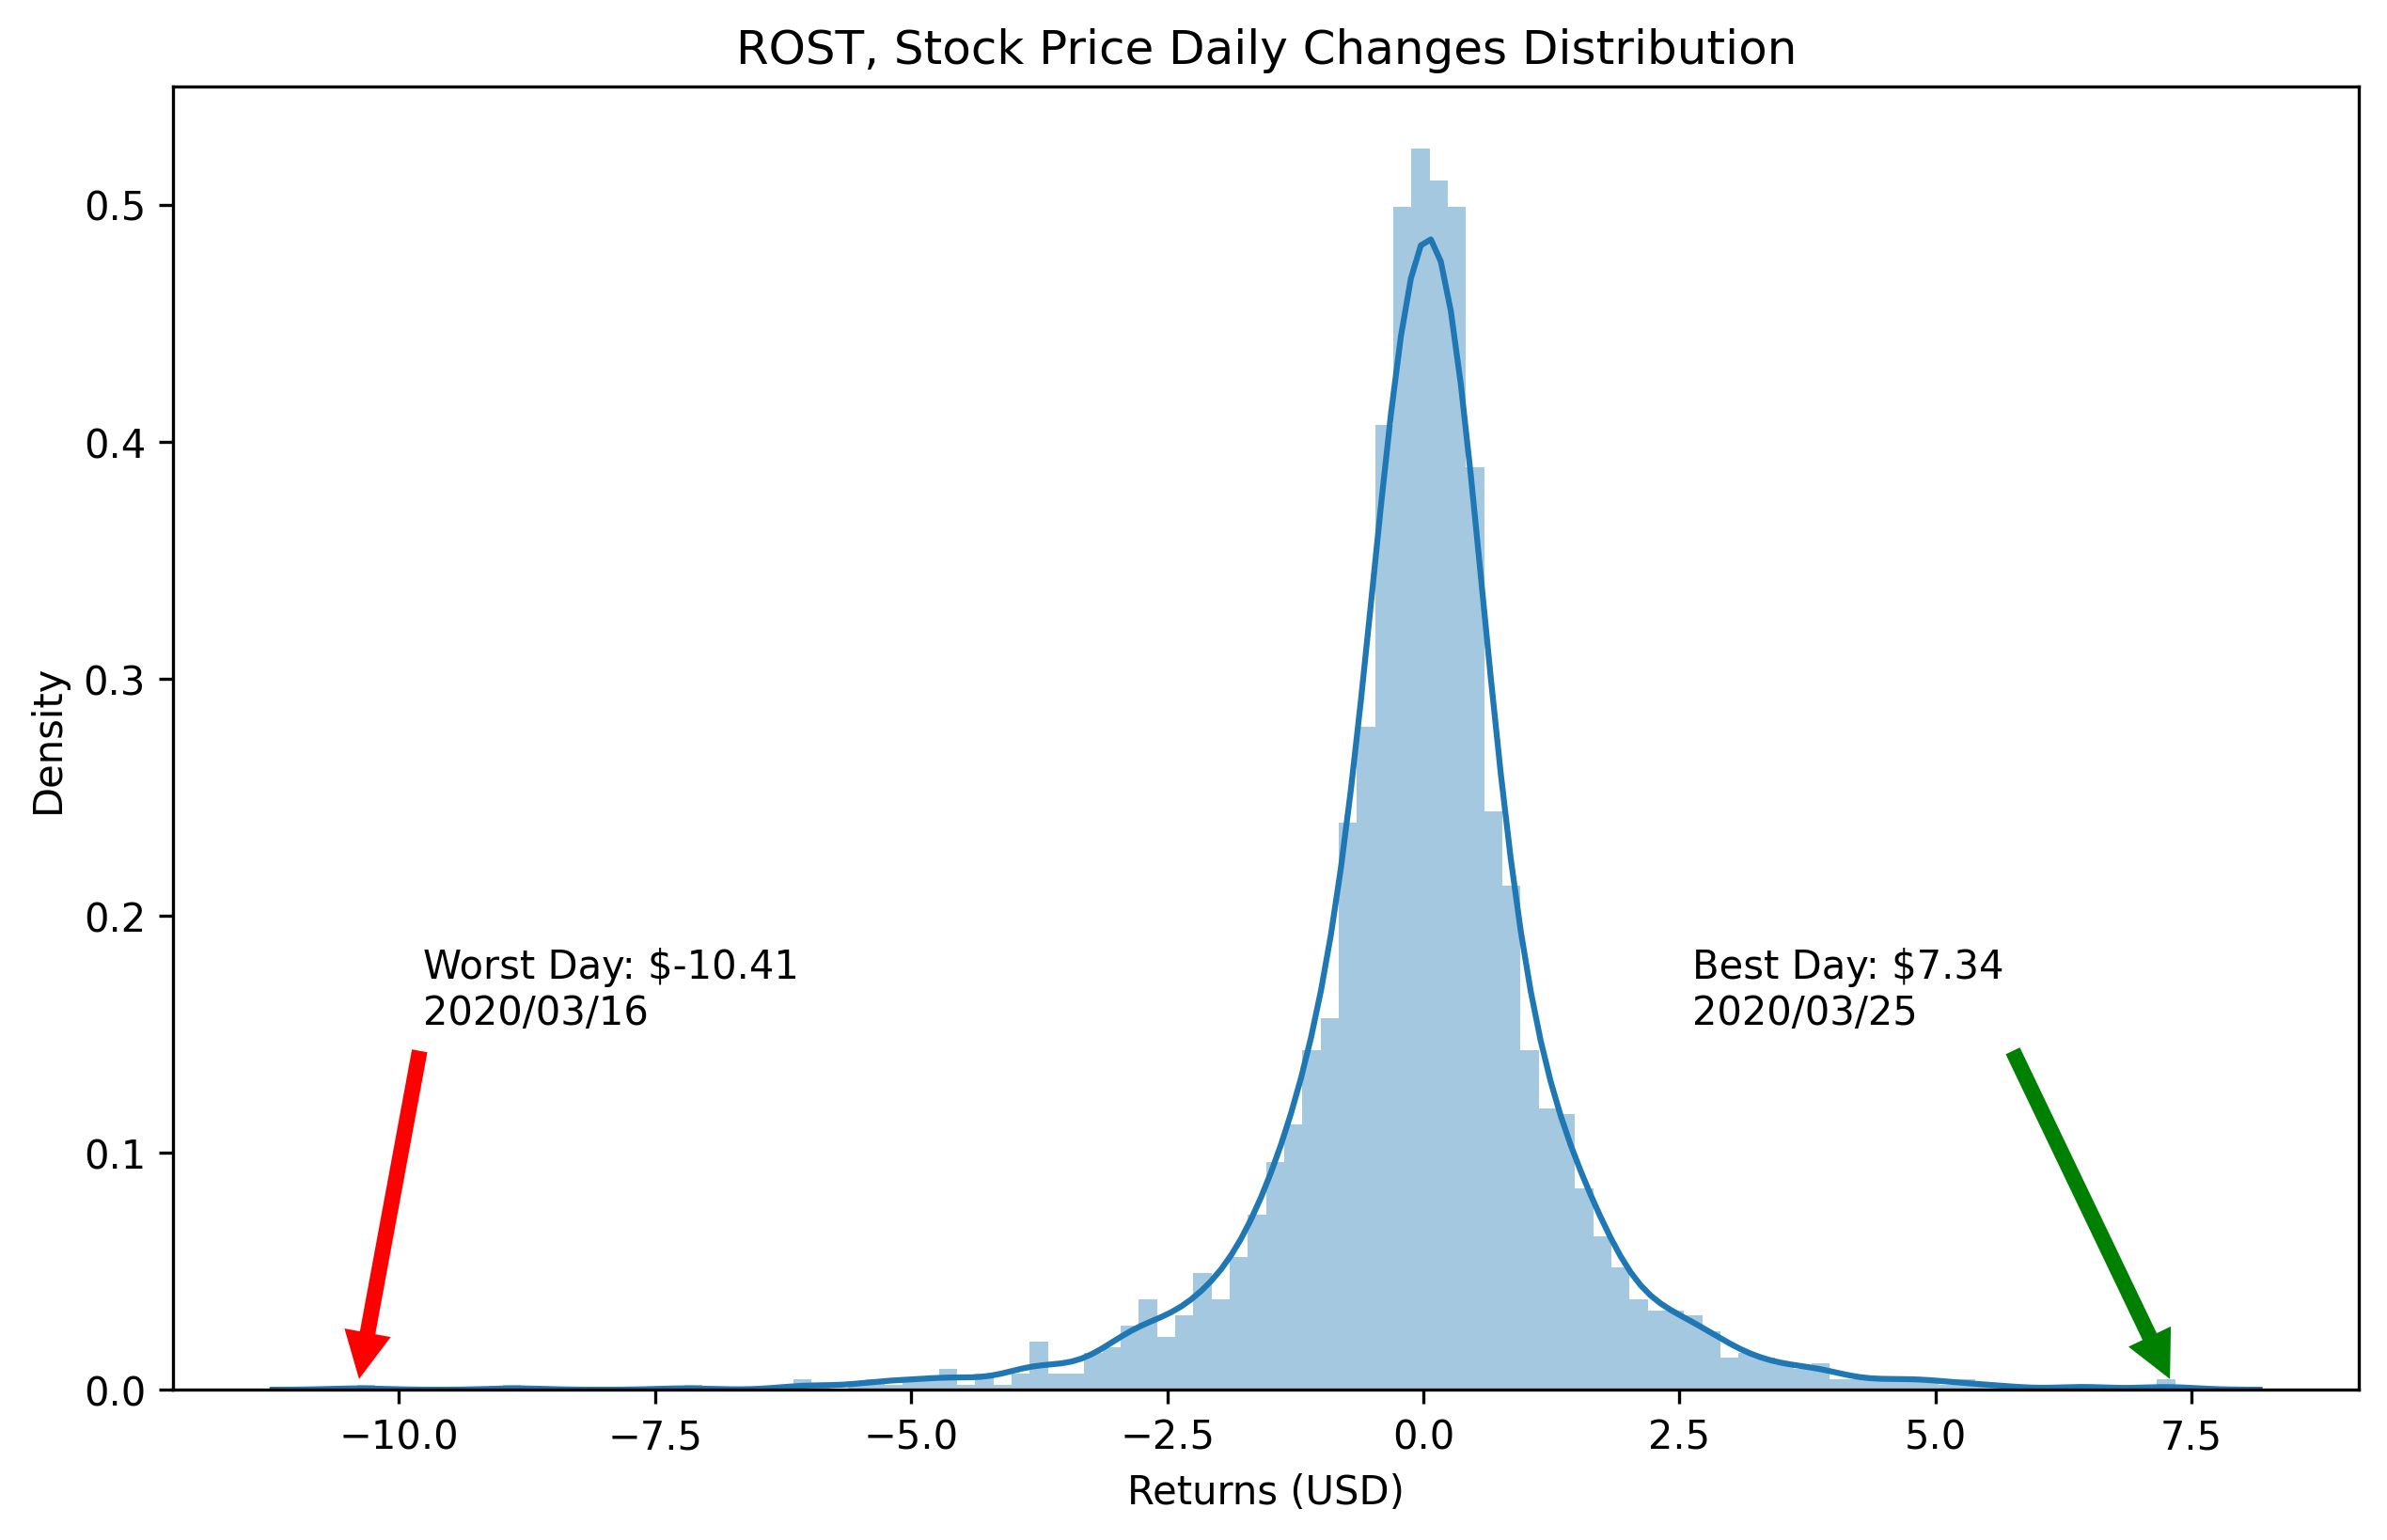

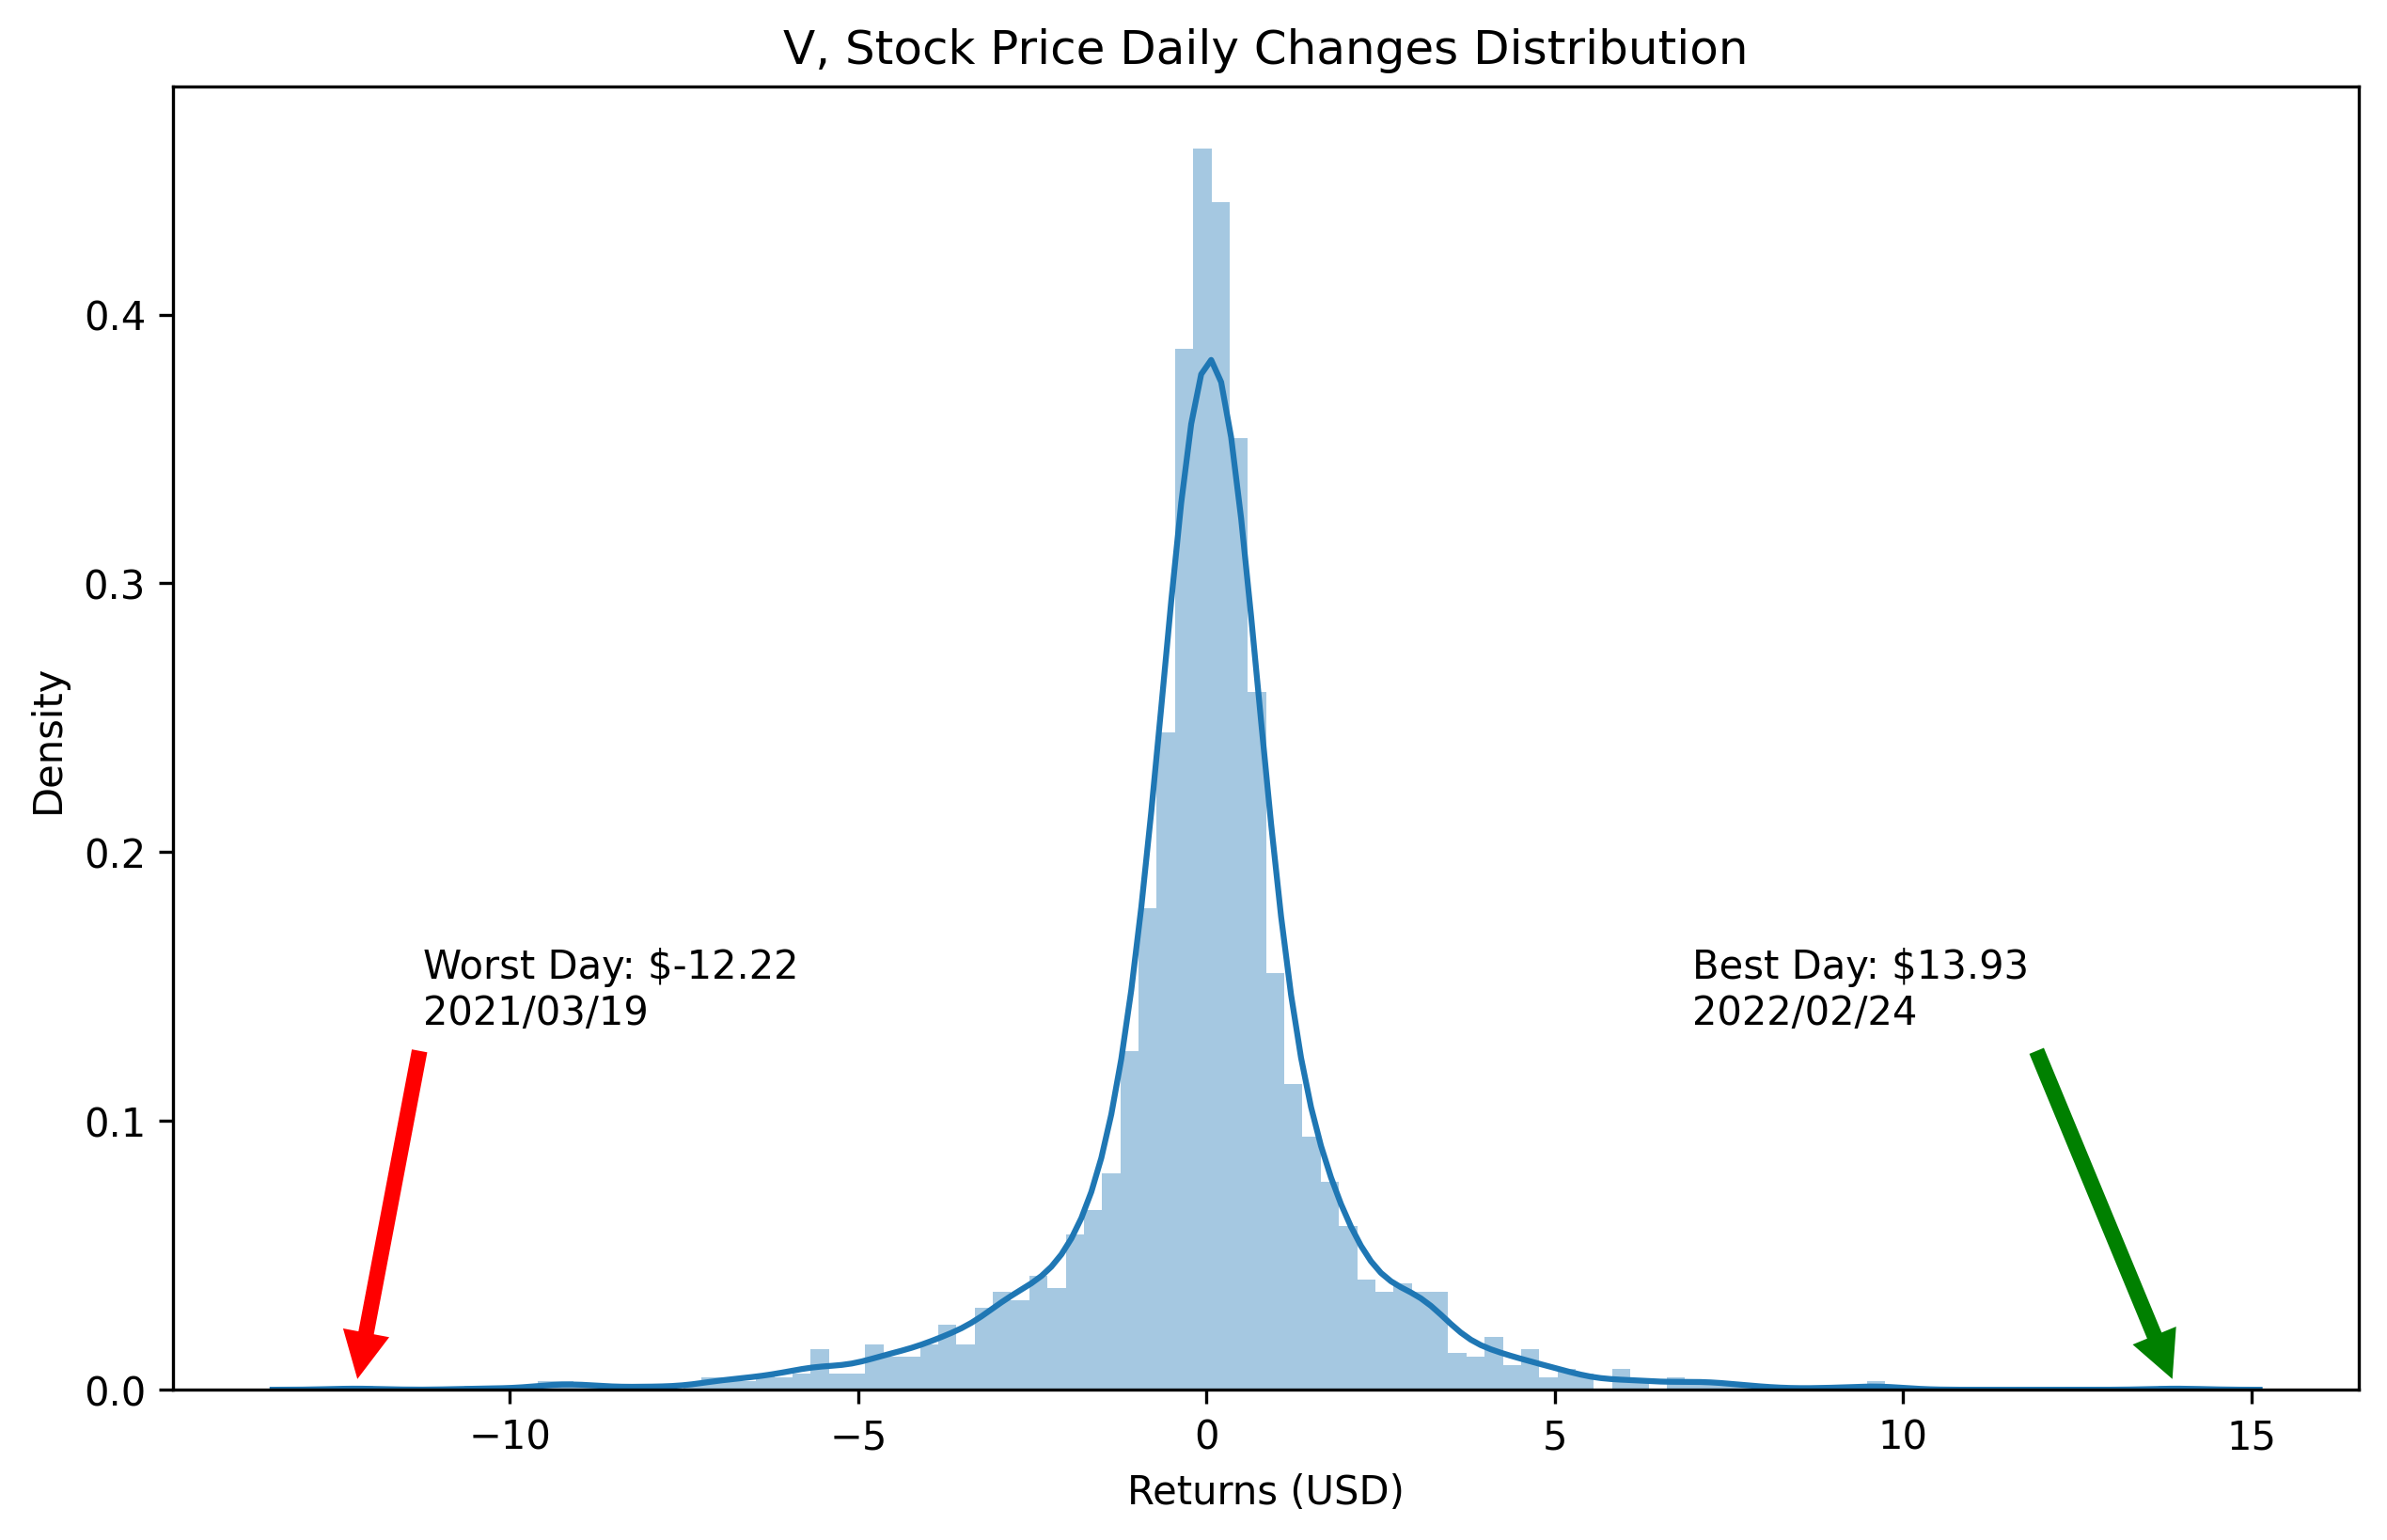

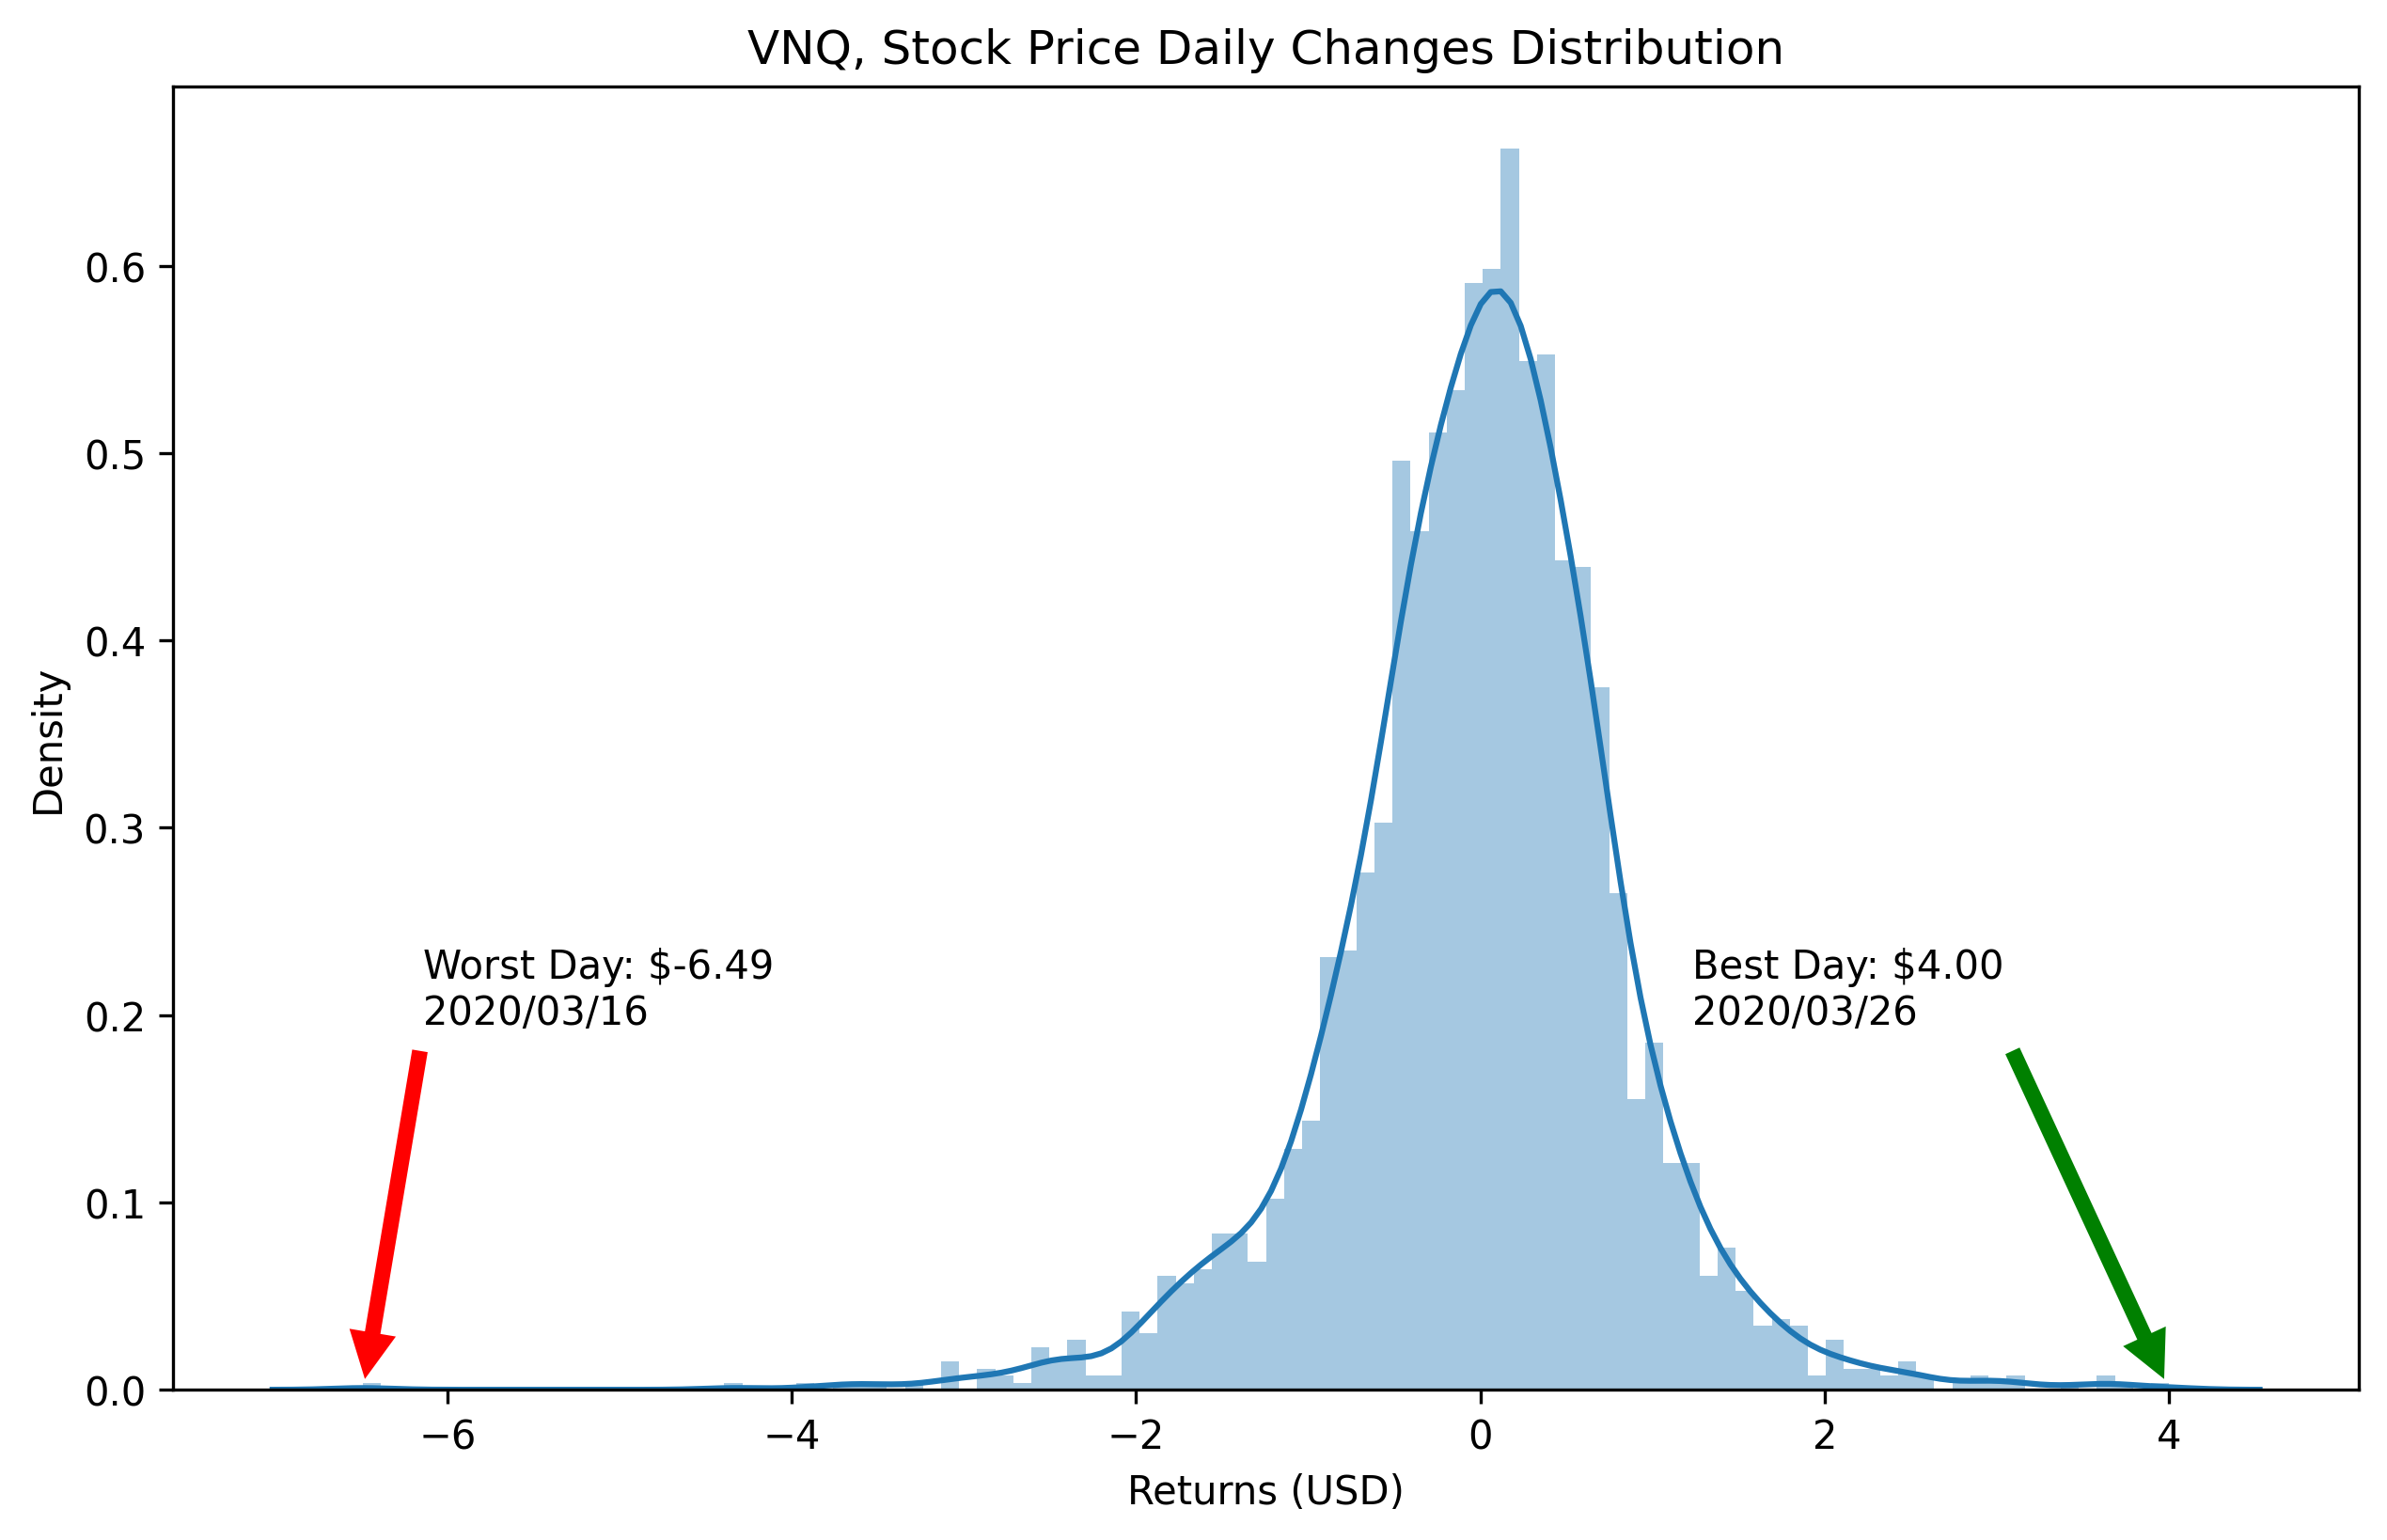

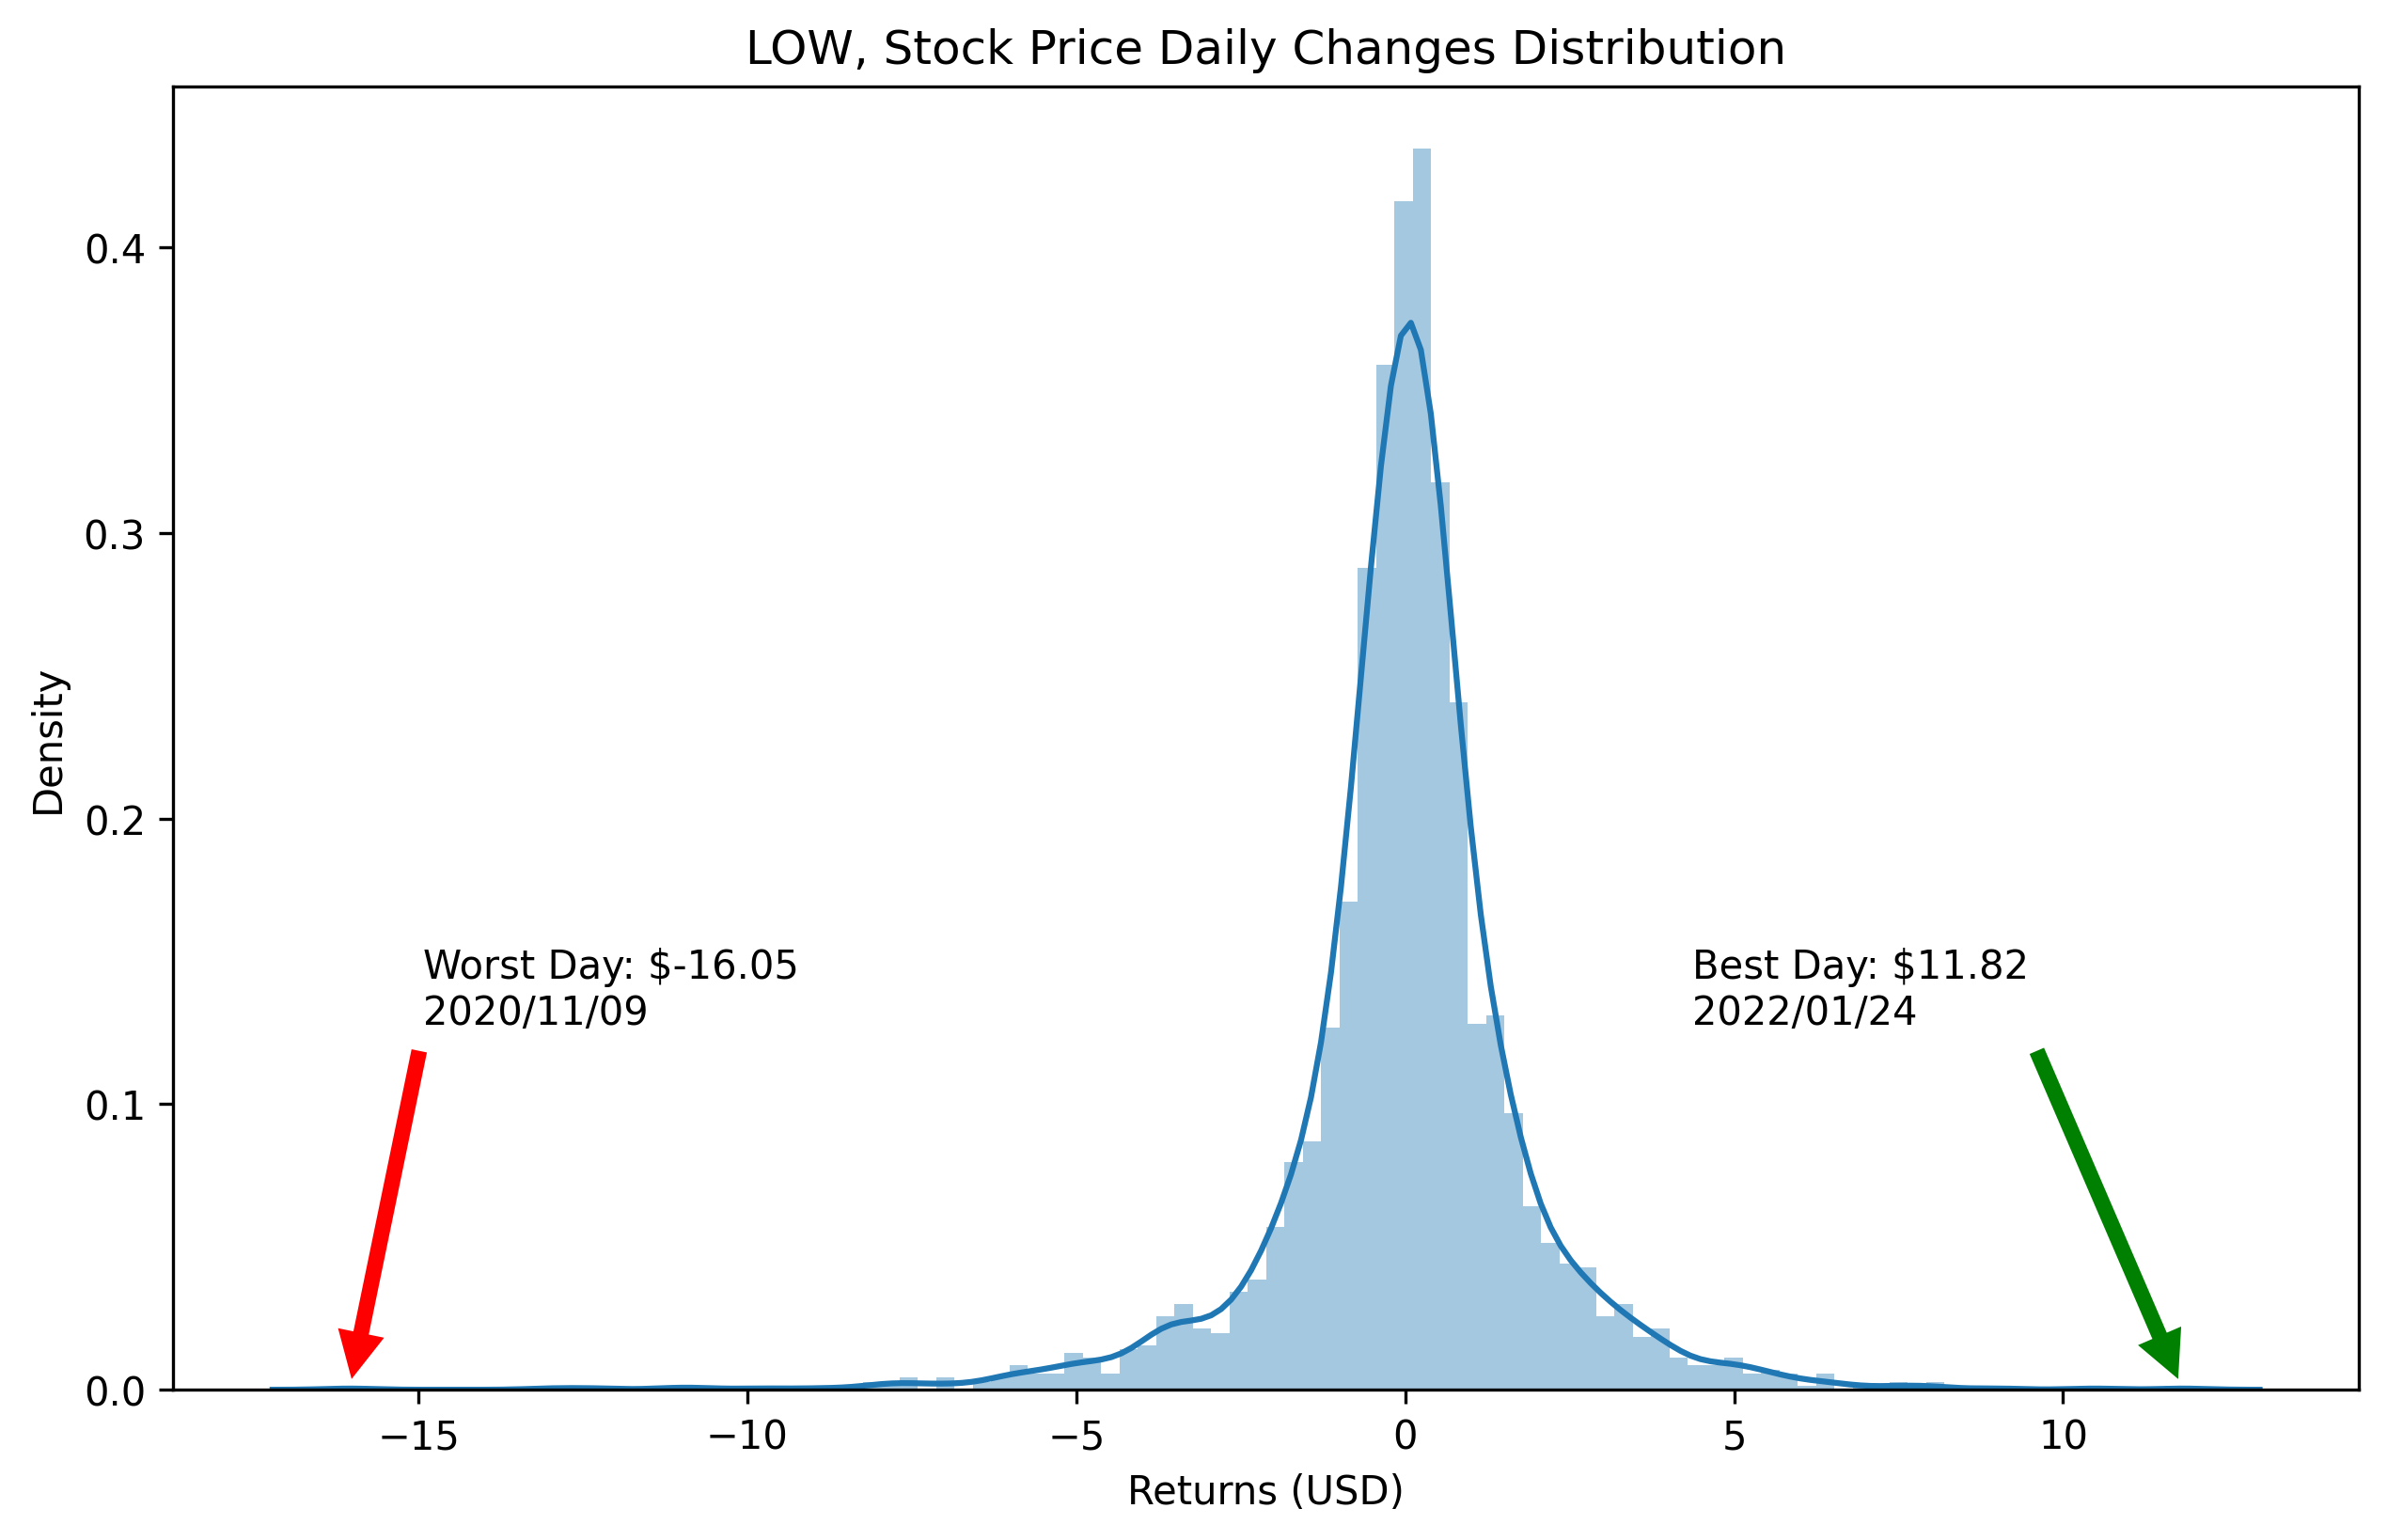

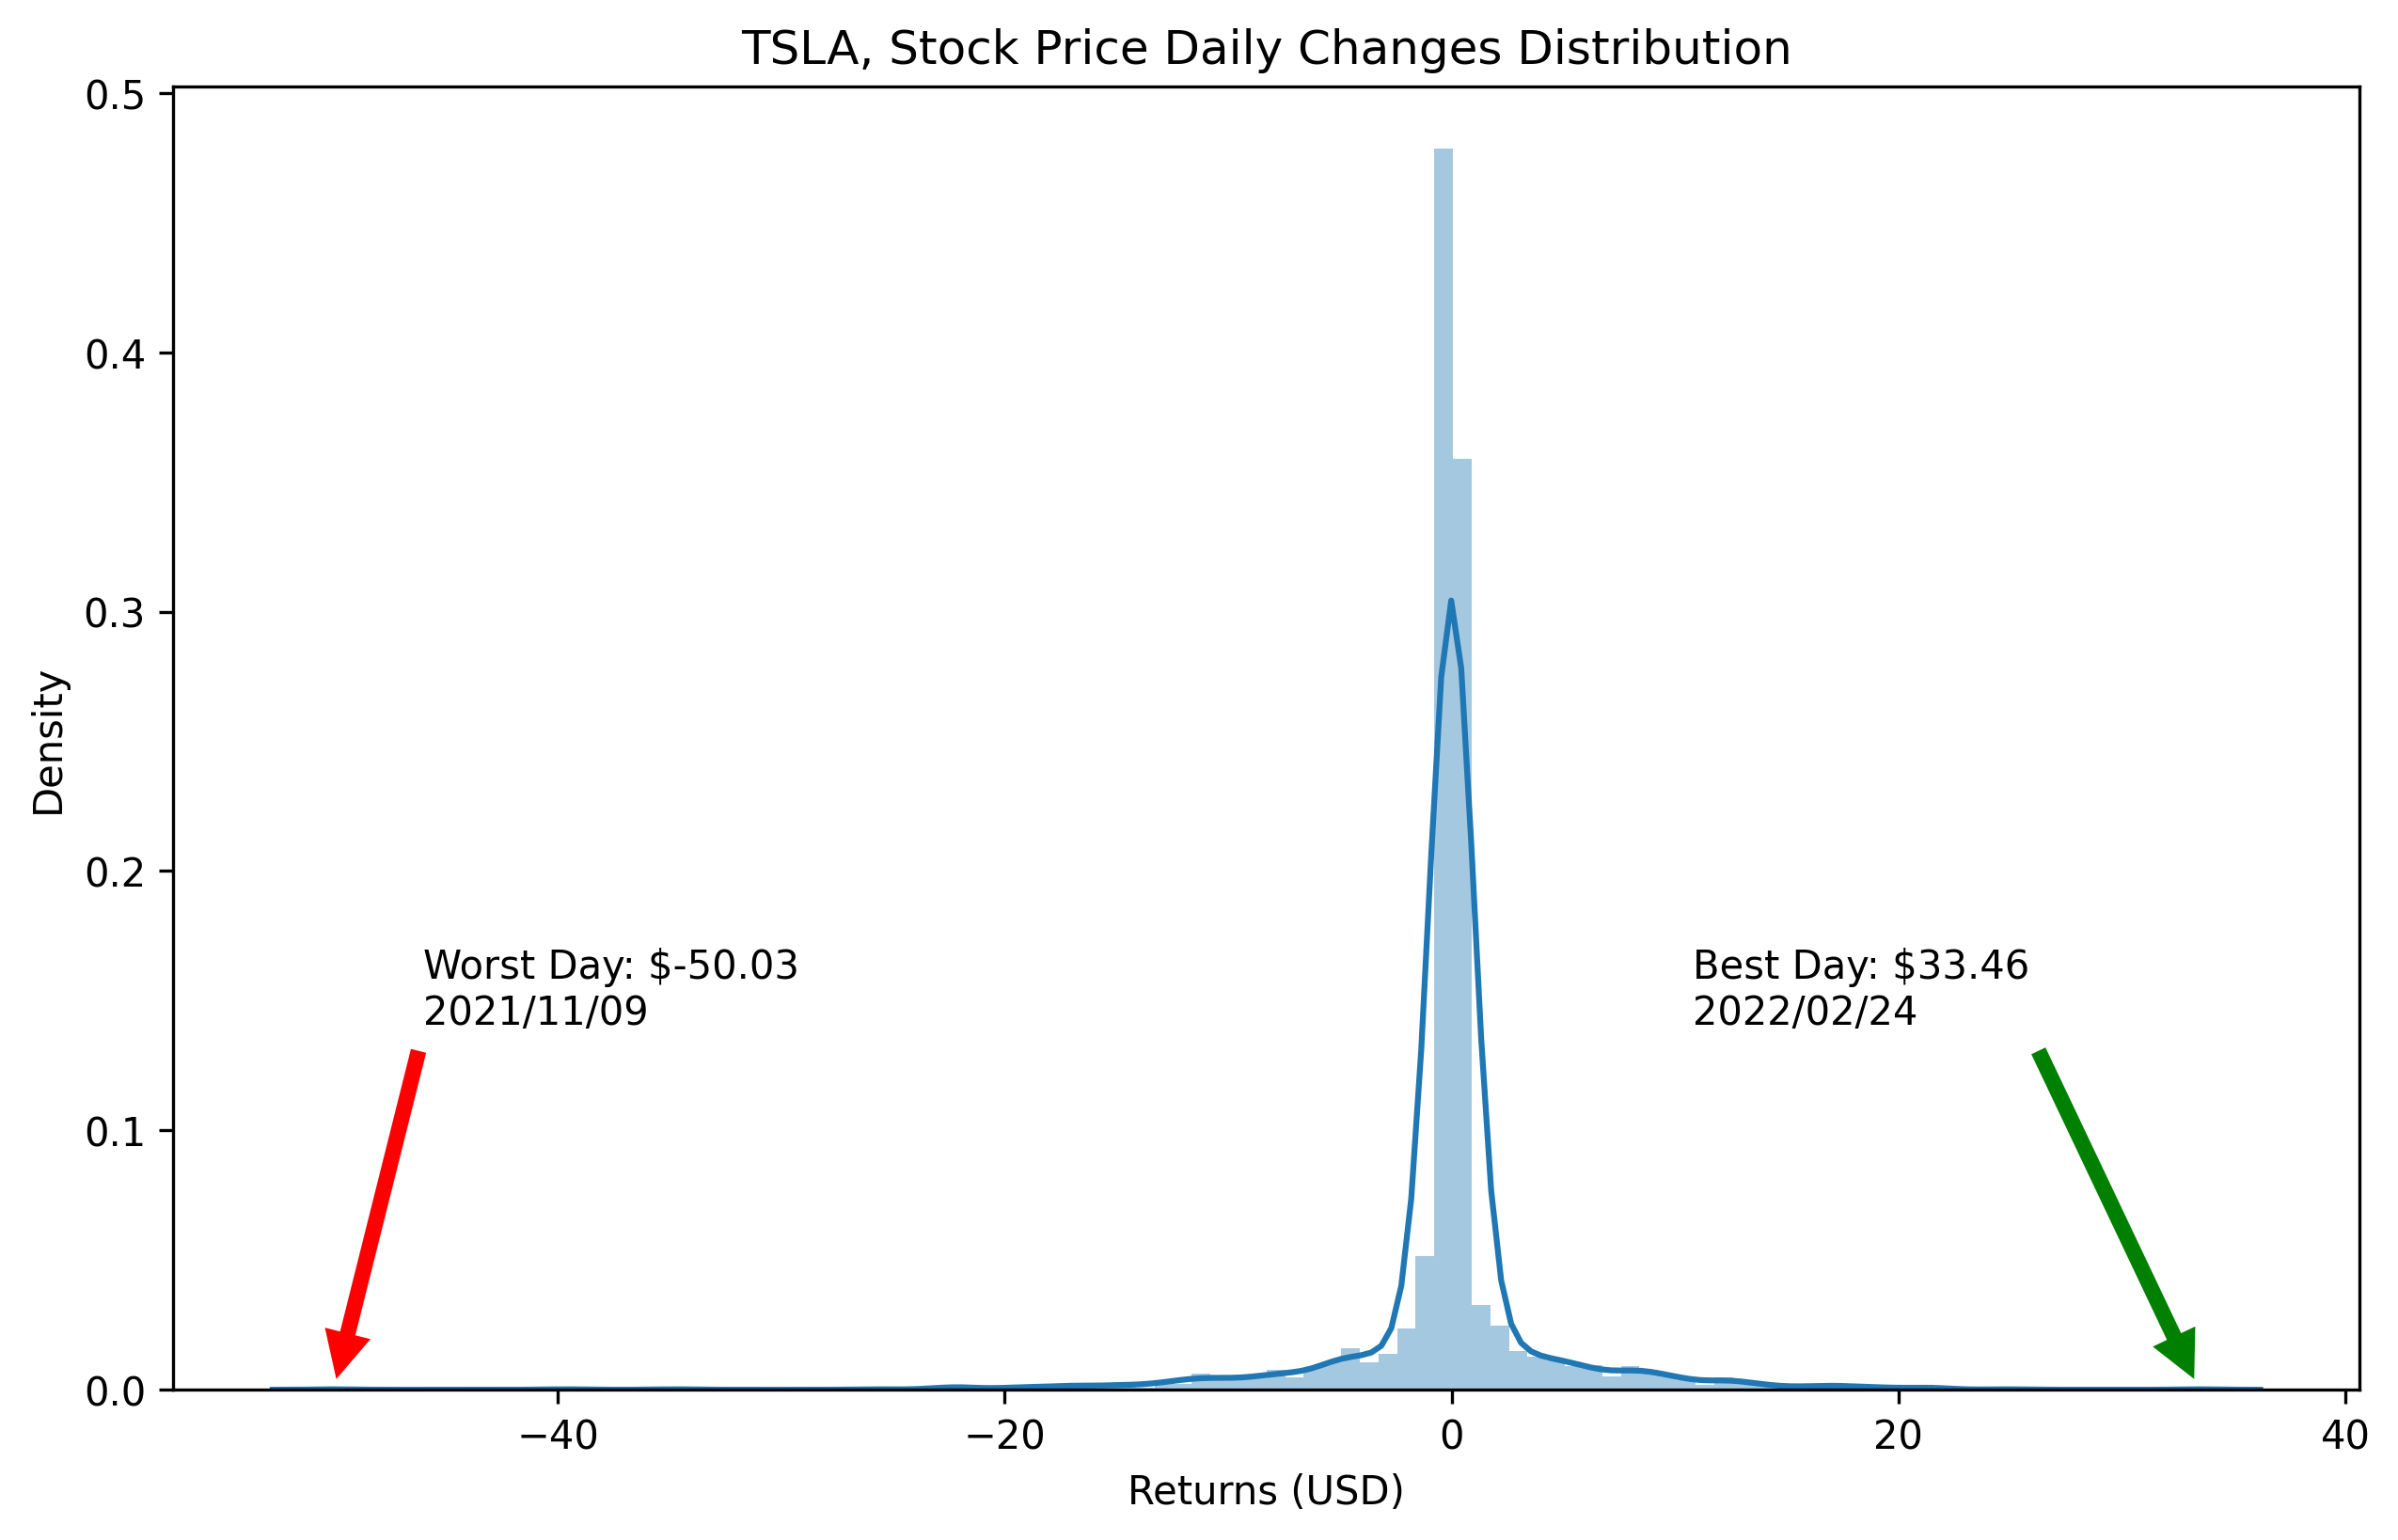

In [60]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	
	worst = df["Return"].min()
	best = df["Return"].max()

	worst_day = df["Return"].idxmin().strftime("%Y/%m/%d")
	best_day = df["Return"].idxmax().strftime("%Y/%m/%d")

	fig, ax = plt.subplots(figsize=(10,6), dpi=300)
	sns.distplot(df["Return"], bins=100, ax=ax)
	ax.annotate(f"Worst Day: ${worst:.02f}\n{worst_day}", (worst, 0),
	     	xytext=(0.15, 0.3),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='red', shrink=0.03, linewidth=0),
            horizontalalignment='left',
            verticalalignment='bottom')
	
	ax.annotate(f"Best Day: ${best:.02f}\n{best_day}", (best, 0),
	     	xytext=(0.6, 0.3),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='green', shrink=0.03, linewidth=0),
            horizontalalignment='left',
            verticalalignment='bottom')
	
	ax.set_xlabel("Returns (USD)")
	ax.set_title(f"{f}, Stock Price Daily Changes Distribution")
	plt.savefig(vis_path + f"{f}_returns.svg", bbox_inches="tight", format='svg')

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	worst = df["Return"].min()
	best = df["Return"].max()

	worst_day = df["Return"].idxmin().strftime("%Y/%m/%d")
	best_day = df["Return"].idxmax().strftime("%Y/%m/%d")

	fig, ax = plt.subplots(figsize=(10,6), dpi=300)
	sns.distplot(df["Return"], bins=100, ax=ax)
	ax.annotate(f"Worst Day: ${worst:.02f}\n{worst_day}", (worst, 0),
	     	xytext=(0.15, 0.3),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='red', shrink=0.03, linewidth=0),
            horizontalalignment='left',
            verticalalignment='bottom')
	
	ax.annotate(f"Best Day: ${best:.02f}\n{best_day}", (best, 0),
	     	xytext=(0.6, 0.3),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='green', shrink=0.03, linewidth=0),
            horizontalalignment='left',
            verticalalignment='bottom')
	
	ax.set_xlabel("Returns (USD)")
	ax.set_title(f"{f}, Stock Price Daily Changes Distribution")
	plt.savefig(vis_path + f"{f}_returns.svg", bbox_inches="tight", format='svg')